***Import Libraries***



In [10]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn import svm
from sklearn.model_selection import train_test_split

***Load the pre-trained VGG16 model to extract features from images***

In [2]:
model= VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


***extract features and return it flatten into a vector***

In [3]:
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

***Data loading***

In [12]:
dataset = '/content/drive/MyDrive/dataset/Data'
classes = os.listdir(dataset)

***Display sample images from dataset for cats and dogs***

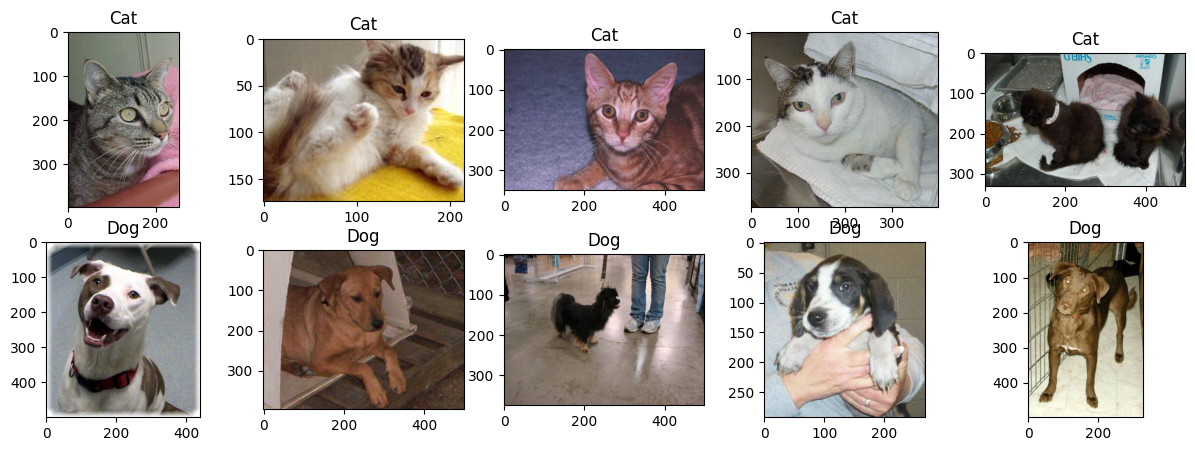

In [13]:
cat_images = []
dog_images = []

for i in range(5):
  cat_images.append(mpimg.imread(os.path.join(dataset, 'cats', os.listdir(os.path.join(dataset, 'cats'))[i])))
  dog_images.append(mpimg.imread(os.path.join(dataset, 'dogs', os.listdir(os.path.join(dataset, 'dogs'))[i])))

fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
  if i < 5:
    ax.imshow(cat_images[i])
    ax.set_title('Cat')
  else:
    ax.imshow(dog_images[i-5])
    ax.set_title('Dog')
plt.show()


***Extract features from images in the dataset***

In [14]:
X = []
y = []
for class_name in classes:
    class_dir = os.path.join(dataset, class_name)
    for img_name in tqdm(os.listdir(class_dir)):
        img_path = os.path.join(class_dir, img_name)
        features = extract_features(img_path)
        X.append(features)
        y.append(class_name)

  0%|          | 0/1007 [00:00<?, ?it/s]

1/1 [==============================] - 1s 888ms/step


  0%|          | 1/1007 [00:00<16:34,  1.01it/s]

1/1 [==============================] - 1s 560ms/step


  0%|          | 2/1007 [00:01<13:01,  1.29it/s]

1/1 [==============================] - 1s 578ms/step


  0%|          | 3/1007 [00:02<12:02,  1.39it/s]

1/1 [==============================] - 1s 536ms/step


  0%|          | 4/1007 [00:02<11:16,  1.48it/s]

1/1 [==============================] - 1s 574ms/step


  0%|          | 5/1007 [00:03<11:03,  1.51it/s]

1/1 [==============================] - 1s 524ms/step


  1%|          | 6/1007 [00:04<10:37,  1.57it/s]

1/1 [==============================] - 1s 547ms/step


  1%|          | 7/1007 [00:04<10:28,  1.59it/s]

1/1 [==============================] - 1s 569ms/step


  1%|          | 8/1007 [00:05<10:30,  1.58it/s]

1/1 [==============================] - 1s 943ms/step


  1%|          | 9/1007 [00:06<12:30,  1.33it/s]

1/1 [==============================] - 1s 968ms/step


  1%|          | 10/1007 [00:07<14:03,  1.18it/s]

1/1 [==============================] - 1s 1s/step


  1%|          | 11/1007 [00:09<20:12,  1.22s/it]

1/1 [==============================] - 1s 551ms/step


  1%|          | 12/1007 [00:29<1:54:01,  6.88s/it]

1/1 [==============================] - 1s 528ms/step


  1%|▏         | 13/1007 [00:29<1:22:28,  4.98s/it]

1/1 [==============================] - 1s 547ms/step


  1%|▏         | 14/1007 [00:30<1:00:34,  3.66s/it]

1/1 [==============================] - 1s 550ms/step


  1%|▏         | 15/1007 [00:31<45:20,  2.74s/it]  

1/1 [==============================] - 1s 551ms/step


  2%|▏         | 16/1007 [00:31<34:43,  2.10s/it]

1/1 [==============================] - 1s 528ms/step


  2%|▏         | 17/1007 [00:32<27:13,  1.65s/it]

1/1 [==============================] - 1s 527ms/step


  2%|▏         | 18/1007 [00:33<22:31,  1.37s/it]

1/1 [==============================] - 1s 551ms/step


  2%|▏         | 19/1007 [00:33<18:48,  1.14s/it]

1/1 [==============================] - 1s 578ms/step


  2%|▏         | 20/1007 [00:34<16:19,  1.01it/s]

1/1 [==============================] - 1s 542ms/step


  2%|▏         | 21/1007 [00:34<14:24,  1.14it/s]

1/1 [==============================] - 1s 554ms/step


  2%|▏         | 22/1007 [00:35<13:10,  1.25it/s]

1/1 [==============================] - 1s 522ms/step


  2%|▏         | 23/1007 [00:36<12:07,  1.35it/s]

1/1 [==============================] - 1s 551ms/step


  2%|▏         | 24/1007 [00:36<11:33,  1.42it/s]

1/1 [==============================] - 1s 531ms/step


  2%|▏         | 25/1007 [00:37<10:59,  1.49it/s]

1/1 [==============================] - 1s 541ms/step


  3%|▎         | 26/1007 [00:38<10:47,  1.51it/s]

1/1 [==============================] - 1s 542ms/step


  3%|▎         | 27/1007 [00:38<10:31,  1.55it/s]

1/1 [==============================] - 1s 857ms/step


  3%|▎         | 28/1007 [00:39<12:03,  1.35it/s]

1/1 [==============================] - 1s 974ms/step


  3%|▎         | 29/1007 [00:40<13:39,  1.19it/s]

1/1 [==============================] - 1s 887ms/step


  3%|▎         | 30/1007 [00:41<14:26,  1.13it/s]

1/1 [==============================] - 1s 886ms/step


  3%|▎         | 31/1007 [00:42<14:55,  1.09it/s]

1/1 [==============================] - 1s 863ms/step


  3%|▎         | 32/1007 [00:43<15:09,  1.07it/s]

1/1 [==============================] - 1s 883ms/step


  3%|▎         | 33/1007 [00:44<15:24,  1.05it/s]

1/1 [==============================] - 1s 683ms/step


  3%|▎         | 34/1007 [00:45<14:34,  1.11it/s]

1/1 [==============================] - 1s 523ms/step


  3%|▎         | 35/1007 [00:45<13:01,  1.24it/s]

1/1 [==============================] - 1s 535ms/step


  4%|▎         | 36/1007 [00:46<12:02,  1.34it/s]

1/1 [==============================] - 1s 538ms/step


  4%|▎         | 37/1007 [00:47<11:21,  1.42it/s]

1/1 [==============================] - 1s 528ms/step


  4%|▍         | 38/1007 [00:47<10:49,  1.49it/s]

1/1 [==============================] - 1s 547ms/step


  4%|▍         | 39/1007 [00:48<10:32,  1.53it/s]

1/1 [==============================] - 1s 526ms/step


  4%|▍         | 40/1007 [00:48<10:14,  1.57it/s]

1/1 [==============================] - 1s 699ms/step


  4%|▍         | 41/1007 [00:49<10:51,  1.48it/s]

1/1 [==============================] - 1s 575ms/step


  4%|▍         | 42/1007 [00:50<11:25,  1.41it/s]

1/1 [==============================] - 1s 638ms/step


  4%|▍         | 43/1007 [00:51<12:27,  1.29it/s]

1/1 [==============================] - 1s 617ms/step


  4%|▍         | 44/1007 [00:52<13:00,  1.23it/s]

1/1 [==============================] - 1s 533ms/step


  4%|▍         | 45/1007 [00:52<11:59,  1.34it/s]

1/1 [==============================] - 1s 543ms/step


  5%|▍         | 46/1007 [00:53<11:17,  1.42it/s]

1/1 [==============================] - 1s 525ms/step


  5%|▍         | 47/1007 [00:54<10:43,  1.49it/s]

1/1 [==============================] - 1s 553ms/step


  5%|▍         | 48/1007 [00:54<10:27,  1.53it/s]

1/1 [==============================] - 1s 744ms/step


  5%|▍         | 49/1007 [00:55<11:12,  1.42it/s]

1/1 [==============================] - 1s 910ms/step


  5%|▍         | 50/1007 [00:56<12:38,  1.26it/s]

1/1 [==============================] - 1s 941ms/step


  5%|▌         | 51/1007 [00:57<13:46,  1.16it/s]

1/1 [==============================] - 1s 895ms/step


  5%|▌         | 52/1007 [00:58<14:21,  1.11it/s]

1/1 [==============================] - 1s 898ms/step


  5%|▌         | 53/1007 [00:59<14:48,  1.07it/s]

1/1 [==============================] - 1s 898ms/step


  5%|▌         | 54/1007 [01:00<15:09,  1.05it/s]

1/1 [==============================] - 1s 887ms/step


  5%|▌         | 55/1007 [01:01<15:20,  1.03it/s]

1/1 [==============================] - 1s 539ms/step


  6%|▌         | 56/1007 [01:02<13:35,  1.17it/s]

1/1 [==============================] - 1s 543ms/step


  6%|▌         | 57/1007 [01:02<12:25,  1.27it/s]

1/1 [==============================] - 1s 524ms/step


  6%|▌         | 58/1007 [01:03<11:31,  1.37it/s]

1/1 [==============================] - 1s 544ms/step


  6%|▌         | 59/1007 [01:04<10:57,  1.44it/s]

1/1 [==============================] - 1s 530ms/step


  6%|▌         | 60/1007 [01:04<10:29,  1.50it/s]

1/1 [==============================] - 1s 540ms/step


  6%|▌         | 61/1007 [01:05<10:11,  1.55it/s]

1/1 [==============================] - 1s 541ms/step


  6%|▌         | 62/1007 [01:05<09:59,  1.58it/s]

1/1 [==============================] - 1s 533ms/step


  6%|▋         | 63/1007 [01:06<09:52,  1.59it/s]

1/1 [==============================] - 1s 547ms/step


  6%|▋         | 64/1007 [01:07<09:48,  1.60it/s]

1/1 [==============================] - 1s 538ms/step


  6%|▋         | 65/1007 [01:07<09:43,  1.61it/s]

1/1 [==============================] - 1s 551ms/step


  7%|▋         | 66/1007 [01:08<09:42,  1.62it/s]

1/1 [==============================] - 1s 533ms/step


  7%|▋         | 67/1007 [01:08<09:38,  1.62it/s]

1/1 [==============================] - 1s 551ms/step


  7%|▋         | 68/1007 [01:09<09:37,  1.63it/s]

1/1 [==============================] - 1s 539ms/step


  7%|▋         | 69/1007 [01:10<09:33,  1.63it/s]

1/1 [==============================] - 1s 535ms/step


  7%|▋         | 70/1007 [01:10<09:30,  1.64it/s]

1/1 [==============================] - 1s 540ms/step


  7%|▋         | 71/1007 [01:11<09:29,  1.64it/s]

1/1 [==============================] - 1s 676ms/step


  7%|▋         | 72/1007 [01:12<10:06,  1.54it/s]

1/1 [==============================] - 1s 936ms/step


  7%|▋         | 73/1007 [01:13<11:51,  1.31it/s]

1/1 [==============================] - 1s 908ms/step


  7%|▋         | 74/1007 [01:14<12:59,  1.20it/s]

1/1 [==============================] - 1s 886ms/step


  7%|▋         | 75/1007 [01:15<15:31,  1.00it/s]

1/1 [==============================] - 1s 931ms/step


  8%|▊         | 76/1007 [01:16<15:42,  1.01s/it]

1/1 [==============================] - 1s 878ms/step


  8%|▊         | 77/1007 [01:17<15:33,  1.00s/it]

1/1 [==============================] - 1s 581ms/step


  8%|▊         | 78/1007 [01:18<14:02,  1.10it/s]

1/1 [==============================] - 1s 541ms/step


  8%|▊         | 79/1007 [01:18<12:37,  1.22it/s]

1/1 [==============================] - 1s 518ms/step


  8%|▊         | 80/1007 [01:19<11:33,  1.34it/s]

1/1 [==============================] - 1s 540ms/step


  8%|▊         | 81/1007 [01:19<10:52,  1.42it/s]

1/1 [==============================] - 1s 532ms/step


  8%|▊         | 82/1007 [01:20<10:20,  1.49it/s]

1/1 [==============================] - 1s 527ms/step


  8%|▊         | 83/1007 [01:21<09:59,  1.54it/s]

1/1 [==============================] - 1s 544ms/step


  8%|▊         | 84/1007 [01:21<09:51,  1.56it/s]

1/1 [==============================] - 1s 529ms/step


  8%|▊         | 85/1007 [01:22<09:39,  1.59it/s]

1/1 [==============================] - 1s 558ms/step


  9%|▊         | 86/1007 [01:23<09:37,  1.60it/s]

1/1 [==============================] - 1s 529ms/step


  9%|▊         | 87/1007 [01:23<09:27,  1.62it/s]

1/1 [==============================] - 1s 543ms/step


  9%|▊         | 88/1007 [01:24<09:24,  1.63it/s]

1/1 [==============================] - 1s 541ms/step


  9%|▉         | 89/1007 [01:24<09:22,  1.63it/s]

1/1 [==============================] - 1s 535ms/step


  9%|▉         | 90/1007 [01:25<09:17,  1.64it/s]

1/1 [==============================] - 1s 536ms/step


  9%|▉         | 91/1007 [01:26<09:20,  1.63it/s]

1/1 [==============================] - 1s 528ms/step


  9%|▉         | 92/1007 [01:26<09:14,  1.65it/s]

1/1 [==============================] - 1s 544ms/step


  9%|▉         | 93/1007 [01:27<09:16,  1.64it/s]

1/1 [==============================] - 1s 589ms/step


  9%|▉         | 94/1007 [01:27<09:28,  1.61it/s]

1/1 [==============================] - 1s 918ms/step


  9%|▉         | 95/1007 [01:28<11:19,  1.34it/s]

1/1 [==============================] - 1s 972ms/step


 10%|▉         | 96/1007 [01:30<12:49,  1.18it/s]

1/1 [==============================] - 1s 908ms/step


 10%|▉         | 97/1007 [01:31<13:32,  1.12it/s]

1/1 [==============================] - 1s 858ms/step


 10%|▉         | 98/1007 [01:32<14:02,  1.08it/s]

1/1 [==============================] - 1s 670ms/step


 10%|▉         | 99/1007 [01:32<13:17,  1.14it/s]

1/1 [==============================] - 1s 546ms/step


 10%|▉         | 100/1007 [01:33<12:04,  1.25it/s]

1/1 [==============================] - 1s 526ms/step


 10%|█         | 101/1007 [01:34<11:08,  1.36it/s]

1/1 [==============================] - 1s 543ms/step


 10%|█         | 102/1007 [01:34<10:36,  1.42it/s]

1/1 [==============================] - 1s 527ms/step


 10%|█         | 103/1007 [01:35<10:06,  1.49it/s]

1/1 [==============================] - 1s 539ms/step


 10%|█         | 104/1007 [01:35<09:50,  1.53it/s]

1/1 [==============================] - 1s 548ms/step


 10%|█         | 105/1007 [01:36<09:39,  1.56it/s]

1/1 [==============================] - 1s 522ms/step


 11%|█         | 106/1007 [01:37<09:25,  1.59it/s]

1/1 [==============================] - 1s 550ms/step


 11%|█         | 107/1007 [01:37<09:27,  1.58it/s]

1/1 [==============================] - 1s 530ms/step


 11%|█         | 108/1007 [01:38<09:19,  1.61it/s]

1/1 [==============================] - 1s 541ms/step


 11%|█         | 109/1007 [01:38<09:15,  1.62it/s]

1/1 [==============================] - 1s 555ms/step


 11%|█         | 110/1007 [01:39<09:15,  1.61it/s]

1/1 [==============================] - 1s 527ms/step


 11%|█         | 111/1007 [01:40<09:10,  1.63it/s]

1/1 [==============================] - 1s 550ms/step


 11%|█         | 112/1007 [01:40<09:11,  1.62it/s]

1/1 [==============================] - 1s 532ms/step


 11%|█         | 113/1007 [01:41<09:07,  1.63it/s]

1/1 [==============================] - 1s 545ms/step


 11%|█▏        | 114/1007 [01:41<09:06,  1.63it/s]

1/1 [==============================] - 1s 604ms/step


 11%|█▏        | 115/1007 [01:42<09:21,  1.59it/s]

1/1 [==============================] - 1s 935ms/step


 12%|█▏        | 116/1007 [01:43<11:09,  1.33it/s]

1/1 [==============================] - 1s 949ms/step


 12%|█▏        | 117/1007 [01:44<12:27,  1.19it/s]

1/1 [==============================] - 1s 885ms/step


 12%|█▏        | 118/1007 [01:45<13:05,  1.13it/s]

1/1 [==============================] - 1s 869ms/step


 12%|█▏        | 119/1007 [01:46<13:29,  1.10it/s]

1/1 [==============================] - 1s 695ms/step


 12%|█▏        | 120/1007 [01:47<13:02,  1.13it/s]

1/1 [==============================] - 1s 541ms/step


 12%|█▏        | 121/1007 [01:48<11:49,  1.25it/s]

1/1 [==============================] - 1s 525ms/step


 12%|█▏        | 122/1007 [01:48<10:52,  1.36it/s]

1/1 [==============================] - 1s 541ms/step


 12%|█▏        | 123/1007 [01:49<10:15,  1.44it/s]

1/1 [==============================] - 1s 527ms/step


 12%|█▏        | 124/1007 [01:49<09:49,  1.50it/s]

1/1 [==============================] - 1s 536ms/step


 12%|█▏        | 125/1007 [01:50<09:31,  1.54it/s]

1/1 [==============================] - 1s 544ms/step


 13%|█▎        | 126/1007 [01:51<09:23,  1.56it/s]

1/1 [==============================] - 1s 537ms/step


 13%|█▎        | 127/1007 [01:51<09:13,  1.59it/s]

1/1 [==============================] - 1s 553ms/step


 13%|█▎        | 128/1007 [01:52<09:11,  1.59it/s]

1/1 [==============================] - 1s 546ms/step


 13%|█▎        | 129/1007 [01:52<09:08,  1.60it/s]

1/1 [==============================] - 1s 549ms/step


 13%|█▎        | 130/1007 [01:53<09:06,  1.60it/s]

1/1 [==============================] - 1s 545ms/step


 13%|█▎        | 131/1007 [01:54<09:02,  1.61it/s]

1/1 [==============================] - 1s 534ms/step


 13%|█▎        | 132/1007 [01:54<08:58,  1.62it/s]

1/1 [==============================] - 1s 544ms/step


 13%|█▎        | 133/1007 [01:55<08:56,  1.63it/s]

1/1 [==============================] - 1s 550ms/step


 13%|█▎        | 134/1007 [01:56<08:57,  1.62it/s]

1/1 [==============================] - 1s 545ms/step


 13%|█▎        | 135/1007 [01:56<08:56,  1.63it/s]

1/1 [==============================] - 1s 539ms/step


 14%|█▎        | 136/1007 [01:57<08:51,  1.64it/s]

1/1 [==============================] - 1s 979ms/step


 14%|█▎        | 137/1007 [01:58<10:54,  1.33it/s]

1/1 [==============================] - 1s 931ms/step


 14%|█▎        | 138/1007 [01:59<12:11,  1.19it/s]

1/1 [==============================] - 1s 901ms/step


 14%|█▍        | 139/1007 [02:00<12:54,  1.12it/s]

1/1 [==============================] - 1s 907ms/step


 14%|█▍        | 140/1007 [02:01<13:22,  1.08it/s]

1/1 [==============================] - 1s 659ms/step


 14%|█▍        | 141/1007 [02:02<12:40,  1.14it/s]

1/1 [==============================] - 1s 544ms/step


 14%|█▍        | 142/1007 [02:02<11:32,  1.25it/s]

1/1 [==============================] - 1s 534ms/step


 14%|█▍        | 143/1007 [02:03<10:40,  1.35it/s]

1/1 [==============================] - 1s 551ms/step


 14%|█▍        | 144/1007 [02:03<10:07,  1.42it/s]

1/1 [==============================] - 1s 531ms/step


 14%|█▍        | 145/1007 [02:04<09:40,  1.49it/s]

1/1 [==============================] - 1s 536ms/step


 14%|█▍        | 146/1007 [02:05<09:21,  1.53it/s]

1/1 [==============================] - 1s 538ms/step


 15%|█▍        | 147/1007 [02:05<09:10,  1.56it/s]

1/1 [==============================] - 1s 525ms/step


 15%|█▍        | 148/1007 [02:06<08:56,  1.60it/s]

1/1 [==============================] - 1s 535ms/step


 15%|█▍        | 149/1007 [02:06<08:49,  1.62it/s]

1/1 [==============================] - 1s 522ms/step


 15%|█▍        | 150/1007 [02:07<08:41,  1.64it/s]

1/1 [==============================] - 1s 538ms/step


 15%|█▍        | 151/1007 [02:08<08:40,  1.65it/s]

1/1 [==============================] - 1s 525ms/step


 15%|█▌        | 152/1007 [02:08<08:38,  1.65it/s]

1/1 [==============================] - 1s 530ms/step


 15%|█▌        | 153/1007 [02:09<08:38,  1.65it/s]

1/1 [==============================] - 1s 543ms/step


 15%|█▌        | 154/1007 [02:10<08:38,  1.64it/s]

1/1 [==============================] - 1s 528ms/step


 15%|█▌        | 155/1007 [02:10<08:35,  1.65it/s]

1/1 [==============================] - 1s 545ms/step


 15%|█▌        | 156/1007 [02:11<08:37,  1.64it/s]

1/1 [==============================] - 1s 547ms/step


 16%|█▌        | 157/1007 [02:11<08:40,  1.63it/s]

1/1 [==============================] - 1s 958ms/step


 16%|█▌        | 158/1007 [02:12<10:33,  1.34it/s]

1/1 [==============================] - 1s 916ms/step


 16%|█▌        | 159/1007 [02:13<11:38,  1.21it/s]

1/1 [==============================] - 1s 905ms/step


 16%|█▌        | 160/1007 [02:14<12:24,  1.14it/s]

1/1 [==============================] - 1s 925ms/step


 16%|█▌        | 161/1007 [02:15<13:00,  1.08it/s]

1/1 [==============================] - 1s 680ms/step


 16%|█▌        | 162/1007 [02:16<12:25,  1.13it/s]

1/1 [==============================] - 1s 537ms/step


 16%|█▌        | 163/1007 [02:17<11:14,  1.25it/s]

1/1 [==============================] - 1s 519ms/step


 16%|█▋        | 164/1007 [02:17<10:20,  1.36it/s]

1/1 [==============================] - 1s 537ms/step


 16%|█▋        | 165/1007 [02:18<09:49,  1.43it/s]

1/1 [==============================] - 1s 522ms/step


 16%|█▋        | 166/1007 [02:19<09:19,  1.50it/s]

1/1 [==============================] - 1s 537ms/step


 17%|█▋        | 167/1007 [02:19<09:03,  1.55it/s]

1/1 [==============================] - 1s 523ms/step


 17%|█▋        | 168/1007 [02:20<08:47,  1.59it/s]

1/1 [==============================] - 1s 531ms/step


 17%|█▋        | 169/1007 [02:21<09:08,  1.53it/s]

1/1 [==============================] - 1s 548ms/step


 17%|█▋        | 170/1007 [02:21<08:56,  1.56it/s]

1/1 [==============================] - 1s 527ms/step


 17%|█▋        | 171/1007 [02:22<08:44,  1.59it/s]

1/1 [==============================] - 1s 535ms/step


 17%|█▋        | 172/1007 [02:22<08:38,  1.61it/s]

1/1 [==============================] - 1s 531ms/step


 17%|█▋        | 173/1007 [02:23<08:33,  1.62it/s]

1/1 [==============================] - 1s 549ms/step


 17%|█▋        | 174/1007 [02:24<08:37,  1.61it/s]

1/1 [==============================] - 1s 548ms/step


 17%|█▋        | 175/1007 [02:24<08:37,  1.61it/s]

1/1 [==============================] - 1s 528ms/step


 17%|█▋        | 176/1007 [02:25<08:30,  1.63it/s]

1/1 [==============================] - 1s 567ms/step


 18%|█▊        | 177/1007 [02:25<08:36,  1.61it/s]

1/1 [==============================] - 1s 590ms/step


 18%|█▊        | 178/1007 [02:26<08:45,  1.58it/s]

1/1 [==============================] - 1s 955ms/step


 18%|█▊        | 179/1007 [02:27<10:30,  1.31it/s]

1/1 [==============================] - 1s 1s/step


 18%|█▊        | 180/1007 [02:28<12:11,  1.13it/s]

1/1 [==============================] - 1s 1s/step


 18%|█▊        | 181/1007 [02:30<13:28,  1.02it/s]

1/1 [==============================] - 1s 1s/step


 18%|█▊        | 182/1007 [02:31<14:15,  1.04s/it]

1/1 [==============================] - 1s 1s/step


 18%|█▊        | 183/1007 [02:32<14:52,  1.08s/it]

1/1 [==============================] - 1s 1s/step


 18%|█▊        | 184/1007 [02:33<15:11,  1.11s/it]

1/1 [==============================] - 1s 999ms/step


 18%|█▊        | 185/1007 [02:34<15:18,  1.12s/it]

1/1 [==============================] - 1s 616ms/step


 18%|█▊        | 186/1007 [02:35<13:40,  1.00it/s]

1/1 [==============================] - 1s 540ms/step


 19%|█▊        | 187/1007 [02:36<12:03,  1.13it/s]

1/1 [==============================] - 1s 546ms/step


 19%|█▊        | 188/1007 [02:36<10:57,  1.25it/s]

1/1 [==============================] - 1s 522ms/step


 19%|█▉        | 189/1007 [02:37<10:03,  1.35it/s]

1/1 [==============================] - 1s 536ms/step


 19%|█▉        | 190/1007 [02:37<09:30,  1.43it/s]

1/1 [==============================] - 1s 532ms/step


 19%|█▉        | 191/1007 [02:38<09:06,  1.49it/s]

1/1 [==============================] - 1s 538ms/step


 19%|█▉        | 192/1007 [02:39<08:53,  1.53it/s]

1/1 [==============================] - 1s 528ms/step


 19%|█▉        | 193/1007 [02:39<08:38,  1.57it/s]

1/1 [==============================] - 1s 529ms/step


 19%|█▉        | 194/1007 [02:40<08:30,  1.59it/s]

1/1 [==============================] - 1s 540ms/step


 19%|█▉        | 195/1007 [02:40<08:25,  1.61it/s]

1/1 [==============================] - 1s 532ms/step


 19%|█▉        | 196/1007 [02:41<08:18,  1.63it/s]

1/1 [==============================] - 1s 541ms/step


 20%|█▉        | 197/1007 [02:42<08:18,  1.63it/s]

1/1 [==============================] - 1s 535ms/step


 20%|█▉        | 198/1007 [02:42<08:13,  1.64it/s]

1/1 [==============================] - 1s 547ms/step


 20%|█▉        | 199/1007 [02:43<08:13,  1.64it/s]

1/1 [==============================] - 1s 539ms/step


 20%|█▉        | 200/1007 [02:43<08:13,  1.63it/s]

1/1 [==============================] - 1s 620ms/step


 20%|█▉        | 201/1007 [02:44<08:30,  1.58it/s]

1/1 [==============================] - 1s 933ms/step


 20%|██        | 202/1007 [02:45<10:06,  1.33it/s]

1/1 [==============================] - 1s 938ms/step


 20%|██        | 203/1007 [02:46<11:13,  1.19it/s]

1/1 [==============================] - 1s 879ms/step


 20%|██        | 204/1007 [02:47<11:46,  1.14it/s]

1/1 [==============================] - 1s 872ms/step


 20%|██        | 205/1007 [02:48<12:07,  1.10it/s]

1/1 [==============================] - 1s 692ms/step


 20%|██        | 206/1007 [02:49<11:40,  1.14it/s]

1/1 [==============================] - 1s 517ms/step


 21%|██        | 207/1007 [02:49<10:30,  1.27it/s]

1/1 [==============================] - 1s 544ms/step


 21%|██        | 208/1007 [02:50<09:47,  1.36it/s]

1/1 [==============================] - 1s 516ms/step


 21%|██        | 209/1007 [02:51<09:40,  1.37it/s]

1/1 [==============================] - 1s 519ms/step


 21%|██        | 210/1007 [02:51<09:04,  1.46it/s]

1/1 [==============================] - 1s 542ms/step


 21%|██        | 211/1007 [02:52<08:46,  1.51it/s]

1/1 [==============================] - 1s 535ms/step


 21%|██        | 212/1007 [02:53<08:31,  1.55it/s]

1/1 [==============================] - 1s 554ms/step


 21%|██        | 213/1007 [02:53<08:28,  1.56it/s]

1/1 [==============================] - 1s 540ms/step


 21%|██▏       | 214/1007 [02:54<08:20,  1.58it/s]

1/1 [==============================] - 1s 526ms/step


 21%|██▏       | 215/1007 [02:54<08:14,  1.60it/s]

1/1 [==============================] - 1s 544ms/step


 21%|██▏       | 216/1007 [02:55<08:12,  1.61it/s]

1/1 [==============================] - 1s 518ms/step


 22%|██▏       | 217/1007 [02:56<08:06,  1.63it/s]

1/1 [==============================] - 1s 548ms/step


 22%|██▏       | 218/1007 [02:56<08:08,  1.62it/s]

1/1 [==============================] - 1s 540ms/step


 22%|██▏       | 219/1007 [02:57<08:05,  1.62it/s]

1/1 [==============================] - 1s 537ms/step


 22%|██▏       | 220/1007 [02:58<08:02,  1.63it/s]

1/1 [==============================] - 1s 549ms/step


 22%|██▏       | 221/1007 [02:58<08:02,  1.63it/s]

1/1 [==============================] - 1s 594ms/step


 22%|██▏       | 222/1007 [02:59<08:12,  1.59it/s]

1/1 [==============================] - 1s 974ms/step


 22%|██▏       | 223/1007 [03:00<09:57,  1.31it/s]

1/1 [==============================] - 1s 971ms/step


 22%|██▏       | 224/1007 [03:01<11:09,  1.17it/s]

1/1 [==============================] - 1s 887ms/step


 22%|██▏       | 225/1007 [03:02<11:41,  1.11it/s]

1/1 [==============================] - 1s 908ms/step


 22%|██▏       | 226/1007 [03:03<12:08,  1.07it/s]

1/1 [==============================] - 1s 606ms/step


 23%|██▎       | 227/1007 [03:04<11:18,  1.15it/s]

1/1 [==============================] - 1s 533ms/step


 23%|██▎       | 228/1007 [03:04<10:16,  1.26it/s]

1/1 [==============================] - 1s 549ms/step


 23%|██▎       | 229/1007 [03:05<09:34,  1.35it/s]

1/1 [==============================] - 1s 543ms/step


 23%|██▎       | 230/1007 [03:06<09:04,  1.43it/s]

1/1 [==============================] - 1s 544ms/step


 23%|██▎       | 231/1007 [03:06<08:44,  1.48it/s]

1/1 [==============================] - 1s 536ms/step


 23%|██▎       | 232/1007 [03:07<08:27,  1.53it/s]

1/1 [==============================] - 1s 527ms/step


 23%|██▎       | 233/1007 [03:07<08:14,  1.57it/s]

1/1 [==============================] - 1s 549ms/step


 23%|██▎       | 234/1007 [03:08<08:09,  1.58it/s]

1/1 [==============================] - 1s 522ms/step


 23%|██▎       | 235/1007 [03:09<07:59,  1.61it/s]

1/1 [==============================] - 1s 536ms/step


 23%|██▎       | 236/1007 [03:09<08:01,  1.60it/s]

1/1 [==============================] - 1s 542ms/step


 24%|██▎       | 237/1007 [03:10<07:59,  1.61it/s]

1/1 [==============================] - 1s 529ms/step


 24%|██▎       | 238/1007 [03:10<07:54,  1.62it/s]

1/1 [==============================] - 1s 553ms/step


 24%|██▎       | 239/1007 [03:11<07:54,  1.62it/s]

1/1 [==============================] - 1s 526ms/step


 24%|██▍       | 240/1007 [03:12<07:49,  1.63it/s]

1/1 [==============================] - 1s 539ms/step


 24%|██▍       | 241/1007 [03:12<07:51,  1.63it/s]

1/1 [==============================] - 1s 545ms/step


 24%|██▍       | 242/1007 [03:13<08:11,  1.56it/s]

1/1 [==============================] - 1s 716ms/step


 24%|██▍       | 243/1007 [03:14<08:44,  1.46it/s]

1/1 [==============================] - 1s 915ms/step


 24%|██▍       | 244/1007 [03:15<10:05,  1.26it/s]

1/1 [==============================] - 1s 947ms/step


 24%|██▍       | 245/1007 [03:16<11:05,  1.15it/s]

1/1 [==============================] - 1s 909ms/step


 24%|██▍       | 246/1007 [03:17<11:42,  1.08it/s]

1/1 [==============================] - 1s 866ms/step


 25%|██▍       | 247/1007 [03:18<11:57,  1.06it/s]

1/1 [==============================] - 1s 534ms/step


 25%|██▍       | 248/1007 [03:18<10:38,  1.19it/s]

1/1 [==============================] - 1s 543ms/step


 25%|██▍       | 249/1007 [03:19<09:44,  1.30it/s]

1/1 [==============================] - 1s 513ms/step


 25%|██▍       | 250/1007 [03:20<09:01,  1.40it/s]

1/1 [==============================] - 1s 545ms/step


 25%|██▍       | 251/1007 [03:20<08:38,  1.46it/s]

1/1 [==============================] - 1s 522ms/step


 25%|██▌       | 252/1007 [03:21<08:16,  1.52it/s]

1/1 [==============================] - 1s 537ms/step


 25%|██▌       | 253/1007 [03:21<08:03,  1.56it/s]

1/1 [==============================] - 1s 534ms/step


 25%|██▌       | 254/1007 [03:22<07:55,  1.58it/s]

1/1 [==============================] - 1s 542ms/step


 25%|██▌       | 255/1007 [03:23<07:50,  1.60it/s]

1/1 [==============================] - 1s 552ms/step


 25%|██▌       | 256/1007 [03:23<07:51,  1.59it/s]

1/1 [==============================] - 1s 531ms/step


 26%|██▌       | 257/1007 [03:24<07:44,  1.62it/s]

1/1 [==============================] - 1s 543ms/step


 26%|██▌       | 258/1007 [03:25<07:41,  1.62it/s]

1/1 [==============================] - 1s 537ms/step


 26%|██▌       | 259/1007 [03:25<07:39,  1.63it/s]

1/1 [==============================] - 1s 545ms/step


 26%|██▌       | 260/1007 [03:26<07:42,  1.62it/s]

1/1 [==============================] - 1s 539ms/step


 26%|██▌       | 261/1007 [03:26<07:39,  1.62it/s]

1/1 [==============================] - 1s 528ms/step


 26%|██▌       | 262/1007 [03:27<07:36,  1.63it/s]

1/1 [==============================] - 1s 540ms/step


 26%|██▌       | 263/1007 [03:28<07:36,  1.63it/s]

1/1 [==============================] - 1s 803ms/step


 26%|██▌       | 264/1007 [03:28<08:35,  1.44it/s]

1/1 [==============================] - 1s 921ms/step


 26%|██▋       | 265/1007 [03:30<09:48,  1.26it/s]

1/1 [==============================] - 1s 927ms/step


 26%|██▋       | 266/1007 [03:31<10:39,  1.16it/s]

1/1 [==============================] - 1s 903ms/step


 27%|██▋       | 267/1007 [03:32<11:16,  1.09it/s]

1/1 [==============================] - 1s 881ms/step


 27%|██▋       | 268/1007 [03:33<11:37,  1.06it/s]

1/1 [==============================] - 1s 543ms/step


 27%|██▋       | 269/1007 [03:33<10:25,  1.18it/s]

1/1 [==============================] - 1s 543ms/step


 27%|██▋       | 270/1007 [03:34<09:32,  1.29it/s]

1/1 [==============================] - 1s 526ms/step


 27%|██▋       | 271/1007 [03:34<08:51,  1.39it/s]

1/1 [==============================] - 1s 543ms/step


 27%|██▋       | 272/1007 [03:35<08:28,  1.45it/s]

1/1 [==============================] - 1s 525ms/step


 27%|██▋       | 273/1007 [03:36<08:05,  1.51it/s]

1/1 [==============================] - 1s 549ms/step


 27%|██▋       | 274/1007 [03:36<07:56,  1.54it/s]

1/1 [==============================] - 1s 535ms/step


 27%|██▋       | 275/1007 [03:37<07:45,  1.57it/s]

1/1 [==============================] - 1s 537ms/step


 27%|██▋       | 276/1007 [03:37<07:39,  1.59it/s]

1/1 [==============================] - 1s 549ms/step


 28%|██▊       | 277/1007 [03:38<07:38,  1.59it/s]

1/1 [==============================] - 1s 521ms/step


 28%|██▊       | 278/1007 [03:39<07:30,  1.62it/s]

1/1 [==============================] - 1s 539ms/step


 28%|██▊       | 279/1007 [03:39<07:29,  1.62it/s]

1/1 [==============================] - 1s 522ms/step


 28%|██▊       | 280/1007 [03:40<07:22,  1.64it/s]

1/1 [==============================] - 1s 533ms/step


 28%|██▊       | 281/1007 [03:41<07:20,  1.65it/s]

1/1 [==============================] - 1s 539ms/step


 28%|██▊       | 282/1007 [03:41<07:22,  1.64it/s]

1/1 [==============================] - 1s 512ms/step


 28%|██▊       | 283/1007 [03:42<07:15,  1.66it/s]

1/1 [==============================] - 1s 543ms/step


 28%|██▊       | 284/1007 [03:42<07:17,  1.65it/s]

1/1 [==============================] - 1s 683ms/step


 28%|██▊       | 285/1007 [03:43<07:48,  1.54it/s]

1/1 [==============================] - 1s 958ms/step


 28%|██▊       | 286/1007 [03:44<09:23,  1.28it/s]

1/1 [==============================] - 1s 928ms/step


 29%|██▊       | 287/1007 [03:45<10:18,  1.16it/s]

1/1 [==============================] - 1s 869ms/step


 29%|██▊       | 288/1007 [03:46<10:41,  1.12it/s]

1/1 [==============================] - 1s 887ms/step


 29%|██▊       | 289/1007 [03:47<11:06,  1.08it/s]

1/1 [==============================] - 1s 578ms/step


 29%|██▉       | 290/1007 [03:48<10:15,  1.16it/s]

1/1 [==============================] - 1s 541ms/step


 29%|██▉       | 291/1007 [03:48<09:21,  1.28it/s]

1/1 [==============================] - 1s 533ms/step


 29%|██▉       | 292/1007 [03:49<08:42,  1.37it/s]

1/1 [==============================] - 1s 536ms/step


 29%|██▉       | 293/1007 [03:50<08:14,  1.44it/s]

1/1 [==============================] - 1s 523ms/step


 29%|██▉       | 294/1007 [03:50<07:53,  1.51it/s]

1/1 [==============================] - 1s 537ms/step


 29%|██▉       | 295/1007 [03:51<07:41,  1.54it/s]

1/1 [==============================] - 1s 532ms/step


 29%|██▉       | 296/1007 [03:52<07:31,  1.58it/s]

1/1 [==============================] - 1s 531ms/step


 29%|██▉       | 297/1007 [03:52<07:23,  1.60it/s]

1/1 [==============================] - 1s 544ms/step


 30%|██▉       | 298/1007 [03:53<07:21,  1.61it/s]

1/1 [==============================] - 1s 522ms/step


 30%|██▉       | 299/1007 [03:53<07:16,  1.62it/s]

1/1 [==============================] - 1s 541ms/step


 30%|██▉       | 300/1007 [03:54<07:14,  1.63it/s]

1/1 [==============================] - 1s 525ms/step


 30%|██▉       | 301/1007 [03:55<07:12,  1.63it/s]

1/1 [==============================] - 1s 528ms/step


 30%|██▉       | 302/1007 [03:55<07:09,  1.64it/s]

1/1 [==============================] - 1s 556ms/step


 30%|███       | 303/1007 [03:56<07:15,  1.62it/s]

1/1 [==============================] - 1s 524ms/step


 30%|███       | 304/1007 [03:56<07:11,  1.63it/s]

1/1 [==============================] - 1s 549ms/step


 30%|███       | 305/1007 [03:57<07:12,  1.62it/s]

1/1 [==============================] - 1s 626ms/step


 30%|███       | 306/1007 [03:58<07:30,  1.56it/s]

1/1 [==============================] - 1s 994ms/step


 30%|███       | 307/1007 [03:59<09:04,  1.28it/s]

1/1 [==============================] - 1s 956ms/step


 31%|███       | 308/1007 [04:00<10:07,  1.15it/s]

1/1 [==============================] - 1s 845ms/step


 31%|███       | 309/1007 [04:01<10:23,  1.12it/s]

1/1 [==============================] - 1s 880ms/step


 31%|███       | 310/1007 [04:02<10:40,  1.09it/s]

1/1 [==============================] - 1s 670ms/step


 31%|███       | 311/1007 [04:03<10:08,  1.14it/s]

1/1 [==============================] - 1s 545ms/step


 31%|███       | 312/1007 [04:03<09:15,  1.25it/s]

1/1 [==============================] - 1s 525ms/step


 31%|███       | 313/1007 [04:04<08:33,  1.35it/s]

1/1 [==============================] - 1s 546ms/step


 31%|███       | 314/1007 [04:04<08:07,  1.42it/s]

1/1 [==============================] - 1s 532ms/step


 31%|███▏      | 315/1007 [04:05<07:46,  1.48it/s]

1/1 [==============================] - 1s 527ms/step


 31%|███▏      | 316/1007 [04:06<07:33,  1.52it/s]

1/1 [==============================] - 1s 543ms/step


 31%|███▏      | 317/1007 [04:06<07:28,  1.54it/s]

1/1 [==============================] - 1s 533ms/step


 32%|███▏      | 318/1007 [04:07<07:17,  1.57it/s]

1/1 [==============================] - 1s 543ms/step


 32%|███▏      | 319/1007 [04:08<07:13,  1.59it/s]

1/1 [==============================] - 1s 534ms/step


 32%|███▏      | 320/1007 [04:08<07:08,  1.61it/s]

1/1 [==============================] - 1s 545ms/step


 32%|███▏      | 321/1007 [04:09<07:06,  1.61it/s]

1/1 [==============================] - 1s 542ms/step


 32%|███▏      | 322/1007 [04:09<07:05,  1.61it/s]

1/1 [==============================] - 1s 532ms/step


 32%|███▏      | 323/1007 [04:10<07:01,  1.62it/s]

1/1 [==============================] - 1s 551ms/step


 32%|███▏      | 324/1007 [04:11<07:04,  1.61it/s]

1/1 [==============================] - 1s 530ms/step


 32%|███▏      | 325/1007 [04:11<07:00,  1.62it/s]

1/1 [==============================] - 1s 547ms/step


 32%|███▏      | 326/1007 [04:12<07:01,  1.62it/s]

1/1 [==============================] - 1s 650ms/step


 32%|███▏      | 327/1007 [04:13<07:23,  1.53it/s]

1/1 [==============================] - 1s 917ms/step


 33%|███▎      | 328/1007 [04:14<08:35,  1.32it/s]

1/1 [==============================] - 1s 965ms/step


 33%|███▎      | 329/1007 [04:15<09:36,  1.18it/s]

1/1 [==============================] - 1s 920ms/step


 33%|███▎      | 330/1007 [04:16<10:11,  1.11it/s]

1/1 [==============================] - 1s 875ms/step


 33%|███▎      | 331/1007 [04:17<10:28,  1.07it/s]

1/1 [==============================] - 1s 650ms/step


 33%|███▎      | 332/1007 [04:17<09:55,  1.13it/s]

1/1 [==============================] - 1s 550ms/step


 33%|███▎      | 333/1007 [04:18<09:02,  1.24it/s]

1/1 [==============================] - 1s 524ms/step


 33%|███▎      | 334/1007 [04:19<08:19,  1.35it/s]

1/1 [==============================] - 1s 540ms/step


 33%|███▎      | 335/1007 [04:19<07:54,  1.41it/s]

1/1 [==============================] - 1s 544ms/step


 33%|███▎      | 336/1007 [04:20<07:34,  1.48it/s]

1/1 [==============================] - 1s 523ms/step


 33%|███▎      | 337/1007 [04:20<07:19,  1.52it/s]

1/1 [==============================] - 1s 540ms/step


 34%|███▎      | 338/1007 [04:21<07:10,  1.55it/s]

1/1 [==============================] - 1s 524ms/step


 34%|███▎      | 339/1007 [04:22<06:59,  1.59it/s]

1/1 [==============================] - 1s 541ms/step


 34%|███▍      | 340/1007 [04:22<06:56,  1.60it/s]

1/1 [==============================] - 1s 534ms/step


 34%|███▍      | 341/1007 [04:23<06:51,  1.62it/s]

1/1 [==============================] - 1s 522ms/step


 34%|███▍      | 342/1007 [04:23<06:48,  1.63it/s]

1/1 [==============================] - 1s 545ms/step


 34%|███▍      | 343/1007 [04:24<06:50,  1.62it/s]

1/1 [==============================] - 1s 525ms/step


 34%|███▍      | 344/1007 [04:25<06:47,  1.63it/s]

1/1 [==============================] - 1s 567ms/step


 34%|███▍      | 345/1007 [04:25<06:52,  1.61it/s]

1/1 [==============================] - 1s 530ms/step


 34%|███▍      | 346/1007 [04:26<06:47,  1.62it/s]

1/1 [==============================] - 1s 530ms/step


 34%|███▍      | 347/1007 [04:27<06:45,  1.63it/s]

1/1 [==============================] - 1s 623ms/step


 35%|███▍      | 348/1007 [04:27<07:01,  1.56it/s]

1/1 [==============================] - 1s 975ms/step


 35%|███▍      | 349/1007 [04:28<08:25,  1.30it/s]

1/1 [==============================] - 1s 934ms/step


 35%|███▍      | 350/1007 [04:29<09:17,  1.18it/s]

1/1 [==============================] - 1s 911ms/step


 35%|███▍      | 351/1007 [04:30<09:49,  1.11it/s]

1/1 [==============================] - 1s 872ms/step


 35%|███▍      | 352/1007 [04:31<10:02,  1.09it/s]

1/1 [==============================] - 1s 682ms/step


 35%|███▌      | 353/1007 [04:32<09:41,  1.12it/s]

1/1 [==============================] - 1s 551ms/step


 35%|███▌      | 354/1007 [04:33<08:50,  1.23it/s]

1/1 [==============================] - 1s 528ms/step


 35%|███▌      | 355/1007 [04:33<08:10,  1.33it/s]

1/1 [==============================] - 1s 534ms/step


 35%|███▌      | 356/1007 [04:34<07:45,  1.40it/s]

1/1 [==============================] - 1s 535ms/step


 35%|███▌      | 357/1007 [04:35<07:24,  1.46it/s]

1/1 [==============================] - 1s 531ms/step


 36%|███▌      | 358/1007 [04:35<07:07,  1.52it/s]

1/1 [==============================] - 1s 547ms/step


 36%|███▌      | 359/1007 [04:36<07:00,  1.54it/s]

1/1 [==============================] - 1s 530ms/step


 36%|███▌      | 360/1007 [04:37<06:51,  1.57it/s]

1/1 [==============================] - 1s 551ms/step


 36%|███▌      | 361/1007 [04:37<06:48,  1.58it/s]

1/1 [==============================] - 1s 544ms/step


 36%|███▌      | 362/1007 [04:38<06:47,  1.58it/s]

1/1 [==============================] - 1s 534ms/step


 36%|███▌      | 363/1007 [04:38<06:44,  1.59it/s]

1/1 [==============================] - 1s 554ms/step


 36%|███▌      | 364/1007 [04:39<06:44,  1.59it/s]

1/1 [==============================] - 1s 521ms/step


 36%|███▌      | 365/1007 [04:40<06:38,  1.61it/s]

1/1 [==============================] - 1s 551ms/step


 36%|███▋      | 366/1007 [04:40<06:39,  1.60it/s]

1/1 [==============================] - 1s 543ms/step


 36%|███▋      | 367/1007 [04:41<06:37,  1.61it/s]

1/1 [==============================] - 1s 534ms/step


 37%|███▋      | 368/1007 [04:41<06:33,  1.62it/s]

1/1 [==============================] - 1s 643ms/step


 37%|███▋      | 369/1007 [04:42<06:51,  1.55it/s]

1/1 [==============================] - 1s 983ms/step


 37%|███▋      | 370/1007 [04:43<08:13,  1.29it/s]

1/1 [==============================] - 1s 965ms/step


 37%|███▋      | 371/1007 [04:44<09:11,  1.15it/s]

1/1 [==============================] - 1s 903ms/step


 37%|███▋      | 372/1007 [04:45<09:39,  1.10it/s]

1/1 [==============================] - 1s 921ms/step


 37%|███▋      | 373/1007 [04:46<10:02,  1.05it/s]

1/1 [==============================] - 1s 567ms/step


 37%|███▋      | 374/1007 [04:47<09:12,  1.15it/s]

1/1 [==============================] - 1s 537ms/step


 37%|███▋      | 375/1007 [04:48<08:21,  1.26it/s]

1/1 [==============================] - 1s 541ms/step


 37%|███▋      | 376/1007 [04:48<07:47,  1.35it/s]

1/1 [==============================] - 1s 523ms/step


 37%|███▋      | 377/1007 [04:49<07:19,  1.43it/s]

1/1 [==============================] - 1s 557ms/step


 38%|███▊      | 378/1007 [04:50<07:05,  1.48it/s]

1/1 [==============================] - 1s 667ms/step


 38%|███▊      | 379/1007 [04:50<07:18,  1.43it/s]

1/1 [==============================] - 1s 1s/step


 38%|███▊      | 380/1007 [04:51<08:43,  1.20it/s]

1/1 [==============================] - 1s 945ms/step


 38%|███▊      | 381/1007 [04:52<09:23,  1.11it/s]

1/1 [==============================] - 1s 884ms/step


 38%|███▊      | 382/1007 [04:53<09:42,  1.07it/s]

1/1 [==============================] - 1s 918ms/step


 38%|███▊      | 383/1007 [04:55<09:59,  1.04it/s]

1/1 [==============================] - 1s 541ms/step


 38%|███▊      | 384/1007 [04:55<09:02,  1.15it/s]

1/1 [==============================] - 1s 565ms/step


 38%|███▊      | 385/1007 [04:56<08:17,  1.25it/s]

1/1 [==============================] - 1s 531ms/step


 38%|███▊      | 386/1007 [04:56<07:39,  1.35it/s]

1/1 [==============================] - 1s 818ms/step


 38%|███▊      | 387/1007 [04:57<08:07,  1.27it/s]

1/1 [==============================] - 1s 932ms/step


 39%|███▊      | 388/1007 [04:58<08:53,  1.16it/s]

1/1 [==============================] - 1s 960ms/step


 39%|███▊      | 389/1007 [04:59<09:33,  1.08it/s]

1/1 [==============================] - 1s 897ms/step


 39%|███▊      | 390/1007 [05:00<09:46,  1.05it/s]

1/1 [==============================] - 1s 908ms/step


 39%|███▉      | 391/1007 [05:01<09:55,  1.03it/s]

1/1 [==============================] - 1s 532ms/step


 39%|███▉      | 392/1007 [05:02<08:48,  1.16it/s]

1/1 [==============================] - 1s 543ms/step


 39%|███▉      | 393/1007 [05:03<08:04,  1.27it/s]

1/1 [==============================] - 1s 556ms/step


 39%|███▉      | 394/1007 [05:03<07:34,  1.35it/s]

1/1 [==============================] - 1s 530ms/step


 39%|███▉      | 395/1007 [05:04<07:08,  1.43it/s]

1/1 [==============================] - 1s 543ms/step


 39%|███▉      | 396/1007 [05:05<06:52,  1.48it/s]

1/1 [==============================] - 1s 540ms/step


 39%|███▉      | 397/1007 [05:05<06:40,  1.52it/s]

1/1 [==============================] - 1s 526ms/step


 40%|███▉      | 398/1007 [05:06<06:33,  1.55it/s]

1/1 [==============================] - 1s 548ms/step


 40%|███▉      | 399/1007 [05:06<06:28,  1.57it/s]

1/1 [==============================] - 1s 533ms/step


 40%|███▉      | 400/1007 [05:07<06:21,  1.59it/s]

1/1 [==============================] - 1s 543ms/step


 40%|███▉      | 401/1007 [05:08<06:19,  1.60it/s]

1/1 [==============================] - 1s 536ms/step


 40%|███▉      | 402/1007 [05:08<06:15,  1.61it/s]

1/1 [==============================] - 1s 546ms/step


 40%|████      | 403/1007 [05:09<06:14,  1.61it/s]

1/1 [==============================] - 1s 546ms/step


 40%|████      | 404/1007 [05:09<06:13,  1.61it/s]

1/1 [==============================] - 1s 533ms/step


 40%|████      | 405/1007 [05:10<06:10,  1.62it/s]

1/1 [==============================] - 1s 545ms/step


 40%|████      | 406/1007 [05:11<06:12,  1.61it/s]

1/1 [==============================] - 1s 533ms/step


 40%|████      | 407/1007 [05:11<06:11,  1.61it/s]

1/1 [==============================] - 1s 867ms/step


 41%|████      | 408/1007 [05:12<07:08,  1.40it/s]

1/1 [==============================] - 1s 959ms/step


 41%|████      | 409/1007 [05:13<08:11,  1.22it/s]

1/1 [==============================] - 1s 893ms/step


 41%|████      | 410/1007 [05:14<08:39,  1.15it/s]

1/1 [==============================] - 1s 874ms/step


 41%|████      | 411/1007 [05:15<08:58,  1.11it/s]

1/1 [==============================] - 1s 860ms/step


 41%|████      | 412/1007 [05:16<09:07,  1.09it/s]

1/1 [==============================] - 1s 564ms/step


 41%|████      | 413/1007 [05:17<08:21,  1.18it/s]

1/1 [==============================] - 1s 526ms/step


 41%|████      | 414/1007 [05:18<07:36,  1.30it/s]

1/1 [==============================] - 1s 547ms/step


 41%|████      | 415/1007 [05:18<07:10,  1.37it/s]

1/1 [==============================] - 1s 519ms/step


 41%|████▏     | 416/1007 [05:19<06:47,  1.45it/s]

1/1 [==============================] - 1s 547ms/step


 41%|████▏     | 417/1007 [05:19<06:35,  1.49it/s]

1/1 [==============================] - 1s 544ms/step


 42%|████▏     | 418/1007 [05:20<06:25,  1.53it/s]

1/1 [==============================] - 1s 524ms/step


 42%|████▏     | 419/1007 [05:21<06:16,  1.56it/s]

1/1 [==============================] - 1s 542ms/step


 42%|████▏     | 420/1007 [05:21<06:11,  1.58it/s]

1/1 [==============================] - 1s 528ms/step


 42%|████▏     | 421/1007 [05:22<06:04,  1.61it/s]

1/1 [==============================] - 1s 548ms/step


 42%|████▏     | 422/1007 [05:22<06:03,  1.61it/s]

1/1 [==============================] - 1s 536ms/step


 42%|████▏     | 423/1007 [05:23<06:02,  1.61it/s]

1/1 [==============================] - 1s 535ms/step


 42%|████▏     | 424/1007 [05:24<06:02,  1.61it/s]

1/1 [==============================] - 1s 552ms/step


 42%|████▏     | 425/1007 [05:24<06:04,  1.60it/s]

1/1 [==============================] - 1s 522ms/step


 42%|████▏     | 426/1007 [05:25<05:58,  1.62it/s]

1/1 [==============================] - 1s 569ms/step


 42%|████▏     | 427/1007 [05:26<06:01,  1.61it/s]

1/1 [==============================] - 1s 537ms/step


 43%|████▎     | 428/1007 [05:26<05:58,  1.61it/s]

1/1 [==============================] - 1s 754ms/step


 43%|████▎     | 429/1007 [05:27<06:35,  1.46it/s]

1/1 [==============================] - 1s 988ms/step


 43%|████▎     | 430/1007 [05:28<07:47,  1.23it/s]

1/1 [==============================] - 1s 956ms/step


 43%|████▎     | 431/1007 [05:29<08:31,  1.13it/s]

1/1 [==============================] - 1s 889ms/step


 43%|████▎     | 432/1007 [05:30<08:48,  1.09it/s]

1/1 [==============================] - 1s 869ms/step


 43%|████▎     | 433/1007 [05:31<08:59,  1.06it/s]

1/1 [==============================] - 1s 539ms/step


 43%|████▎     | 434/1007 [05:32<08:05,  1.18it/s]

1/1 [==============================] - 1s 534ms/step


 43%|████▎     | 435/1007 [05:32<07:24,  1.29it/s]

1/1 [==============================] - 1s 549ms/step


 43%|████▎     | 436/1007 [05:33<06:57,  1.37it/s]

1/1 [==============================] - 1s 555ms/step


 43%|████▎     | 437/1007 [05:34<06:39,  1.43it/s]

1/1 [==============================] - 1s 532ms/step


 43%|████▎     | 438/1007 [05:34<06:23,  1.48it/s]

1/1 [==============================] - 1s 545ms/step


 44%|████▎     | 439/1007 [05:35<06:13,  1.52it/s]

1/1 [==============================] - 1s 532ms/step


 44%|████▎     | 440/1007 [05:35<06:03,  1.56it/s]

1/1 [==============================] - 1s 546ms/step


 44%|████▍     | 441/1007 [05:36<05:58,  1.58it/s]

1/1 [==============================] - 1s 526ms/step


 44%|████▍     | 442/1007 [05:37<05:53,  1.60it/s]

1/1 [==============================] - 1s 532ms/step


 44%|████▍     | 443/1007 [05:37<05:54,  1.59it/s]

1/1 [==============================] - 1s 544ms/step


 44%|████▍     | 444/1007 [05:38<05:51,  1.60it/s]

1/1 [==============================] - 1s 533ms/step


 44%|████▍     | 445/1007 [05:39<05:49,  1.61it/s]

1/1 [==============================] - 1s 546ms/step


 44%|████▍     | 446/1007 [05:39<05:48,  1.61it/s]

1/1 [==============================] - 1s 525ms/step


 44%|████▍     | 447/1007 [05:40<05:44,  1.63it/s]

1/1 [==============================] - 1s 539ms/step


 44%|████▍     | 448/1007 [05:40<05:45,  1.62it/s]

1/1 [==============================] - 1s 544ms/step


 45%|████▍     | 449/1007 [05:41<05:44,  1.62it/s]

1/1 [==============================] - 1s 920ms/step


 45%|████▍     | 450/1007 [05:42<06:49,  1.36it/s]

1/1 [==============================] - 1s 889ms/step


 45%|████▍     | 451/1007 [05:43<07:31,  1.23it/s]

1/1 [==============================] - 1s 961ms/step


 45%|████▍     | 452/1007 [05:44<08:14,  1.12it/s]

1/1 [==============================] - 1s 903ms/step


 45%|████▍     | 453/1007 [05:45<08:34,  1.08it/s]

1/1 [==============================] - 1s 749ms/step


 45%|████▌     | 454/1007 [05:46<08:25,  1.09it/s]

1/1 [==============================] - 1s 544ms/step


 45%|████▌     | 455/1007 [05:47<07:34,  1.21it/s]

1/1 [==============================] - 1s 530ms/step


 45%|████▌     | 456/1007 [05:47<06:57,  1.32it/s]

1/1 [==============================] - 1s 528ms/step


 45%|████▌     | 457/1007 [05:48<06:33,  1.40it/s]

1/1 [==============================] - 1s 538ms/step


 45%|████▌     | 458/1007 [05:48<06:16,  1.46it/s]

1/1 [==============================] - 1s 524ms/step


 46%|████▌     | 459/1007 [05:49<06:01,  1.52it/s]

1/1 [==============================] - 1s 542ms/step


 46%|████▌     | 460/1007 [05:50<05:52,  1.55it/s]

1/1 [==============================] - 1s 522ms/step


 46%|████▌     | 461/1007 [05:50<05:45,  1.58it/s]

1/1 [==============================] - 1s 531ms/step


 46%|████▌     | 462/1007 [05:51<05:44,  1.58it/s]

1/1 [==============================] - 1s 539ms/step


 46%|████▌     | 463/1007 [05:51<05:40,  1.60it/s]

1/1 [==============================] - 1s 530ms/step


 46%|████▌     | 464/1007 [05:52<05:35,  1.62it/s]

1/1 [==============================] - 1s 552ms/step


 46%|████▌     | 465/1007 [05:53<05:36,  1.61it/s]

1/1 [==============================] - 1s 525ms/step


 46%|████▋     | 466/1007 [05:53<05:31,  1.63it/s]

1/1 [==============================] - 1s 537ms/step


 46%|████▋     | 467/1007 [05:54<05:30,  1.63it/s]

1/1 [==============================] - 1s 547ms/step


 46%|████▋     | 468/1007 [05:55<05:31,  1.63it/s]

1/1 [==============================] - 1s 531ms/step


 47%|████▋     | 469/1007 [05:55<05:29,  1.63it/s]

1/1 [==============================] - 1s 556ms/step


 47%|████▋     | 470/1007 [05:56<05:33,  1.61it/s]

1/1 [==============================] - 1s 927ms/step


 47%|████▋     | 471/1007 [05:57<06:37,  1.35it/s]

1/1 [==============================] - 1s 974ms/step


 47%|████▋     | 472/1007 [05:58<07:31,  1.18it/s]

1/1 [==============================] - 1s 901ms/step


 47%|████▋     | 473/1007 [05:59<07:58,  1.11it/s]

1/1 [==============================] - 1s 859ms/step


 47%|████▋     | 474/1007 [06:00<08:10,  1.09it/s]

1/1 [==============================] - 1s 778ms/step


 47%|████▋     | 475/1007 [06:01<08:03,  1.10it/s]

1/1 [==============================] - 1s 545ms/step


 47%|████▋     | 476/1007 [06:01<07:16,  1.22it/s]

1/1 [==============================] - 1s 541ms/step


 47%|████▋     | 477/1007 [06:02<06:42,  1.32it/s]

1/1 [==============================] - 1s 529ms/step


 47%|████▋     | 478/1007 [06:03<06:16,  1.40it/s]

1/1 [==============================] - 1s 549ms/step


 48%|████▊     | 479/1007 [06:03<06:04,  1.45it/s]

1/1 [==============================] - 1s 527ms/step


 48%|████▊     | 480/1007 [06:04<05:49,  1.51it/s]

1/1 [==============================] - 1s 548ms/step


 48%|████▊     | 481/1007 [06:04<05:42,  1.54it/s]

1/1 [==============================] - 1s 548ms/step


 48%|████▊     | 482/1007 [06:05<05:37,  1.56it/s]

1/1 [==============================] - 1s 542ms/step


 48%|████▊     | 483/1007 [06:06<05:33,  1.57it/s]

1/1 [==============================] - 1s 544ms/step


 48%|████▊     | 484/1007 [06:06<05:30,  1.58it/s]

1/1 [==============================] - 1s 530ms/step


 48%|████▊     | 485/1007 [06:07<05:27,  1.60it/s]

1/1 [==============================] - 1s 553ms/step


 48%|████▊     | 486/1007 [06:08<05:26,  1.59it/s]

1/1 [==============================] - 1s 546ms/step


 48%|████▊     | 487/1007 [06:08<05:26,  1.59it/s]

1/1 [==============================] - 1s 534ms/step


 48%|████▊     | 488/1007 [06:09<05:24,  1.60it/s]

1/1 [==============================] - 1s 547ms/step


 49%|████▊     | 489/1007 [06:09<05:24,  1.60it/s]

1/1 [==============================] - 1s 533ms/step


 49%|████▊     | 490/1007 [06:10<05:21,  1.61it/s]

1/1 [==============================] - 1s 610ms/step


 49%|████▉     | 491/1007 [06:11<05:30,  1.56it/s]

1/1 [==============================] - 1s 948ms/step


 49%|████▉     | 492/1007 [06:12<06:34,  1.31it/s]

1/1 [==============================] - 1s 968ms/step


 49%|████▉     | 493/1007 [06:13<07:25,  1.15it/s]

1/1 [==============================] - 1s 867ms/step


 49%|████▉     | 494/1007 [06:14<07:43,  1.11it/s]

1/1 [==============================] - 1s 941ms/step


 49%|████▉     | 495/1007 [06:15<08:05,  1.05it/s]

1/1 [==============================] - 1s 644ms/step


 49%|████▉     | 496/1007 [06:16<07:37,  1.12it/s]

1/1 [==============================] - 1s 531ms/step


 49%|████▉     | 497/1007 [06:16<06:54,  1.23it/s]

1/1 [==============================] - 1s 544ms/step


 49%|████▉     | 498/1007 [06:17<06:24,  1.33it/s]

1/1 [==============================] - 1s 531ms/step


 50%|████▉     | 499/1007 [06:18<06:02,  1.40it/s]

1/1 [==============================] - 1s 530ms/step


 50%|████▉     | 500/1007 [06:18<05:48,  1.46it/s]

1/1 [==============================] - 1s 548ms/step


 50%|████▉     | 501/1007 [06:19<05:38,  1.49it/s]

1/1 [==============================] - 1s 530ms/step


 50%|████▉     | 502/1007 [06:19<05:28,  1.54it/s]

1/1 [==============================] - 1s 542ms/step


 50%|████▉     | 503/1007 [06:20<05:23,  1.56it/s]

1/1 [==============================] - 1s 532ms/step


 50%|█████     | 504/1007 [06:21<05:17,  1.58it/s]

1/1 [==============================] - 1s 524ms/step


 50%|█████     | 505/1007 [06:21<05:15,  1.59it/s]

1/1 [==============================] - 1s 543ms/step


 50%|█████     | 506/1007 [06:22<05:13,  1.60it/s]

1/1 [==============================] - 1s 544ms/step


 50%|█████     | 507/1007 [06:23<05:13,  1.60it/s]

1/1 [==============================] - 1s 541ms/step


 50%|█████     | 508/1007 [06:23<05:10,  1.61it/s]

1/1 [==============================] - 1s 532ms/step


 51%|█████     | 509/1007 [06:24<05:07,  1.62it/s]

1/1 [==============================] - 1s 551ms/step


 51%|█████     | 510/1007 [06:24<05:08,  1.61it/s]

1/1 [==============================] - 1s 542ms/step


 51%|█████     | 511/1007 [06:25<05:07,  1.61it/s]

1/1 [==============================] - 1s 701ms/step


 51%|█████     | 512/1007 [06:26<05:31,  1.49it/s]

1/1 [==============================] - 1s 892ms/step


 51%|█████     | 513/1007 [06:27<06:19,  1.30it/s]

1/1 [==============================] - 1s 1s/step


 51%|█████     | 514/1007 [06:28<07:08,  1.15it/s]

1/1 [==============================] - 1s 888ms/step


 51%|█████     | 515/1007 [06:29<07:31,  1.09it/s]

1/1 [==============================] - 1s 912ms/step


 51%|█████     | 516/1007 [06:30<07:46,  1.05it/s]

1/1 [==============================] - 1s 819ms/step


 51%|█████▏    | 517/1007 [06:31<07:43,  1.06it/s]

1/1 [==============================] - 1s 544ms/step


 51%|█████▏    | 518/1007 [06:32<06:54,  1.18it/s]

1/1 [==============================] - 1s 541ms/step


 52%|█████▏    | 519/1007 [06:32<06:21,  1.28it/s]

1/1 [==============================] - 1s 544ms/step


 52%|█████▏    | 520/1007 [06:33<05:57,  1.36it/s]

1/1 [==============================] - 1s 547ms/step


 52%|█████▏    | 521/1007 [06:33<05:40,  1.43it/s]

1/1 [==============================] - 1s 546ms/step


 52%|█████▏    | 522/1007 [06:34<05:29,  1.47it/s]

1/1 [==============================] - 1s 548ms/step


 52%|█████▏    | 523/1007 [06:35<05:22,  1.50it/s]

1/1 [==============================] - 1s 536ms/step


 52%|█████▏    | 524/1007 [06:35<05:14,  1.54it/s]

1/1 [==============================] - 1s 549ms/step


 52%|█████▏    | 525/1007 [06:36<05:10,  1.55it/s]

1/1 [==============================] - 1s 556ms/step


 52%|█████▏    | 526/1007 [06:37<05:07,  1.56it/s]

1/1 [==============================] - 1s 530ms/step


 52%|█████▏    | 527/1007 [06:37<05:02,  1.58it/s]

1/1 [==============================] - 1s 552ms/step


 52%|█████▏    | 528/1007 [06:38<05:02,  1.58it/s]

1/1 [==============================] - 1s 534ms/step


 53%|█████▎    | 529/1007 [06:38<05:00,  1.59it/s]

1/1 [==============================] - 1s 551ms/step


 53%|█████▎    | 530/1007 [06:39<04:59,  1.59it/s]

1/1 [==============================] - 1s 560ms/step


 53%|█████▎    | 531/1007 [06:40<05:00,  1.58it/s]

1/1 [==============================] - 1s 536ms/step


 53%|█████▎    | 532/1007 [06:40<05:03,  1.56it/s]

1/1 [==============================] - 1s 706ms/step


 53%|█████▎    | 533/1007 [06:41<05:24,  1.46it/s]

1/1 [==============================] - 1s 980ms/step


 53%|█████▎    | 534/1007 [06:42<06:21,  1.24it/s]

1/1 [==============================] - 1s 976ms/step


 53%|█████▎    | 535/1007 [06:43<07:02,  1.12it/s]

1/1 [==============================] - 1s 891ms/step


 53%|█████▎    | 536/1007 [06:44<07:18,  1.07it/s]

1/1 [==============================] - 1s 901ms/step


 53%|█████▎    | 537/1007 [06:45<07:30,  1.04it/s]

1/1 [==============================] - 1s 607ms/step


 53%|█████▎    | 538/1007 [06:46<06:57,  1.12it/s]

1/1 [==============================] - 1s 547ms/step


 54%|█████▎    | 539/1007 [06:47<06:20,  1.23it/s]

1/1 [==============================] - 1s 550ms/step


 54%|█████▎    | 540/1007 [06:47<05:54,  1.32it/s]

1/1 [==============================] - 1s 538ms/step


 54%|█████▎    | 541/1007 [06:48<05:35,  1.39it/s]

1/1 [==============================] - 1s 539ms/step


 54%|█████▍    | 542/1007 [06:49<05:21,  1.45it/s]

1/1 [==============================] - 1s 550ms/step


 54%|█████▍    | 543/1007 [06:49<05:11,  1.49it/s]

1/1 [==============================] - 1s 528ms/step


 54%|█████▍    | 544/1007 [06:50<05:02,  1.53it/s]

1/1 [==============================] - 1s 548ms/step


 54%|█████▍    | 545/1007 [06:50<04:57,  1.55it/s]

1/1 [==============================] - 1s 541ms/step


 54%|█████▍    | 546/1007 [06:51<04:54,  1.57it/s]

1/1 [==============================] - 1s 547ms/step


 54%|█████▍    | 547/1007 [06:52<04:51,  1.58it/s]

1/1 [==============================] - 1s 550ms/step


 54%|█████▍    | 548/1007 [06:52<04:52,  1.57it/s]

1/1 [==============================] - 1s 545ms/step


 55%|█████▍    | 549/1007 [06:53<04:49,  1.58it/s]

1/1 [==============================] - 1s 540ms/step


 55%|█████▍    | 550/1007 [06:54<04:48,  1.58it/s]

1/1 [==============================] - 1s 535ms/step


 55%|█████▍    | 551/1007 [06:54<04:45,  1.60it/s]

1/1 [==============================] - 1s 560ms/step


 55%|█████▍    | 552/1007 [06:55<04:46,  1.59it/s]

1/1 [==============================] - 1s 546ms/step


 55%|█████▍    | 553/1007 [06:55<04:45,  1.59it/s]

1/1 [==============================] - 1s 898ms/step


 55%|█████▌    | 554/1007 [06:56<05:32,  1.36it/s]

1/1 [==============================] - 1s 938ms/step


 55%|█████▌    | 555/1007 [06:57<06:15,  1.20it/s]

1/1 [==============================] - 1s 951ms/step


 55%|█████▌    | 556/1007 [06:59<06:45,  1.11it/s]

1/1 [==============================] - 1s 866ms/step


 55%|█████▌    | 557/1007 [07:00<06:57,  1.08it/s]

1/1 [==============================] - 1s 875ms/step


 55%|█████▌    | 558/1007 [07:01<07:06,  1.05it/s]

1/1 [==============================] - 1s 550ms/step


 56%|█████▌    | 559/1007 [07:01<06:23,  1.17it/s]

1/1 [==============================] - 1s 554ms/step


 56%|█████▌    | 560/1007 [07:02<05:52,  1.27it/s]

1/1 [==============================] - 1s 531ms/step


 56%|█████▌    | 561/1007 [07:02<05:27,  1.36it/s]

1/1 [==============================] - 1s 556ms/step


 56%|█████▌    | 562/1007 [07:03<05:13,  1.42it/s]

1/1 [==============================] - 1s 533ms/step


 56%|█████▌    | 563/1007 [07:04<05:01,  1.47it/s]

1/1 [==============================] - 1s 550ms/step


 56%|█████▌    | 564/1007 [07:04<04:54,  1.50it/s]

1/1 [==============================] - 1s 548ms/step


 56%|█████▌    | 565/1007 [07:05<04:48,  1.53it/s]

1/1 [==============================] - 1s 527ms/step


 56%|█████▌    | 566/1007 [07:06<04:42,  1.56it/s]

1/1 [==============================] - 1s 550ms/step


 56%|█████▋    | 567/1007 [07:06<04:39,  1.57it/s]

1/1 [==============================] - 1s 528ms/step


 56%|█████▋    | 568/1007 [07:07<04:37,  1.58it/s]

1/1 [==============================] - 1s 556ms/step


 57%|█████▋    | 569/1007 [07:07<04:37,  1.58it/s]

1/1 [==============================] - 1s 552ms/step


 57%|█████▋    | 570/1007 [07:08<04:35,  1.58it/s]

1/1 [==============================] - 1s 531ms/step


 57%|█████▋    | 571/1007 [07:09<04:32,  1.60it/s]

1/1 [==============================] - 1s 548ms/step


 57%|█████▋    | 572/1007 [07:09<04:31,  1.60it/s]

1/1 [==============================] - 1s 527ms/step


 57%|█████▋    | 573/1007 [07:10<04:27,  1.62it/s]

1/1 [==============================] - 1s 558ms/step


 57%|█████▋    | 574/1007 [07:11<04:29,  1.60it/s]

1/1 [==============================] - 1s 999ms/step


 57%|█████▋    | 575/1007 [07:12<05:31,  1.30it/s]

1/1 [==============================] - 1s 925ms/step


 57%|█████▋    | 576/1007 [07:13<06:06,  1.18it/s]

1/1 [==============================] - 1s 980ms/step


 57%|█████▋    | 577/1007 [07:14<06:41,  1.07it/s]

1/1 [==============================] - 1s 1s/step


 57%|█████▋    | 578/1007 [07:15<07:20,  1.03s/it]

1/1 [==============================] - 1s 1s/step


 57%|█████▋    | 579/1007 [07:16<07:48,  1.09s/it]

1/1 [==============================] - 1s 1s/step


 58%|█████▊    | 580/1007 [07:18<08:31,  1.20s/it]

1/1 [==============================] - 1s 869ms/step


 58%|█████▊    | 581/1007 [07:19<08:02,  1.13s/it]

1/1 [==============================] - 1s 834ms/step


 58%|█████▊    | 582/1007 [07:20<07:39,  1.08s/it]

1/1 [==============================] - 1s 541ms/step


 58%|█████▊    | 583/1007 [07:20<06:41,  1.06it/s]

1/1 [==============================] - 1s 543ms/step


 58%|█████▊    | 584/1007 [07:21<05:58,  1.18it/s]

1/1 [==============================] - 1s 520ms/step


 58%|█████▊    | 585/1007 [07:22<05:28,  1.29it/s]

1/1 [==============================] - 1s 544ms/step


 58%|█████▊    | 586/1007 [07:22<05:09,  1.36it/s]

1/1 [==============================] - 1s 526ms/step


 58%|█████▊    | 587/1007 [07:23<04:51,  1.44it/s]

1/1 [==============================] - 1s 544ms/step


 58%|█████▊    | 588/1007 [07:23<04:42,  1.48it/s]

1/1 [==============================] - 1s 547ms/step


 58%|█████▊    | 589/1007 [07:24<04:36,  1.51it/s]

1/1 [==============================] - 1s 535ms/step


 59%|█████▊    | 590/1007 [07:25<04:28,  1.55it/s]

1/1 [==============================] - 1s 548ms/step


 59%|█████▊    | 591/1007 [07:25<04:25,  1.57it/s]

1/1 [==============================] - 1s 549ms/step


 59%|█████▉    | 592/1007 [07:26<04:24,  1.57it/s]

1/1 [==============================] - 1s 544ms/step


 59%|█████▉    | 593/1007 [07:27<04:22,  1.58it/s]

1/1 [==============================] - 1s 592ms/step


 59%|█████▉    | 594/1007 [07:27<04:25,  1.55it/s]

1/1 [==============================] - 1s 951ms/step


 59%|█████▉    | 595/1007 [07:28<05:17,  1.30it/s]

1/1 [==============================] - 1s 985ms/step


 59%|█████▉    | 596/1007 [07:29<05:57,  1.15it/s]

1/1 [==============================] - 1s 900ms/step


 59%|█████▉    | 597/1007 [07:30<06:14,  1.10it/s]

1/1 [==============================] - 1s 929ms/step


 59%|█████▉    | 598/1007 [07:31<06:28,  1.05it/s]

1/1 [==============================] - 1s 763ms/step


 59%|█████▉    | 599/1007 [07:32<06:18,  1.08it/s]

1/1 [==============================] - 1s 543ms/step


 60%|█████▉    | 600/1007 [07:33<05:40,  1.19it/s]

1/1 [==============================] - 1s 546ms/step


 60%|█████▉    | 601/1007 [07:34<05:14,  1.29it/s]

1/1 [==============================] - 1s 541ms/step


 60%|█████▉    | 602/1007 [07:34<04:56,  1.37it/s]

1/1 [==============================] - 1s 544ms/step


 60%|█████▉    | 603/1007 [07:35<04:42,  1.43it/s]

1/1 [==============================] - 1s 530ms/step


 60%|█████▉    | 604/1007 [07:35<04:31,  1.49it/s]

1/1 [==============================] - 1s 541ms/step


 60%|██████    | 605/1007 [07:36<04:25,  1.51it/s]

1/1 [==============================] - 1s 546ms/step


 60%|██████    | 606/1007 [07:37<04:20,  1.54it/s]

1/1 [==============================] - 1s 536ms/step


 60%|██████    | 607/1007 [07:37<04:15,  1.56it/s]

1/1 [==============================] - 1s 555ms/step


 60%|██████    | 608/1007 [07:38<04:14,  1.57it/s]

1/1 [==============================] - 1s 545ms/step


 60%|██████    | 609/1007 [07:39<04:14,  1.57it/s]

1/1 [==============================] - 1s 536ms/step


 61%|██████    | 610/1007 [07:39<04:13,  1.57it/s]

1/1 [==============================] - 1s 546ms/step


 61%|██████    | 611/1007 [07:40<04:12,  1.57it/s]

1/1 [==============================] - 1s 537ms/step


 61%|██████    | 612/1007 [07:40<04:09,  1.58it/s]

1/1 [==============================] - 1s 552ms/step


 61%|██████    | 613/1007 [07:41<04:09,  1.58it/s]

1/1 [==============================] - 1s 532ms/step


 61%|██████    | 614/1007 [07:42<04:06,  1.59it/s]

1/1 [==============================] - 1s 657ms/step


 61%|██████    | 615/1007 [07:42<04:19,  1.51it/s]

1/1 [==============================] - 1s 960ms/step


 61%|██████    | 616/1007 [07:44<05:06,  1.27it/s]

1/1 [==============================] - 1s 954ms/step


 61%|██████▏   | 617/1007 [07:45<05:38,  1.15it/s]

1/1 [==============================] - 1s 914ms/step


 61%|██████▏   | 618/1007 [07:46<05:55,  1.10it/s]

1/1 [==============================] - 1s 905ms/step


 61%|██████▏   | 619/1007 [07:47<06:10,  1.05it/s]

1/1 [==============================] - 1s 680ms/step


 62%|██████▏   | 620/1007 [07:47<05:52,  1.10it/s]

1/1 [==============================] - 1s 533ms/step


 62%|██████▏   | 621/1007 [07:48<05:17,  1.22it/s]

1/1 [==============================] - 1s 533ms/step


 62%|██████▏   | 622/1007 [07:49<04:52,  1.31it/s]

1/1 [==============================] - 1s 544ms/step


 62%|██████▏   | 623/1007 [07:49<04:36,  1.39it/s]

1/1 [==============================] - 1s 535ms/step


 62%|██████▏   | 624/1007 [07:50<04:23,  1.45it/s]

1/1 [==============================] - 1s 550ms/step


 62%|██████▏   | 625/1007 [07:51<04:16,  1.49it/s]

1/1 [==============================] - 1s 534ms/step


 62%|██████▏   | 626/1007 [07:51<04:09,  1.53it/s]

1/1 [==============================] - 1s 534ms/step


 62%|██████▏   | 627/1007 [07:52<04:05,  1.55it/s]

1/1 [==============================] - 1s 563ms/step


 62%|██████▏   | 628/1007 [07:52<04:06,  1.54it/s]

1/1 [==============================] - 1s 534ms/step


 62%|██████▏   | 629/1007 [07:53<04:01,  1.56it/s]

1/1 [==============================] - 1s 552ms/step


 63%|██████▎   | 630/1007 [07:54<04:00,  1.57it/s]

1/1 [==============================] - 1s 529ms/step


 63%|██████▎   | 631/1007 [07:54<03:57,  1.58it/s]

1/1 [==============================] - 1s 529ms/step


 63%|██████▎   | 632/1007 [07:55<03:55,  1.59it/s]

1/1 [==============================] - 1s 536ms/step


 63%|██████▎   | 633/1007 [07:56<03:54,  1.60it/s]

1/1 [==============================] - 1s 537ms/step


 63%|██████▎   | 634/1007 [07:56<03:53,  1.60it/s]

1/1 [==============================] - 1s 548ms/step


 63%|██████▎   | 635/1007 [07:57<03:53,  1.59it/s]

1/1 [==============================] - 1s 719ms/step


 63%|██████▎   | 636/1007 [07:58<04:11,  1.47it/s]

1/1 [==============================] - 1s 977ms/step


 63%|██████▎   | 637/1007 [07:59<04:59,  1.24it/s]

1/1 [==============================] - 1s 970ms/step


 63%|██████▎   | 638/1007 [08:00<05:29,  1.12it/s]

1/1 [==============================] - 1s 903ms/step


 63%|██████▎   | 639/1007 [08:01<05:42,  1.07it/s]

1/1 [==============================] - 1s 895ms/step


 64%|██████▎   | 640/1007 [08:02<05:51,  1.04it/s]

1/1 [==============================] - 1s 549ms/step


 64%|██████▎   | 641/1007 [08:03<05:18,  1.15it/s]

1/1 [==============================] - 1s 545ms/step


 64%|██████▍   | 642/1007 [08:03<04:50,  1.26it/s]

1/1 [==============================] - 1s 530ms/step


 64%|██████▍   | 643/1007 [08:04<04:29,  1.35it/s]

1/1 [==============================] - 1s 549ms/step


 64%|██████▍   | 644/1007 [08:04<04:17,  1.41it/s]

1/1 [==============================] - 1s 534ms/step


 64%|██████▍   | 645/1007 [08:05<04:04,  1.48it/s]

1/1 [==============================] - 1s 527ms/step


 64%|██████▍   | 646/1007 [08:06<03:58,  1.51it/s]

1/1 [==============================] - 1s 549ms/step


 64%|██████▍   | 647/1007 [08:06<03:54,  1.53it/s]

1/1 [==============================] - 1s 529ms/step


 64%|██████▍   | 648/1007 [08:07<03:50,  1.56it/s]

1/1 [==============================] - 1s 539ms/step


 64%|██████▍   | 649/1007 [08:07<03:47,  1.58it/s]

1/1 [==============================] - 1s 542ms/step


 65%|██████▍   | 650/1007 [08:08<03:44,  1.59it/s]

1/1 [==============================] - 1s 529ms/step


 65%|██████▍   | 651/1007 [08:09<03:42,  1.60it/s]

1/1 [==============================] - 1s 554ms/step


 65%|██████▍   | 652/1007 [08:09<03:43,  1.59it/s]

1/1 [==============================] - 1s 528ms/step


 65%|██████▍   | 653/1007 [08:10<03:40,  1.61it/s]

1/1 [==============================] - 1s 540ms/step


 65%|██████▍   | 654/1007 [08:11<03:39,  1.61it/s]

1/1 [==============================] - 1s 527ms/step


 65%|██████▌   | 655/1007 [08:11<03:38,  1.61it/s]

1/1 [==============================] - 1s 544ms/step


 65%|██████▌   | 656/1007 [08:12<03:37,  1.61it/s]

1/1 [==============================] - 1s 798ms/step


 65%|██████▌   | 657/1007 [08:13<04:03,  1.44it/s]

1/1 [==============================] - 1s 985ms/step


 65%|██████▌   | 658/1007 [08:14<04:45,  1.22it/s]

1/1 [==============================] - 1s 977ms/step


 65%|██████▌   | 659/1007 [08:15<05:13,  1.11it/s]

1/1 [==============================] - 1s 884ms/step


 66%|██████▌   | 660/1007 [08:16<05:22,  1.08it/s]

1/1 [==============================] - 1s 843ms/step


 66%|██████▌   | 661/1007 [08:17<05:25,  1.06it/s]

1/1 [==============================] - 1s 526ms/step


 66%|██████▌   | 662/1007 [08:17<04:50,  1.19it/s]

1/1 [==============================] - 1s 547ms/step


 66%|██████▌   | 663/1007 [08:18<04:26,  1.29it/s]

1/1 [==============================] - 1s 527ms/step


 66%|██████▌   | 664/1007 [08:19<04:09,  1.37it/s]

1/1 [==============================] - 1s 520ms/step


 66%|██████▌   | 665/1007 [08:19<03:57,  1.44it/s]

1/1 [==============================] - 1s 552ms/step


 66%|██████▌   | 666/1007 [08:20<03:49,  1.48it/s]

1/1 [==============================] - 1s 522ms/step


 66%|██████▌   | 667/1007 [08:21<03:44,  1.52it/s]

1/1 [==============================] - 1s 543ms/step


 66%|██████▋   | 668/1007 [08:21<03:39,  1.54it/s]

1/1 [==============================] - 1s 525ms/step


 66%|██████▋   | 669/1007 [08:22<03:33,  1.58it/s]

1/1 [==============================] - 1s 529ms/step


 67%|██████▋   | 670/1007 [08:22<03:31,  1.60it/s]

1/1 [==============================] - 1s 542ms/step


 67%|██████▋   | 671/1007 [08:23<03:32,  1.58it/s]

1/1 [==============================] - 1s 525ms/step


 67%|██████▋   | 672/1007 [08:24<03:28,  1.61it/s]

1/1 [==============================] - 1s 546ms/step


 67%|██████▋   | 673/1007 [08:24<03:28,  1.60it/s]

1/1 [==============================] - 1s 532ms/step


 67%|██████▋   | 674/1007 [08:25<03:26,  1.61it/s]

1/1 [==============================] - 1s 539ms/step


 67%|██████▋   | 675/1007 [08:26<03:25,  1.61it/s]

1/1 [==============================] - 1s 554ms/step


 67%|██████▋   | 676/1007 [08:26<03:28,  1.59it/s]

1/1 [==============================] - 1s 536ms/step


 67%|██████▋   | 677/1007 [08:27<03:26,  1.60it/s]

1/1 [==============================] - 1s 904ms/step


 67%|██████▋   | 678/1007 [08:28<04:05,  1.34it/s]

1/1 [==============================] - 1s 994ms/step


 67%|██████▋   | 679/1007 [08:29<04:41,  1.17it/s]

1/1 [==============================] - 1s 925ms/step


 68%|██████▊   | 680/1007 [08:30<04:57,  1.10it/s]

1/1 [==============================] - 1s 887ms/step


 68%|██████▊   | 681/1007 [08:31<05:06,  1.06it/s]

1/1 [==============================] - 1s 693ms/step


 68%|██████▊   | 682/1007 [08:32<04:54,  1.10it/s]

1/1 [==============================] - 1s 532ms/step


 68%|██████▊   | 683/1007 [08:32<04:24,  1.22it/s]

1/1 [==============================] - 1s 547ms/step


 68%|██████▊   | 684/1007 [08:33<04:06,  1.31it/s]

1/1 [==============================] - 1s 548ms/step


 68%|██████▊   | 685/1007 [08:34<03:53,  1.38it/s]

1/1 [==============================] - 1s 543ms/step


 68%|██████▊   | 686/1007 [08:34<03:43,  1.44it/s]

1/1 [==============================] - 1s 551ms/step


 68%|██████▊   | 687/1007 [08:35<03:36,  1.48it/s]

1/1 [==============================] - 1s 530ms/step


 68%|██████▊   | 688/1007 [08:36<03:30,  1.52it/s]

1/1 [==============================] - 1s 536ms/step


 68%|██████▊   | 689/1007 [08:36<03:26,  1.54it/s]

1/1 [==============================] - 1s 551ms/step


 69%|██████▊   | 690/1007 [08:37<03:24,  1.55it/s]

1/1 [==============================] - 1s 528ms/step


 69%|██████▊   | 691/1007 [08:37<03:21,  1.57it/s]

1/1 [==============================] - 1s 557ms/step


 69%|██████▊   | 692/1007 [08:38<03:21,  1.57it/s]

1/1 [==============================] - 1s 540ms/step


 69%|██████▉   | 693/1007 [08:39<03:19,  1.57it/s]

1/1 [==============================] - 1s 532ms/step


 69%|██████▉   | 694/1007 [08:39<03:18,  1.58it/s]

1/1 [==============================] - 1s 552ms/step


 69%|██████▉   | 695/1007 [08:40<03:17,  1.58it/s]

1/1 [==============================] - 1s 538ms/step


 69%|██████▉   | 696/1007 [08:41<03:15,  1.59it/s]

1/1 [==============================] - 1s 547ms/step


 69%|██████▉   | 697/1007 [08:41<03:14,  1.59it/s]

1/1 [==============================] - 1s 721ms/step


 69%|██████▉   | 698/1007 [08:42<03:30,  1.47it/s]

1/1 [==============================] - 1s 995ms/step


 69%|██████▉   | 699/1007 [08:43<04:09,  1.23it/s]

1/1 [==============================] - 1s 942ms/step


 70%|██████▉   | 700/1007 [08:44<04:33,  1.12it/s]

1/1 [==============================] - 1s 847ms/step


 70%|██████▉   | 701/1007 [08:45<04:38,  1.10it/s]

1/1 [==============================] - 1s 888ms/step


 70%|██████▉   | 702/1007 [08:46<04:47,  1.06it/s]

1/1 [==============================] - 1s 590ms/step


 70%|██████▉   | 703/1007 [08:47<04:24,  1.15it/s]

1/1 [==============================] - 1s 544ms/step


 70%|██████▉   | 704/1007 [08:48<04:01,  1.25it/s]

1/1 [==============================] - 1s 533ms/step


 70%|███████   | 705/1007 [08:48<03:44,  1.35it/s]

1/1 [==============================] - 1s 545ms/step


 70%|███████   | 706/1007 [08:49<03:33,  1.41it/s]

1/1 [==============================] - 1s 540ms/step


 70%|███████   | 707/1007 [08:49<03:23,  1.47it/s]

1/1 [==============================] - 1s 533ms/step


 70%|███████   | 708/1007 [08:50<03:17,  1.52it/s]

1/1 [==============================] - 1s 536ms/step


 70%|███████   | 709/1007 [08:51<03:14,  1.54it/s]

1/1 [==============================] - 1s 530ms/step


 71%|███████   | 710/1007 [08:51<03:09,  1.56it/s]

1/1 [==============================] - 1s 542ms/step


 71%|███████   | 711/1007 [08:52<03:07,  1.58it/s]

1/1 [==============================] - 1s 545ms/step


 71%|███████   | 712/1007 [08:52<03:06,  1.58it/s]

1/1 [==============================] - 1s 527ms/step


 71%|███████   | 713/1007 [08:53<03:03,  1.60it/s]

1/1 [==============================] - 1s 540ms/step


 71%|███████   | 714/1007 [08:54<03:02,  1.61it/s]

1/1 [==============================] - 1s 527ms/step


 71%|███████   | 715/1007 [08:54<03:00,  1.62it/s]

1/1 [==============================] - 1s 548ms/step


 71%|███████   | 716/1007 [08:55<03:00,  1.61it/s]

1/1 [==============================] - 1s 541ms/step


 71%|███████   | 717/1007 [08:56<03:00,  1.60it/s]

1/1 [==============================] - 1s 546ms/step


 71%|███████▏  | 718/1007 [08:56<03:01,  1.60it/s]

1/1 [==============================] - 1s 720ms/step


 71%|███████▏  | 719/1007 [08:57<03:15,  1.47it/s]

1/1 [==============================] - 1s 939ms/step


 71%|███████▏  | 720/1007 [08:58<03:48,  1.26it/s]

1/1 [==============================] - 1s 938ms/step


 72%|███████▏  | 721/1007 [08:59<04:10,  1.14it/s]

1/1 [==============================] - 1s 845ms/step


 72%|███████▏  | 722/1007 [09:00<04:16,  1.11it/s]

1/1 [==============================] - 1s 868ms/step


 72%|███████▏  | 723/1007 [09:01<04:23,  1.08it/s]

1/1 [==============================] - 1s 612ms/step


 72%|███████▏  | 724/1007 [09:02<04:06,  1.15it/s]

1/1 [==============================] - 1s 535ms/step


 72%|███████▏  | 725/1007 [09:02<03:44,  1.25it/s]

1/1 [==============================] - 1s 548ms/step


 72%|███████▏  | 726/1007 [09:03<03:30,  1.33it/s]

1/1 [==============================] - 1s 534ms/step


 72%|███████▏  | 727/1007 [09:04<03:18,  1.41it/s]

1/1 [==============================] - 1s 542ms/step


 72%|███████▏  | 728/1007 [09:04<03:11,  1.46it/s]

1/1 [==============================] - 1s 538ms/step


 72%|███████▏  | 729/1007 [09:05<03:04,  1.50it/s]

1/1 [==============================] - 1s 520ms/step


 72%|███████▏  | 730/1007 [09:06<03:00,  1.54it/s]

1/1 [==============================] - 1s 546ms/step


 73%|███████▎  | 731/1007 [09:06<02:57,  1.55it/s]

1/1 [==============================] - 1s 529ms/step


 73%|███████▎  | 732/1007 [09:07<02:54,  1.58it/s]

1/1 [==============================] - 1s 546ms/step


 73%|███████▎  | 733/1007 [09:07<02:53,  1.58it/s]

1/1 [==============================] - 1s 533ms/step


 73%|███████▎  | 734/1007 [09:08<02:52,  1.59it/s]

1/1 [==============================] - 1s 530ms/step


 73%|███████▎  | 735/1007 [09:09<02:51,  1.58it/s]

1/1 [==============================] - 1s 550ms/step


 73%|███████▎  | 736/1007 [09:09<02:51,  1.58it/s]

1/1 [==============================] - 1s 530ms/step


 73%|███████▎  | 737/1007 [09:10<02:48,  1.61it/s]

1/1 [==============================] - 1s 538ms/step


 73%|███████▎  | 738/1007 [09:11<02:47,  1.61it/s]

1/1 [==============================] - 1s 541ms/step


 73%|███████▎  | 739/1007 [09:11<02:46,  1.61it/s]

1/1 [==============================] - 1s 748ms/step


 73%|███████▎  | 740/1007 [09:12<03:03,  1.46it/s]

1/1 [==============================] - 1s 985ms/step


 74%|███████▎  | 741/1007 [09:13<03:33,  1.25it/s]

1/1 [==============================] - 1s 960ms/step


 74%|███████▎  | 742/1007 [09:14<03:51,  1.14it/s]

1/1 [==============================] - 1s 858ms/step


 74%|███████▍  | 743/1007 [09:15<03:59,  1.10it/s]

1/1 [==============================] - 1s 873ms/step


 74%|███████▍  | 744/1007 [09:16<04:05,  1.07it/s]

1/1 [==============================] - 1s 610ms/step


 74%|███████▍  | 745/1007 [09:17<03:48,  1.15it/s]

1/1 [==============================] - 1s 522ms/step


 74%|███████▍  | 746/1007 [09:17<03:26,  1.27it/s]

1/1 [==============================] - 1s 553ms/step


 74%|███████▍  | 747/1007 [09:18<03:13,  1.35it/s]

1/1 [==============================] - 1s 542ms/step


 74%|███████▍  | 748/1007 [09:19<03:02,  1.42it/s]

1/1 [==============================] - 1s 524ms/step


 74%|███████▍  | 749/1007 [09:19<02:53,  1.48it/s]

1/1 [==============================] - 1s 542ms/step


 74%|███████▍  | 750/1007 [09:20<02:49,  1.52it/s]

1/1 [==============================] - 1s 516ms/step


 75%|███████▍  | 751/1007 [09:20<02:43,  1.57it/s]

1/1 [==============================] - 1s 546ms/step


 75%|███████▍  | 752/1007 [09:21<02:41,  1.57it/s]

1/1 [==============================] - 1s 522ms/step


 75%|███████▍  | 753/1007 [09:22<02:39,  1.59it/s]

1/1 [==============================] - 1s 525ms/step


 75%|███████▍  | 754/1007 [09:22<02:37,  1.60it/s]

1/1 [==============================] - 1s 542ms/step


 75%|███████▍  | 755/1007 [09:23<02:37,  1.60it/s]

1/1 [==============================] - 1s 521ms/step


 75%|███████▌  | 756/1007 [09:24<02:35,  1.62it/s]

1/1 [==============================] - 1s 551ms/step


 75%|███████▌  | 757/1007 [09:24<02:36,  1.60it/s]

1/1 [==============================] - 1s 533ms/step


 75%|███████▌  | 758/1007 [09:25<02:34,  1.61it/s]

1/1 [==============================] - 1s 521ms/step


 75%|███████▌  | 759/1007 [09:25<02:32,  1.63it/s]

1/1 [==============================] - 1s 564ms/step


 75%|███████▌  | 760/1007 [09:26<02:34,  1.60it/s]

1/1 [==============================] - 1s 690ms/step


 76%|███████▌  | 761/1007 [09:27<02:44,  1.50it/s]

1/1 [==============================] - 1s 966ms/step


 76%|███████▌  | 762/1007 [09:28<03:14,  1.26it/s]

1/1 [==============================] - 1s 928ms/step


 76%|███████▌  | 763/1007 [09:29<03:34,  1.14it/s]

1/1 [==============================] - 1s 842ms/step


 76%|███████▌  | 764/1007 [09:30<03:41,  1.10it/s]

1/1 [==============================] - 1s 945ms/step


 76%|███████▌  | 765/1007 [09:31<03:50,  1.05it/s]

1/1 [==============================] - 1s 545ms/step


 76%|███████▌  | 766/1007 [09:32<03:28,  1.16it/s]

1/1 [==============================] - 1s 550ms/step


 76%|███████▌  | 767/1007 [09:32<03:10,  1.26it/s]

1/1 [==============================] - 1s 527ms/step


 76%|███████▋  | 768/1007 [09:33<02:56,  1.35it/s]

1/1 [==============================] - 1s 538ms/step


 76%|███████▋  | 769/1007 [09:34<02:47,  1.42it/s]

1/1 [==============================] - 1s 533ms/step


 76%|███████▋  | 770/1007 [09:34<02:40,  1.48it/s]

1/1 [==============================] - 1s 554ms/step


 77%|███████▋  | 771/1007 [09:35<02:37,  1.50it/s]

1/1 [==============================] - 1s 548ms/step


 77%|███████▋  | 772/1007 [09:35<02:34,  1.53it/s]

1/1 [==============================] - 1s 540ms/step


 77%|███████▋  | 773/1007 [09:36<02:30,  1.55it/s]

1/1 [==============================] - 1s 622ms/step


 77%|███████▋  | 774/1007 [09:37<02:33,  1.51it/s]

1/1 [==============================] - 1s 936ms/step


 77%|███████▋  | 775/1007 [09:38<02:59,  1.29it/s]

1/1 [==============================] - 1s 972ms/step


 77%|███████▋  | 776/1007 [09:39<03:20,  1.15it/s]

1/1 [==============================] - 1s 882ms/step


 77%|███████▋  | 777/1007 [09:40<03:29,  1.10it/s]

1/1 [==============================] - 1s 857ms/step


 77%|███████▋  | 778/1007 [09:41<03:33,  1.07it/s]

1/1 [==============================] - 1s 965ms/step


 77%|███████▋  | 779/1007 [09:42<03:43,  1.02it/s]

1/1 [==============================] - 1s 976ms/step


 77%|███████▋  | 780/1007 [09:43<03:52,  1.02s/it]

1/1 [==============================] - 1s 925ms/step


 78%|███████▊  | 781/1007 [09:44<03:52,  1.03s/it]

1/1 [==============================] - 1s 913ms/step


 78%|███████▊  | 782/1007 [09:45<03:52,  1.03s/it]

1/1 [==============================] - 1s 881ms/step


 78%|███████▊  | 783/1007 [09:46<03:49,  1.02s/it]

1/1 [==============================] - 1s 532ms/step


 78%|███████▊  | 784/1007 [09:47<03:20,  1.11it/s]

1/1 [==============================] - 1s 550ms/step


 78%|███████▊  | 785/1007 [09:47<03:02,  1.22it/s]

1/1 [==============================] - 1s 535ms/step


 78%|███████▊  | 786/1007 [09:48<02:47,  1.32it/s]

1/1 [==============================] - 1s 546ms/step


 78%|███████▊  | 787/1007 [09:49<02:38,  1.39it/s]

1/1 [==============================] - 1s 544ms/step


 78%|███████▊  | 788/1007 [09:49<02:31,  1.44it/s]

1/1 [==============================] - 1s 526ms/step


 78%|███████▊  | 789/1007 [09:50<02:25,  1.49it/s]

1/1 [==============================] - 1s 546ms/step


 78%|███████▊  | 790/1007 [09:51<02:22,  1.52it/s]

1/1 [==============================] - 1s 523ms/step


 79%|███████▊  | 791/1007 [09:51<02:18,  1.56it/s]

1/1 [==============================] - 1s 537ms/step


 79%|███████▊  | 792/1007 [09:52<02:16,  1.58it/s]

1/1 [==============================] - 1s 545ms/step


 79%|███████▊  | 793/1007 [09:52<02:15,  1.58it/s]

1/1 [==============================] - 1s 520ms/step


 79%|███████▉  | 794/1007 [09:53<02:13,  1.60it/s]

1/1 [==============================] - 1s 546ms/step


 79%|███████▉  | 795/1007 [09:54<02:12,  1.60it/s]

1/1 [==============================] - 1s 534ms/step


 79%|███████▉  | 796/1007 [09:54<02:11,  1.61it/s]

1/1 [==============================] - 1s 538ms/step


 79%|███████▉  | 797/1007 [09:55<02:10,  1.61it/s]

1/1 [==============================] - 1s 532ms/step


 79%|███████▉  | 798/1007 [09:55<02:09,  1.62it/s]

1/1 [==============================] - 1s 552ms/step


 79%|███████▉  | 799/1007 [09:56<02:10,  1.60it/s]

1/1 [==============================] - 1s 895ms/step


 79%|███████▉  | 800/1007 [09:57<02:33,  1.35it/s]

1/1 [==============================] - 1s 963ms/step


 80%|███████▉  | 801/1007 [09:58<02:54,  1.18it/s]

1/1 [==============================] - 1s 931ms/step


 80%|███████▉  | 802/1007 [09:59<03:06,  1.10it/s]

1/1 [==============================] - 1s 900ms/step


 80%|███████▉  | 803/1007 [10:00<03:11,  1.07it/s]

1/1 [==============================] - 1s 745ms/step


 80%|███████▉  | 804/1007 [10:01<03:06,  1.09it/s]

1/1 [==============================] - 1s 527ms/step


 80%|███████▉  | 805/1007 [10:02<02:46,  1.21it/s]

1/1 [==============================] - 1s 544ms/step


 80%|████████  | 806/1007 [10:02<02:33,  1.31it/s]

1/1 [==============================] - 1s 548ms/step


 80%|████████  | 807/1007 [10:03<02:25,  1.37it/s]

1/1 [==============================] - 1s 530ms/step


 80%|████████  | 808/1007 [10:04<02:18,  1.44it/s]

1/1 [==============================] - 1s 556ms/step


 80%|████████  | 809/1007 [10:04<02:14,  1.47it/s]

1/1 [==============================] - 1s 533ms/step


 80%|████████  | 810/1007 [10:05<02:09,  1.52it/s]

1/1 [==============================] - 1s 548ms/step


 81%|████████  | 811/1007 [10:06<02:07,  1.54it/s]

1/1 [==============================] - 1s 550ms/step


 81%|████████  | 812/1007 [10:06<02:05,  1.55it/s]

1/1 [==============================] - 1s 529ms/step


 81%|████████  | 813/1007 [10:07<02:03,  1.57it/s]

1/1 [==============================] - 1s 545ms/step


 81%|████████  | 814/1007 [10:07<02:02,  1.58it/s]

1/1 [==============================] - 1s 533ms/step


 81%|████████  | 815/1007 [10:08<02:00,  1.59it/s]

1/1 [==============================] - 1s 545ms/step


 81%|████████  | 816/1007 [10:09<02:00,  1.59it/s]

1/1 [==============================] - 1s 547ms/step


 81%|████████  | 817/1007 [10:09<01:59,  1.59it/s]

1/1 [==============================] - 1s 533ms/step


 81%|████████  | 818/1007 [10:10<01:58,  1.60it/s]

1/1 [==============================] - 1s 544ms/step


 81%|████████▏ | 819/1007 [10:11<01:57,  1.60it/s]

1/1 [==============================] - 1s 636ms/step


 81%|████████▏ | 820/1007 [10:11<02:02,  1.53it/s]

1/1 [==============================] - 1s 902ms/step


 82%|████████▏ | 821/1007 [10:12<02:22,  1.30it/s]

1/1 [==============================] - 1s 973ms/step


 82%|████████▏ | 822/1007 [10:13<02:41,  1.14it/s]

1/1 [==============================] - 1s 894ms/step


 82%|████████▏ | 823/1007 [10:14<02:48,  1.09it/s]

1/1 [==============================] - 1s 869ms/step


 82%|████████▏ | 824/1007 [10:15<02:51,  1.07it/s]

1/1 [==============================] - 1s 659ms/step


 82%|████████▏ | 825/1007 [10:16<02:43,  1.12it/s]

1/1 [==============================] - 1s 564ms/step


 82%|████████▏ | 826/1007 [10:17<02:29,  1.21it/s]

1/1 [==============================] - 1s 529ms/step


 82%|████████▏ | 827/1007 [10:17<02:16,  1.32it/s]

1/1 [==============================] - 1s 552ms/step


 82%|████████▏ | 828/1007 [10:18<02:09,  1.39it/s]

1/1 [==============================] - 1s 552ms/step


 82%|████████▏ | 829/1007 [10:19<02:03,  1.44it/s]

1/1 [==============================] - 1s 527ms/step


 82%|████████▏ | 830/1007 [10:19<01:58,  1.49it/s]

1/1 [==============================] - 1s 543ms/step


 83%|████████▎ | 831/1007 [10:20<01:55,  1.52it/s]

1/1 [==============================] - 1s 530ms/step


 83%|████████▎ | 832/1007 [10:21<01:52,  1.55it/s]

1/1 [==============================] - 1s 552ms/step


 83%|████████▎ | 833/1007 [10:21<01:52,  1.55it/s]

1/1 [==============================] - 1s 547ms/step


 83%|████████▎ | 834/1007 [10:22<01:51,  1.55it/s]

1/1 [==============================] - 1s 546ms/step


 83%|████████▎ | 835/1007 [10:22<01:50,  1.56it/s]

1/1 [==============================] - 1s 545ms/step


 83%|████████▎ | 836/1007 [10:23<01:48,  1.57it/s]

1/1 [==============================] - 1s 532ms/step


 83%|████████▎ | 837/1007 [10:24<01:47,  1.59it/s]

1/1 [==============================] - 1s 545ms/step


 83%|████████▎ | 838/1007 [10:24<01:46,  1.59it/s]

1/1 [==============================] - 1s 540ms/step


 83%|████████▎ | 839/1007 [10:25<01:45,  1.60it/s]

1/1 [==============================] - 1s 531ms/step


 83%|████████▎ | 840/1007 [10:26<01:44,  1.60it/s]

1/1 [==============================] - 1s 754ms/step


 84%|████████▎ | 841/1007 [10:26<01:54,  1.46it/s]

1/1 [==============================] - 1s 958ms/step


 84%|████████▎ | 842/1007 [10:28<02:13,  1.24it/s]

1/1 [==============================] - 1s 881ms/step


 84%|████████▎ | 843/1007 [10:29<02:24,  1.14it/s]

1/1 [==============================] - 1s 870ms/step


 84%|████████▍ | 844/1007 [10:30<02:30,  1.09it/s]

1/1 [==============================] - 1s 919ms/step


 84%|████████▍ | 845/1007 [10:31<02:34,  1.05it/s]

1/1 [==============================] - 1s 587ms/step


 84%|████████▍ | 846/1007 [10:31<02:21,  1.14it/s]

1/1 [==============================] - 1s 533ms/step


 84%|████████▍ | 847/1007 [10:32<02:07,  1.25it/s]

1/1 [==============================] - 1s 539ms/step


 84%|████████▍ | 848/1007 [10:33<01:58,  1.34it/s]

1/1 [==============================] - 1s 539ms/step


 84%|████████▍ | 849/1007 [10:33<01:52,  1.41it/s]

1/1 [==============================] - 1s 551ms/step


 84%|████████▍ | 850/1007 [10:34<01:47,  1.46it/s]

1/1 [==============================] - 1s 544ms/step


 85%|████████▍ | 851/1007 [10:34<01:44,  1.49it/s]

1/1 [==============================] - 1s 545ms/step


 85%|████████▍ | 852/1007 [10:36<02:04,  1.25it/s]

1/1 [==============================] - 1s 533ms/step


 85%|████████▍ | 853/1007 [10:36<01:54,  1.34it/s]

1/1 [==============================] - 1s 560ms/step


 85%|████████▍ | 854/1007 [10:37<01:49,  1.40it/s]

1/1 [==============================] - 1s 529ms/step


 85%|████████▍ | 855/1007 [10:37<01:43,  1.47it/s]

1/1 [==============================] - 1s 561ms/step


 85%|████████▌ | 856/1007 [10:38<01:41,  1.49it/s]

1/1 [==============================] - 1s 555ms/step


 85%|████████▌ | 857/1007 [10:39<01:39,  1.51it/s]

1/1 [==============================] - 1s 531ms/step


 85%|████████▌ | 858/1007 [10:39<01:36,  1.54it/s]

1/1 [==============================] - 1s 546ms/step


 85%|████████▌ | 859/1007 [10:40<01:35,  1.56it/s]

1/1 [==============================] - 1s 532ms/step


 85%|████████▌ | 860/1007 [10:41<01:33,  1.57it/s]

1/1 [==============================] - 1s 781ms/step


 86%|████████▌ | 861/1007 [10:41<01:43,  1.41it/s]

1/1 [==============================] - 1s 946ms/step


 86%|████████▌ | 862/1007 [10:43<01:58,  1.22it/s]

1/1 [==============================] - 1s 970ms/step


 86%|████████▌ | 863/1007 [10:44<02:09,  1.11it/s]

1/1 [==============================] - 1s 898ms/step


 86%|████████▌ | 864/1007 [10:45<02:13,  1.07it/s]

1/1 [==============================] - 1s 873ms/step


 86%|████████▌ | 865/1007 [10:46<02:14,  1.06it/s]

1/1 [==============================] - 1s 561ms/step


 86%|████████▌ | 866/1007 [10:46<02:02,  1.15it/s]

1/1 [==============================] - 1s 532ms/step


 86%|████████▌ | 867/1007 [10:47<01:50,  1.26it/s]

1/1 [==============================] - 1s 540ms/step


 86%|████████▌ | 868/1007 [10:48<01:43,  1.35it/s]

1/1 [==============================] - 1s 558ms/step


 86%|████████▋ | 869/1007 [10:48<01:38,  1.40it/s]

1/1 [==============================] - 1s 538ms/step


 86%|████████▋ | 870/1007 [10:49<01:34,  1.45it/s]

1/1 [==============================] - 1s 553ms/step


 86%|████████▋ | 871/1007 [10:49<01:31,  1.48it/s]

1/1 [==============================] - 1s 535ms/step


 87%|████████▋ | 872/1007 [10:50<01:29,  1.52it/s]

1/1 [==============================] - 1s 540ms/step


 87%|████████▋ | 873/1007 [10:51<01:28,  1.52it/s]

1/1 [==============================] - 1s 544ms/step


 87%|████████▋ | 874/1007 [10:51<01:26,  1.54it/s]

1/1 [==============================] - 1s 532ms/step


 87%|████████▋ | 875/1007 [10:52<01:24,  1.56it/s]

1/1 [==============================] - 1s 564ms/step


 87%|████████▋ | 876/1007 [10:53<01:24,  1.55it/s]

1/1 [==============================] - 1s 538ms/step


 87%|████████▋ | 877/1007 [10:53<01:23,  1.56it/s]

1/1 [==============================] - 1s 533ms/step


 87%|████████▋ | 878/1007 [10:54<01:21,  1.58it/s]

1/1 [==============================] - 1s 546ms/step


 87%|████████▋ | 879/1007 [10:55<01:21,  1.57it/s]

1/1 [==============================] - 1s 543ms/step


 87%|████████▋ | 880/1007 [10:55<01:20,  1.58it/s]

1/1 [==============================] - 1s 567ms/step


 87%|████████▋ | 881/1007 [10:56<01:20,  1.57it/s]

1/1 [==============================] - 1s 918ms/step


 88%|████████▊ | 882/1007 [10:57<01:34,  1.32it/s]

1/1 [==============================] - 1s 975ms/step


 88%|████████▊ | 883/1007 [10:58<01:47,  1.16it/s]

1/1 [==============================] - 1s 934ms/step


 88%|████████▊ | 884/1007 [10:59<01:53,  1.09it/s]

1/1 [==============================] - 1s 886ms/step


 88%|████████▊ | 885/1007 [11:00<01:54,  1.06it/s]

1/1 [==============================] - 1s 785ms/step


 88%|████████▊ | 886/1007 [11:01<01:52,  1.07it/s]

1/1 [==============================] - 1s 531ms/step


 88%|████████▊ | 887/1007 [11:02<01:41,  1.19it/s]

1/1 [==============================] - 1s 554ms/step


 88%|████████▊ | 888/1007 [11:02<01:33,  1.28it/s]

1/1 [==============================] - 1s 552ms/step


 88%|████████▊ | 889/1007 [11:03<01:27,  1.35it/s]

1/1 [==============================] - 1s 530ms/step


 88%|████████▊ | 890/1007 [11:03<01:22,  1.42it/s]

1/1 [==============================] - 1s 553ms/step


 88%|████████▊ | 891/1007 [11:04<01:19,  1.47it/s]

1/1 [==============================] - 1s 530ms/step


 89%|████████▊ | 892/1007 [11:05<01:15,  1.51it/s]

1/1 [==============================] - 1s 542ms/step


 89%|████████▊ | 893/1007 [11:05<01:14,  1.53it/s]

1/1 [==============================] - 1s 552ms/step


 89%|████████▉ | 894/1007 [11:06<01:13,  1.54it/s]

1/1 [==============================] - 1s 527ms/step


 89%|████████▉ | 895/1007 [11:07<01:11,  1.57it/s]

1/1 [==============================] - 1s 553ms/step


 89%|████████▉ | 896/1007 [11:07<01:11,  1.56it/s]

1/1 [==============================] - 1s 538ms/step


 89%|████████▉ | 897/1007 [11:08<01:10,  1.57it/s]

1/1 [==============================] - 1s 533ms/step


 89%|████████▉ | 898/1007 [11:08<01:09,  1.58it/s]

1/1 [==============================] - 1s 556ms/step


 89%|████████▉ | 899/1007 [11:09<01:08,  1.57it/s]

1/1 [==============================] - 1s 536ms/step


 89%|████████▉ | 900/1007 [11:10<01:07,  1.58it/s]

1/1 [==============================] - 1s 552ms/step


 89%|████████▉ | 901/1007 [11:10<01:07,  1.57it/s]

1/1 [==============================] - 1s 709ms/step


 90%|████████▉ | 902/1007 [11:11<01:11,  1.46it/s]

1/1 [==============================] - 1s 985ms/step


 90%|████████▉ | 903/1007 [11:12<01:24,  1.23it/s]

1/1 [==============================] - 1s 952ms/step


 90%|████████▉ | 904/1007 [11:13<01:31,  1.12it/s]

1/1 [==============================] - 1s 915ms/step


 90%|████████▉ | 905/1007 [11:14<01:35,  1.07it/s]

1/1 [==============================] - 1s 935ms/step


 90%|████████▉ | 906/1007 [11:15<01:38,  1.02it/s]

1/1 [==============================] - 1s 535ms/step


 90%|█████████ | 907/1007 [11:16<01:27,  1.14it/s]

1/1 [==============================] - 1s 544ms/step


 90%|█████████ | 908/1007 [11:17<01:19,  1.24it/s]

1/1 [==============================] - 1s 540ms/step


 90%|█████████ | 909/1007 [11:17<01:13,  1.33it/s]

1/1 [==============================] - 1s 533ms/step


 90%|█████████ | 910/1007 [11:18<01:09,  1.40it/s]

1/1 [==============================] - 1s 544ms/step


 90%|█████████ | 911/1007 [11:19<01:06,  1.45it/s]

1/1 [==============================] - 1s 546ms/step


 91%|█████████ | 912/1007 [11:19<01:03,  1.49it/s]

1/1 [==============================] - 1s 542ms/step


 91%|█████████ | 913/1007 [11:20<01:01,  1.52it/s]

1/1 [==============================] - 1s 524ms/step


 91%|█████████ | 914/1007 [11:21<01:00,  1.55it/s]

1/1 [==============================] - 1s 532ms/step


 91%|█████████ | 915/1007 [11:21<00:59,  1.56it/s]

1/1 [==============================] - 1s 545ms/step


 91%|█████████ | 916/1007 [11:22<00:57,  1.57it/s]

1/1 [==============================] - 1s 533ms/step


 91%|█████████ | 917/1007 [11:22<00:56,  1.58it/s]

1/1 [==============================] - 1s 543ms/step


 91%|█████████ | 918/1007 [11:23<00:56,  1.58it/s]

1/1 [==============================] - 1s 533ms/step


 91%|█████████▏| 919/1007 [11:24<00:55,  1.59it/s]

1/1 [==============================] - 1s 528ms/step


 91%|█████████▏| 920/1007 [11:24<00:54,  1.59it/s]

1/1 [==============================] - 1s 549ms/step


 91%|█████████▏| 921/1007 [11:25<00:54,  1.59it/s]

1/1 [==============================] - 1s 529ms/step


 92%|█████████▏| 922/1007 [11:26<00:53,  1.59it/s]

1/1 [==============================] - 1s 858ms/step


 92%|█████████▏| 923/1007 [11:26<01:01,  1.37it/s]

1/1 [==============================] - 1s 958ms/step


 92%|█████████▏| 924/1007 [11:28<01:08,  1.20it/s]

1/1 [==============================] - 1s 927ms/step


 92%|█████████▏| 925/1007 [11:29<01:14,  1.11it/s]

1/1 [==============================] - 1s 867ms/step


 92%|█████████▏| 926/1007 [11:30<01:15,  1.08it/s]

1/1 [==============================] - 1s 860ms/step


 92%|█████████▏| 927/1007 [11:31<01:15,  1.06it/s]

1/1 [==============================] - 1s 554ms/step


 92%|█████████▏| 928/1007 [11:31<01:07,  1.17it/s]

1/1 [==============================] - 1s 531ms/step


 92%|█████████▏| 929/1007 [11:32<01:01,  1.27it/s]

1/1 [==============================] - 1s 542ms/step


 92%|█████████▏| 930/1007 [11:32<00:56,  1.36it/s]

1/1 [==============================] - 1s 537ms/step


 92%|█████████▏| 931/1007 [11:33<00:53,  1.42it/s]

1/1 [==============================] - 1s 531ms/step


 93%|█████████▎| 932/1007 [11:34<00:51,  1.46it/s]

1/1 [==============================] - 1s 554ms/step


 93%|█████████▎| 933/1007 [11:34<00:49,  1.49it/s]

1/1 [==============================] - 1s 547ms/step


 93%|█████████▎| 934/1007 [11:35<00:48,  1.52it/s]

1/1 [==============================] - 1s 551ms/step


 93%|█████████▎| 935/1007 [11:36<00:47,  1.53it/s]

1/1 [==============================] - 1s 548ms/step


 93%|█████████▎| 936/1007 [11:36<00:45,  1.54it/s]

1/1 [==============================] - 1s 532ms/step


 93%|█████████▎| 937/1007 [11:37<00:44,  1.56it/s]

1/1 [==============================] - 1s 549ms/step


 93%|█████████▎| 938/1007 [11:38<00:45,  1.51it/s]

1/1 [==============================] - 1s 538ms/step


 93%|█████████▎| 939/1007 [11:38<00:44,  1.54it/s]

1/1 [==============================] - 1s 542ms/step


 93%|█████████▎| 940/1007 [11:39<00:43,  1.52it/s]

1/1 [==============================] - 1s 548ms/step


 93%|█████████▎| 941/1007 [11:40<00:42,  1.54it/s]

1/1 [==============================] - 1s 543ms/step


 94%|█████████▎| 942/1007 [11:40<00:41,  1.56it/s]

1/1 [==============================] - 1s 653ms/step


 94%|█████████▎| 943/1007 [11:41<00:42,  1.49it/s]

1/1 [==============================] - 1s 996ms/step


 94%|█████████▎| 944/1007 [11:42<00:50,  1.26it/s]

1/1 [==============================] - 1s 941ms/step


 94%|█████████▍| 945/1007 [11:43<00:54,  1.14it/s]

1/1 [==============================] - 1s 893ms/step


 94%|█████████▍| 946/1007 [11:44<00:55,  1.10it/s]

1/1 [==============================] - 1s 862ms/step


 94%|█████████▍| 947/1007 [11:45<00:55,  1.08it/s]

1/1 [==============================] - 1s 761ms/step


 94%|█████████▍| 948/1007 [11:46<00:53,  1.10it/s]

1/1 [==============================] - 1s 526ms/step


 94%|█████████▍| 949/1007 [11:47<00:47,  1.21it/s]

1/1 [==============================] - 1s 546ms/step


 94%|█████████▍| 950/1007 [11:47<00:43,  1.30it/s]

1/1 [==============================] - 1s 536ms/step


 94%|█████████▍| 951/1007 [11:48<00:40,  1.38it/s]

1/1 [==============================] - 1s 547ms/step


 95%|█████████▍| 952/1007 [11:48<00:38,  1.44it/s]

1/1 [==============================] - 1s 554ms/step


 95%|█████████▍| 953/1007 [11:49<00:36,  1.47it/s]

1/1 [==============================] - 1s 534ms/step


 95%|█████████▍| 954/1007 [11:50<00:35,  1.51it/s]

1/1 [==============================] - 1s 549ms/step


 95%|█████████▍| 955/1007 [11:50<00:34,  1.53it/s]

1/1 [==============================] - 1s 528ms/step


 95%|█████████▍| 956/1007 [11:51<00:32,  1.56it/s]

1/1 [==============================] - 1s 529ms/step


 95%|█████████▌| 957/1007 [11:52<00:31,  1.57it/s]

1/1 [==============================] - 1s 550ms/step


 95%|█████████▌| 958/1007 [11:52<00:31,  1.56it/s]

1/1 [==============================] - 1s 541ms/step


 95%|█████████▌| 959/1007 [11:53<00:30,  1.57it/s]

1/1 [==============================] - 1s 540ms/step


 95%|█████████▌| 960/1007 [11:53<00:29,  1.58it/s]

1/1 [==============================] - 1s 533ms/step


 95%|█████████▌| 961/1007 [11:54<00:28,  1.59it/s]

1/1 [==============================] - 1s 526ms/step


 96%|█████████▌| 962/1007 [11:55<00:28,  1.60it/s]

1/1 [==============================] - 1s 548ms/step


 96%|█████████▌| 963/1007 [11:55<00:27,  1.59it/s]

1/1 [==============================] - 1s 662ms/step


 96%|█████████▌| 964/1007 [11:56<00:28,  1.51it/s]

1/1 [==============================] - 1s 974ms/step


 96%|█████████▌| 965/1007 [11:57<00:33,  1.26it/s]

1/1 [==============================] - 1s 977ms/step


 96%|█████████▌| 966/1007 [11:58<00:36,  1.12it/s]

1/1 [==============================] - 1s 908ms/step


 96%|█████████▌| 967/1007 [11:59<00:37,  1.06it/s]

1/1 [==============================] - 1s 979ms/step


 96%|█████████▌| 968/1007 [12:00<00:38,  1.00it/s]

1/1 [==============================] - 1s 1s/step


 96%|█████████▌| 969/1007 [12:02<00:40,  1.07s/it]

1/1 [==============================] - 1s 981ms/step


 96%|█████████▋| 970/1007 [12:03<00:39,  1.08s/it]

1/1 [==============================] - 1s 863ms/step


 96%|█████████▋| 971/1007 [12:04<00:37,  1.05s/it]

1/1 [==============================] - 1s 894ms/step


 97%|█████████▋| 972/1007 [12:05<00:36,  1.04s/it]

1/1 [==============================] - 1s 625ms/step


 97%|█████████▋| 973/1007 [12:06<00:32,  1.05it/s]

1/1 [==============================] - 1s 549ms/step


 97%|█████████▋| 974/1007 [12:06<00:28,  1.17it/s]

1/1 [==============================] - 1s 534ms/step


 97%|█████████▋| 975/1007 [12:07<00:25,  1.27it/s]

1/1 [==============================] - 1s 522ms/step


 97%|█████████▋| 976/1007 [12:07<00:22,  1.35it/s]

1/1 [==============================] - 1s 554ms/step


 97%|█████████▋| 977/1007 [12:08<00:21,  1.41it/s]

1/1 [==============================] - 1s 534ms/step


 97%|█████████▋| 978/1007 [12:09<00:19,  1.46it/s]

1/1 [==============================] - 1s 544ms/step


 97%|█████████▋| 979/1007 [12:09<00:18,  1.50it/s]

1/1 [==============================] - 1s 534ms/step


 97%|█████████▋| 980/1007 [12:10<00:17,  1.53it/s]

1/1 [==============================] - 1s 542ms/step


 97%|█████████▋| 981/1007 [12:11<00:16,  1.54it/s]

1/1 [==============================] - 1s 545ms/step


 98%|█████████▊| 982/1007 [12:11<00:16,  1.56it/s]

1/1 [==============================] - 1s 867ms/step


 98%|█████████▊| 983/1007 [12:12<00:17,  1.36it/s]

1/1 [==============================] - 1s 976ms/step


 98%|█████████▊| 984/1007 [12:13<00:19,  1.20it/s]

1/1 [==============================] - 1s 941ms/step


 98%|█████████▊| 985/1007 [12:14<00:19,  1.11it/s]

1/1 [==============================] - 1s 842ms/step


 98%|█████████▊| 986/1007 [12:15<00:19,  1.10it/s]

1/1 [==============================] - 1s 928ms/step


 98%|█████████▊| 987/1007 [12:16<00:19,  1.05it/s]

1/1 [==============================] - 1s 533ms/step


 98%|█████████▊| 988/1007 [12:17<00:16,  1.16it/s]

1/1 [==============================] - 1s 542ms/step


 98%|█████████▊| 989/1007 [12:18<00:14,  1.26it/s]

1/1 [==============================] - 1s 532ms/step


 98%|█████████▊| 990/1007 [12:18<00:12,  1.35it/s]

1/1 [==============================] - 1s 546ms/step


 98%|█████████▊| 991/1007 [12:19<00:11,  1.42it/s]

1/1 [==============================] - 1s 523ms/step


 99%|█████████▊| 992/1007 [12:19<00:10,  1.48it/s]

1/1 [==============================] - 1s 533ms/step


 99%|█████████▊| 993/1007 [12:20<00:09,  1.51it/s]

1/1 [==============================] - 1s 542ms/step


 99%|█████████▊| 994/1007 [12:21<00:08,  1.53it/s]

1/1 [==============================] - 1s 517ms/step


 99%|█████████▉| 995/1007 [12:21<00:07,  1.56it/s]

1/1 [==============================] - 1s 545ms/step


 99%|█████████▉| 996/1007 [12:22<00:07,  1.56it/s]

1/1 [==============================] - 1s 530ms/step


 99%|█████████▉| 997/1007 [12:23<00:06,  1.58it/s]

1/1 [==============================] - 1s 531ms/step


 99%|█████████▉| 998/1007 [12:23<00:05,  1.58it/s]

1/1 [==============================] - 1s 543ms/step


 99%|█████████▉| 999/1007 [12:24<00:05,  1.59it/s]

1/1 [==============================] - 1s 525ms/step


 99%|█████████▉| 1000/1007 [12:24<00:04,  1.60it/s]

1/1 [==============================] - 1s 543ms/step


 99%|█████████▉| 1001/1007 [12:25<00:03,  1.60it/s]

1/1 [==============================] - 1s 527ms/step


100%|█████████▉| 1002/1007 [12:26<00:03,  1.61it/s]

1/1 [==============================] - 1s 522ms/step


100%|█████████▉| 1003/1007 [12:26<00:02,  1.59it/s]

1/1 [==============================] - 1s 871ms/step


100%|█████████▉| 1004/1007 [12:27<00:02,  1.36it/s]

1/1 [==============================] - 1s 953ms/step


100%|█████████▉| 1005/1007 [12:28<00:01,  1.18it/s]

1/1 [==============================] - 1s 931ms/step


100%|█████████▉| 1006/1007 [12:29<00:00,  1.10it/s]

1/1 [==============================] - 1s 888ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 750ms/step


  0%|          | 1/1000 [00:00<14:28,  1.15it/s]

1/1 [==============================] - 1s 542ms/step


  0%|          | 2/1000 [00:01<12:04,  1.38it/s]

1/1 [==============================] - 1s 543ms/step


  0%|          | 3/1000 [00:02<11:20,  1.46it/s]

1/1 [==============================] - 1s 549ms/step


  0%|          | 4/1000 [00:02<11:01,  1.51it/s]

1/1 [==============================] - 1s 534ms/step


  0%|          | 5/1000 [00:03<10:48,  1.53it/s]

1/1 [==============================] - 1s 535ms/step


  1%|          | 6/1000 [00:04<10:39,  1.55it/s]

1/1 [==============================] - 1s 545ms/step


  1%|          | 7/1000 [00:04<10:34,  1.57it/s]

1/1 [==============================] - 1s 551ms/step


  1%|          | 8/1000 [00:05<10:30,  1.57it/s]

1/1 [==============================] - 1s 538ms/step


  1%|          | 9/1000 [00:05<10:26,  1.58it/s]

1/1 [==============================] - 1s 536ms/step


  1%|          | 10/1000 [00:06<10:20,  1.59it/s]

1/1 [==============================] - 1s 689ms/step


  1%|          | 11/1000 [00:08<18:49,  1.14s/it]

1/1 [==============================] - 1s 527ms/step


  1%|          | 12/1000 [00:48<3:30:21, 12.78s/it]

1/1 [==============================] - 1s 536ms/step


  1%|▏         | 13/1000 [00:48<2:29:41,  9.10s/it]

1/1 [==============================] - 1s 565ms/step


  1%|▏         | 14/1000 [00:49<1:47:37,  6.55s/it]

1/1 [==============================] - 1s 529ms/step


  2%|▏         | 15/1000 [00:50<1:18:09,  4.76s/it]

1/1 [==============================] - 1s 547ms/step


  2%|▏         | 16/1000 [00:50<57:42,  3.52s/it]  

1/1 [==============================] - 1s 905ms/step


  2%|▏         | 17/1000 [00:51<45:14,  2.76s/it]

1/1 [==============================] - 1s 945ms/step


  2%|▏         | 18/1000 [00:52<36:44,  2.24s/it]

1/1 [==============================] - 1s 948ms/step


  2%|▏         | 19/1000 [00:53<30:55,  1.89s/it]

1/1 [==============================] - 1s 872ms/step


  2%|▏         | 20/1000 [00:54<26:29,  1.62s/it]

1/1 [==============================] - 1s 909ms/step


  2%|▏         | 21/1000 [00:56<25:28,  1.56s/it]

1/1 [==============================] - 1s 746ms/step


  2%|▏         | 22/1000 [00:57<21:59,  1.35s/it]

1/1 [==============================] - 1s 530ms/step


  2%|▏         | 23/1000 [00:57<18:25,  1.13s/it]

1/1 [==============================] - 1s 529ms/step


  2%|▏         | 24/1000 [00:58<15:56,  1.02it/s]

1/1 [==============================] - 1s 539ms/step


  2%|▎         | 25/1000 [00:59<14:12,  1.14it/s]

1/1 [==============================] - 1s 534ms/step


  3%|▎         | 26/1000 [00:59<12:58,  1.25it/s]

1/1 [==============================] - 1s 545ms/step


  3%|▎         | 27/1000 [01:00<12:07,  1.34it/s]

1/1 [==============================] - 1s 536ms/step


  3%|▎         | 28/1000 [01:00<11:30,  1.41it/s]

1/1 [==============================] - 1s 525ms/step


  3%|▎         | 29/1000 [01:01<11:03,  1.46it/s]

1/1 [==============================] - 1s 534ms/step


  3%|▎         | 30/1000 [01:02<10:44,  1.50it/s]

1/1 [==============================] - 1s 526ms/step


  3%|▎         | 31/1000 [01:02<10:28,  1.54it/s]

1/1 [==============================] - 1s 538ms/step


  3%|▎         | 32/1000 [01:03<10:22,  1.56it/s]

1/1 [==============================] - 1s 524ms/step


  3%|▎         | 33/1000 [01:03<10:11,  1.58it/s]

1/1 [==============================] - 1s 535ms/step


  3%|▎         | 34/1000 [01:04<10:08,  1.59it/s]

1/1 [==============================] - 1s 536ms/step


  4%|▎         | 35/1000 [01:05<10:05,  1.59it/s]

1/1 [==============================] - 1s 519ms/step


  4%|▎         | 36/1000 [01:05<09:57,  1.61it/s]

1/1 [==============================] - 1s 541ms/step


  4%|▎         | 37/1000 [01:06<09:57,  1.61it/s]

1/1 [==============================] - 1s 621ms/step


  4%|▍         | 38/1000 [01:07<10:22,  1.55it/s]

1/1 [==============================] - 1s 904ms/step


  4%|▍         | 39/1000 [01:08<12:16,  1.30it/s]

1/1 [==============================] - 1s 902ms/step


  4%|▍         | 40/1000 [01:09<13:37,  1.17it/s]

1/1 [==============================] - 1s 901ms/step


  4%|▍         | 41/1000 [01:10<14:29,  1.10it/s]

1/1 [==============================] - 1s 952ms/step


  4%|▍         | 42/1000 [01:11<15:14,  1.05it/s]

1/1 [==============================] - 1s 936ms/step


  4%|▍         | 43/1000 [01:12<15:46,  1.01it/s]

1/1 [==============================] - 1s 791ms/step


  4%|▍         | 44/1000 [01:13<15:35,  1.02it/s]

1/1 [==============================] - 1s 544ms/step


  4%|▍         | 45/1000 [01:14<13:55,  1.14it/s]

1/1 [==============================] - 1s 549ms/step


  5%|▍         | 46/1000 [01:14<12:43,  1.25it/s]

1/1 [==============================] - 1s 537ms/step


  5%|▍         | 47/1000 [01:15<11:52,  1.34it/s]

1/1 [==============================] - 1s 546ms/step


  5%|▍         | 48/1000 [01:15<11:18,  1.40it/s]

1/1 [==============================] - 1s 529ms/step


  5%|▍         | 49/1000 [01:16<10:47,  1.47it/s]

1/1 [==============================] - 1s 551ms/step


  5%|▌         | 50/1000 [01:17<10:39,  1.49it/s]

1/1 [==============================] - 1s 549ms/step


  5%|▌         | 51/1000 [01:17<10:59,  1.44it/s]

1/1 [==============================] - 1s 545ms/step


  5%|▌         | 52/1000 [01:18<10:36,  1.49it/s]

1/1 [==============================] - 1s 549ms/step


  5%|▌         | 53/1000 [01:19<10:28,  1.51it/s]

1/1 [==============================] - 1s 533ms/step


  5%|▌         | 54/1000 [01:19<10:15,  1.54it/s]

1/1 [==============================] - 1s 534ms/step


  6%|▌         | 55/1000 [01:20<10:11,  1.55it/s]

1/1 [==============================] - 1s 545ms/step


  6%|▌         | 56/1000 [01:21<10:06,  1.56it/s]

1/1 [==============================] - 1s 534ms/step


  6%|▌         | 57/1000 [01:21<09:57,  1.58it/s]

1/1 [==============================] - 1s 566ms/step


  6%|▌         | 58/1000 [01:22<10:03,  1.56it/s]

1/1 [==============================] - 1s 540ms/step


  6%|▌         | 59/1000 [01:22<10:03,  1.56it/s]

1/1 [==============================] - 1s 694ms/step


  6%|▌         | 60/1000 [01:23<10:45,  1.46it/s]

1/1 [==============================] - 1s 977ms/step


  6%|▌         | 61/1000 [01:24<12:36,  1.24it/s]

1/1 [==============================] - 1s 925ms/step


  6%|▌         | 62/1000 [01:25<13:38,  1.15it/s]

1/1 [==============================] - 1s 908ms/step


  6%|▋         | 63/1000 [01:26<14:25,  1.08it/s]

1/1 [==============================] - 1s 898ms/step


  6%|▋         | 64/1000 [01:27<14:42,  1.06it/s]

1/1 [==============================] - 1s 907ms/step


  6%|▋         | 65/1000 [01:29<16:55,  1.09s/it]

1/1 [==============================] - 1s 572ms/step


  7%|▋         | 66/1000 [01:30<15:04,  1.03it/s]

1/1 [==============================] - 1s 553ms/step


  7%|▋         | 67/1000 [01:30<13:33,  1.15it/s]

1/1 [==============================] - 1s 531ms/step


  7%|▋         | 68/1000 [01:31<12:23,  1.25it/s]

1/1 [==============================] - 1s 551ms/step


  7%|▋         | 69/1000 [01:31<11:39,  1.33it/s]

1/1 [==============================] - 1s 532ms/step


  7%|▋         | 70/1000 [01:32<11:02,  1.40it/s]

1/1 [==============================] - 1s 528ms/step


  7%|▋         | 71/1000 [01:33<10:39,  1.45it/s]

1/1 [==============================] - 1s 540ms/step


  7%|▋         | 72/1000 [01:33<10:23,  1.49it/s]

1/1 [==============================] - 1s 531ms/step


  7%|▋         | 73/1000 [01:34<10:08,  1.52it/s]

1/1 [==============================] - 1s 539ms/step


  7%|▋         | 74/1000 [01:35<09:59,  1.54it/s]

1/1 [==============================] - 1s 533ms/step


  8%|▊         | 75/1000 [01:35<09:51,  1.56it/s]

1/1 [==============================] - 1s 539ms/step


  8%|▊         | 76/1000 [01:36<09:53,  1.56it/s]

1/1 [==============================] - 1s 546ms/step


  8%|▊         | 77/1000 [01:36<09:53,  1.55it/s]

1/1 [==============================] - 1s 540ms/step


  8%|▊         | 78/1000 [01:37<09:47,  1.57it/s]

1/1 [==============================] - 1s 544ms/step


  8%|▊         | 79/1000 [01:38<09:44,  1.58it/s]

1/1 [==============================] - 1s 532ms/step


  8%|▊         | 80/1000 [01:38<09:40,  1.58it/s]

1/1 [==============================] - 1s 530ms/step


  8%|▊         | 81/1000 [01:39<09:39,  1.58it/s]

1/1 [==============================] - 1s 886ms/step


  8%|▊         | 82/1000 [01:40<11:19,  1.35it/s]

1/1 [==============================] - 1s 948ms/step


  8%|▊         | 83/1000 [01:41<12:53,  1.19it/s]

1/1 [==============================] - 1s 975ms/step


  8%|▊         | 84/1000 [01:42<13:57,  1.09it/s]

1/1 [==============================] - 1s 919ms/step


  8%|▊         | 85/1000 [01:43<14:28,  1.05it/s]

1/1 [==============================] - 1s 774ms/step


  9%|▊         | 86/1000 [01:44<14:17,  1.07it/s]

1/1 [==============================] - 1s 535ms/step


  9%|▊         | 87/1000 [01:45<12:50,  1.18it/s]

1/1 [==============================] - 1s 534ms/step


  9%|▉         | 88/1000 [01:45<11:55,  1.27it/s]

1/1 [==============================] - 1s 563ms/step


  9%|▉         | 89/1000 [01:46<11:18,  1.34it/s]

1/1 [==============================] - 1s 528ms/step


  9%|▉         | 90/1000 [01:47<10:42,  1.42it/s]

1/1 [==============================] - 1s 549ms/step


  9%|▉         | 91/1000 [01:47<10:24,  1.45it/s]

1/1 [==============================] - 1s 533ms/step


  9%|▉         | 92/1000 [01:48<10:04,  1.50it/s]

1/1 [==============================] - 1s 531ms/step


  9%|▉         | 93/1000 [01:49<09:55,  1.52it/s]

1/1 [==============================] - 1s 549ms/step


  9%|▉         | 94/1000 [01:49<09:47,  1.54it/s]

1/1 [==============================] - 1s 528ms/step


 10%|▉         | 95/1000 [01:50<09:42,  1.55it/s]

1/1 [==============================] - 1s 542ms/step


 10%|▉         | 96/1000 [01:50<09:37,  1.57it/s]

1/1 [==============================] - 1s 550ms/step


 10%|▉         | 97/1000 [01:51<09:36,  1.57it/s]

1/1 [==============================] - 1s 529ms/step


 10%|▉         | 98/1000 [01:52<09:29,  1.58it/s]

1/1 [==============================] - 1s 563ms/step


 10%|▉         | 99/1000 [01:52<09:35,  1.57it/s]

1/1 [==============================] - 1s 744ms/step


 10%|█         | 100/1000 [01:53<10:27,  1.43it/s]

1/1 [==============================] - 1s 1s/step


 10%|█         | 101/1000 [01:54<12:21,  1.21it/s]

1/1 [==============================] - 1s 1s/step


 10%|█         | 102/1000 [01:55<13:58,  1.07it/s]

1/1 [==============================] - 1s 1s/step


 10%|█         | 103/1000 [01:57<14:53,  1.00it/s]

1/1 [==============================] - 1s 1s/step


 10%|█         | 104/1000 [01:58<15:51,  1.06s/it]

1/1 [==============================] - 1s 1s/step


 10%|█         | 105/1000 [01:59<16:30,  1.11s/it]

1/1 [==============================] - 1s 1s/step


 11%|█         | 106/1000 [02:00<16:48,  1.13s/it]

1/1 [==============================] - 1s 959ms/step


 11%|█         | 107/1000 [02:01<16:44,  1.12s/it]

1/1 [==============================] - 1s 584ms/step


 11%|█         | 108/1000 [02:02<14:53,  1.00s/it]

1/1 [==============================] - 1s 526ms/step


 11%|█         | 109/1000 [02:03<13:09,  1.13it/s]

1/1 [==============================] - 1s 541ms/step


 11%|█         | 110/1000 [02:03<11:59,  1.24it/s]

1/1 [==============================] - 1s 531ms/step


 11%|█         | 111/1000 [02:04<11:09,  1.33it/s]

1/1 [==============================] - 1s 522ms/step


 11%|█         | 112/1000 [02:05<10:35,  1.40it/s]

1/1 [==============================] - 1s 541ms/step


 11%|█▏        | 113/1000 [02:05<10:10,  1.45it/s]

1/1 [==============================] - 1s 522ms/step


 11%|█▏        | 114/1000 [02:06<09:49,  1.50it/s]

1/1 [==============================] - 1s 541ms/step


 12%|█▏        | 115/1000 [02:06<09:37,  1.53it/s]

1/1 [==============================] - 1s 533ms/step


 12%|█▏        | 116/1000 [02:07<09:27,  1.56it/s]

1/1 [==============================] - 1s 524ms/step


 12%|█▏        | 117/1000 [02:08<09:21,  1.57it/s]

1/1 [==============================] - 1s 544ms/step


 12%|█▏        | 118/1000 [02:08<09:21,  1.57it/s]

1/1 [==============================] - 1s 542ms/step


 12%|█▏        | 119/1000 [02:09<09:18,  1.58it/s]

1/1 [==============================] - 1s 546ms/step


 12%|█▏        | 120/1000 [02:10<09:19,  1.57it/s]

1/1 [==============================] - 1s 527ms/step


 12%|█▏        | 121/1000 [02:10<09:14,  1.59it/s]

1/1 [==============================] - 1s 531ms/step


 12%|█▏        | 122/1000 [02:11<09:13,  1.59it/s]

1/1 [==============================] - 1s 547ms/step


 12%|█▏        | 123/1000 [02:11<09:13,  1.58it/s]

1/1 [==============================] - 1s 859ms/step


 12%|█▏        | 124/1000 [02:12<10:34,  1.38it/s]

1/1 [==============================] - 1s 952ms/step


 12%|█▎        | 125/1000 [02:13<11:56,  1.22it/s]

1/1 [==============================] - 1s 916ms/step


 13%|█▎        | 126/1000 [02:14<12:53,  1.13it/s]

1/1 [==============================] - 1s 866ms/step


 13%|█▎        | 127/1000 [02:15<13:28,  1.08it/s]

1/1 [==============================] - 1s 921ms/step


 13%|█▎        | 128/1000 [02:17<14:00,  1.04it/s]

1/1 [==============================] - 1s 565ms/step


 13%|█▎        | 129/1000 [02:17<12:49,  1.13it/s]

1/1 [==============================] - 1s 563ms/step


 13%|█▎        | 130/1000 [02:18<11:52,  1.22it/s]

1/1 [==============================] - 1s 525ms/step


 13%|█▎        | 131/1000 [02:18<10:58,  1.32it/s]

1/1 [==============================] - 1s 555ms/step


 13%|█▎        | 132/1000 [02:19<10:28,  1.38it/s]

1/1 [==============================] - 1s 552ms/step


 13%|█▎        | 133/1000 [02:20<10:28,  1.38it/s]

1/1 [==============================] - 1s 525ms/step


 13%|█▎        | 134/1000 [02:20<09:55,  1.45it/s]

1/1 [==============================] - 1s 554ms/step


 14%|█▎        | 135/1000 [02:21<09:44,  1.48it/s]

1/1 [==============================] - 1s 547ms/step


 14%|█▎        | 136/1000 [02:22<09:34,  1.50it/s]

1/1 [==============================] - 1s 547ms/step


 14%|█▎        | 137/1000 [02:22<09:26,  1.52it/s]

1/1 [==============================] - 1s 556ms/step


 14%|█▍        | 138/1000 [02:23<09:22,  1.53it/s]

1/1 [==============================] - 1s 524ms/step


 14%|█▍        | 139/1000 [02:24<09:12,  1.56it/s]

1/1 [==============================] - 1s 553ms/step


 14%|█▍        | 140/1000 [02:24<09:13,  1.55it/s]

1/1 [==============================] - 1s 535ms/step


 14%|█▍        | 141/1000 [02:25<09:09,  1.56it/s]

1/1 [==============================] - 1s 532ms/step


 14%|█▍        | 142/1000 [02:26<09:07,  1.57it/s]

1/1 [==============================] - 1s 570ms/step


 14%|█▍        | 143/1000 [02:26<09:14,  1.55it/s]

1/1 [==============================] - 1s 602ms/step


 14%|█▍        | 144/1000 [02:27<09:26,  1.51it/s]

1/1 [==============================] - 1s 954ms/step


 14%|█▍        | 145/1000 [02:28<11:14,  1.27it/s]

1/1 [==============================] - 1s 970ms/step


 15%|█▍        | 146/1000 [02:29<12:41,  1.12it/s]

1/1 [==============================] - 1s 876ms/step


 15%|█▍        | 147/1000 [02:30<13:11,  1.08it/s]

1/1 [==============================] - 1s 889ms/step


 15%|█▍        | 148/1000 [02:31<13:43,  1.03it/s]

1/1 [==============================] - 1s 657ms/step


 15%|█▍        | 149/1000 [02:32<13:08,  1.08it/s]

1/1 [==============================] - 1s 546ms/step


 15%|█▌        | 150/1000 [02:33<11:53,  1.19it/s]

1/1 [==============================] - 1s 531ms/step


 15%|█▌        | 151/1000 [02:33<10:56,  1.29it/s]

1/1 [==============================] - 1s 543ms/step


 15%|█▌        | 152/1000 [02:34<10:21,  1.36it/s]

1/1 [==============================] - 1s 541ms/step


 15%|█▌        | 153/1000 [02:35<09:54,  1.43it/s]

1/1 [==============================] - 1s 530ms/step


 15%|█▌        | 154/1000 [02:35<09:32,  1.48it/s]

1/1 [==============================] - 1s 539ms/step


 16%|█▌        | 155/1000 [02:36<09:20,  1.51it/s]

1/1 [==============================] - 1s 525ms/step


 16%|█▌        | 156/1000 [02:36<09:08,  1.54it/s]

1/1 [==============================] - 1s 553ms/step


 16%|█▌        | 157/1000 [02:37<09:04,  1.55it/s]

1/1 [==============================] - 1s 545ms/step


 16%|█▌        | 158/1000 [02:38<08:59,  1.56it/s]

1/1 [==============================] - 1s 528ms/step


 16%|█▌        | 159/1000 [02:38<08:52,  1.58it/s]

1/1 [==============================] - 1s 552ms/step


 16%|█▌        | 160/1000 [02:39<08:53,  1.58it/s]

1/1 [==============================] - 1s 522ms/step


 16%|█▌        | 161/1000 [02:40<08:44,  1.60it/s]

1/1 [==============================] - 1s 545ms/step


 16%|█▌        | 162/1000 [02:40<08:46,  1.59it/s]

1/1 [==============================] - 1s 541ms/step


 16%|█▋        | 163/1000 [02:41<08:44,  1.59it/s]

1/1 [==============================] - 1s 544ms/step


 16%|█▋        | 164/1000 [02:41<08:45,  1.59it/s]

1/1 [==============================] - 1s 772ms/step


 16%|█▋        | 165/1000 [02:42<09:42,  1.43it/s]

1/1 [==============================] - 1s 960ms/step


 17%|█▋        | 166/1000 [02:43<11:26,  1.21it/s]

1/1 [==============================] - 1s 947ms/step


 17%|█▋        | 167/1000 [02:45<12:27,  1.11it/s]

1/1 [==============================] - 1s 886ms/step


 17%|█▋        | 168/1000 [02:46<12:55,  1.07it/s]

1/1 [==============================] - 1s 910ms/step


 17%|█▋        | 169/1000 [02:47<13:22,  1.04it/s]

1/1 [==============================] - 1s 579ms/step


 17%|█▋        | 170/1000 [02:47<12:16,  1.13it/s]

1/1 [==============================] - 1s 529ms/step


 17%|█▋        | 171/1000 [02:48<11:33,  1.20it/s]

1/1 [==============================] - 1s 542ms/step


 17%|█▋        | 172/1000 [02:49<10:38,  1.30it/s]

1/1 [==============================] - 1s 545ms/step


 17%|█▋        | 173/1000 [02:49<10:03,  1.37it/s]

1/1 [==============================] - 1s 531ms/step


 17%|█▋        | 174/1000 [02:50<09:37,  1.43it/s]

1/1 [==============================] - 1s 546ms/step


 18%|█▊        | 175/1000 [02:50<09:20,  1.47it/s]

1/1 [==============================] - 1s 536ms/step


 18%|█▊        | 176/1000 [02:51<09:05,  1.51it/s]

1/1 [==============================] - 1s 558ms/step


 18%|█▊        | 177/1000 [02:52<09:01,  1.52it/s]

1/1 [==============================] - 1s 544ms/step


 18%|█▊        | 178/1000 [02:52<08:55,  1.54it/s]

1/1 [==============================] - 1s 536ms/step


 18%|█▊        | 179/1000 [02:53<08:45,  1.56it/s]

1/1 [==============================] - 1s 538ms/step


 18%|█▊        | 180/1000 [02:54<08:42,  1.57it/s]

1/1 [==============================] - 1s 528ms/step


 18%|█▊        | 181/1000 [02:54<08:37,  1.58it/s]

1/1 [==============================] - 1s 541ms/step


 18%|█▊        | 182/1000 [02:55<08:36,  1.58it/s]

1/1 [==============================] - 1s 545ms/step


 18%|█▊        | 183/1000 [02:56<08:37,  1.58it/s]

1/1 [==============================] - 1s 552ms/step


 18%|█▊        | 184/1000 [02:56<08:39,  1.57it/s]

1/1 [==============================] - 1s 573ms/step


 18%|█▊        | 185/1000 [02:57<08:44,  1.55it/s]

1/1 [==============================] - 1s 926ms/step


 19%|█▊        | 186/1000 [02:58<10:19,  1.31it/s]

1/1 [==============================] - 1s 967ms/step


 19%|█▊        | 187/1000 [02:59<11:38,  1.16it/s]

1/1 [==============================] - 1s 890ms/step


 19%|█▉        | 188/1000 [03:00<12:20,  1.10it/s]

1/1 [==============================] - 1s 874ms/step


 19%|█▉        | 189/1000 [03:01<12:46,  1.06it/s]

1/1 [==============================] - 1s 828ms/step


 19%|█▉        | 190/1000 [03:02<12:50,  1.05it/s]

1/1 [==============================] - 1s 522ms/step


 19%|█▉        | 191/1000 [03:03<11:26,  1.18it/s]

1/1 [==============================] - 1s 543ms/step


 19%|█▉        | 192/1000 [03:03<10:36,  1.27it/s]

1/1 [==============================] - 1s 526ms/step


 19%|█▉        | 193/1000 [03:04<09:51,  1.36it/s]

1/1 [==============================] - 1s 521ms/step


 19%|█▉        | 194/1000 [03:04<09:23,  1.43it/s]

1/1 [==============================] - 1s 545ms/step


 20%|█▉        | 195/1000 [03:05<09:06,  1.47it/s]

1/1 [==============================] - 1s 523ms/step


 20%|█▉        | 196/1000 [03:06<09:14,  1.45it/s]

1/1 [==============================] - 1s 545ms/step


 20%|█▉        | 197/1000 [03:06<08:56,  1.50it/s]

1/1 [==============================] - 1s 550ms/step


 20%|█▉        | 198/1000 [03:07<08:51,  1.51it/s]

1/1 [==============================] - 1s 527ms/step


 20%|█▉        | 199/1000 [03:08<08:38,  1.54it/s]

1/1 [==============================] - 1s 544ms/step


 20%|██        | 200/1000 [03:08<08:36,  1.55it/s]

1/1 [==============================] - 1s 528ms/step


 20%|██        | 201/1000 [03:09<08:27,  1.57it/s]

1/1 [==============================] - 1s 557ms/step


 20%|██        | 202/1000 [03:10<08:29,  1.57it/s]

1/1 [==============================] - 1s 548ms/step


 20%|██        | 203/1000 [03:10<08:28,  1.57it/s]

1/1 [==============================] - 1s 528ms/step


 20%|██        | 204/1000 [03:11<08:21,  1.59it/s]

1/1 [==============================] - 1s 552ms/step


 20%|██        | 205/1000 [03:11<08:23,  1.58it/s]

1/1 [==============================] - 1s 706ms/step


 21%|██        | 206/1000 [03:12<09:01,  1.47it/s]

1/1 [==============================] - 1s 936ms/step


 21%|██        | 207/1000 [03:14<11:53,  1.11it/s]

1/1 [==============================] - 1s 893ms/step


 21%|██        | 208/1000 [03:15<12:13,  1.08it/s]

1/1 [==============================] - 1s 872ms/step


 21%|██        | 209/1000 [03:16<12:34,  1.05it/s]

1/1 [==============================] - 1s 889ms/step


 21%|██        | 210/1000 [03:17<12:46,  1.03it/s]

1/1 [==============================] - 1s 528ms/step


 21%|██        | 211/1000 [03:17<11:22,  1.16it/s]

1/1 [==============================] - 1s 548ms/step


 21%|██        | 212/1000 [03:18<10:27,  1.26it/s]

1/1 [==============================] - 1s 528ms/step


 21%|██▏       | 213/1000 [03:19<09:42,  1.35it/s]

1/1 [==============================] - 1s 529ms/step


 21%|██▏       | 214/1000 [03:19<09:14,  1.42it/s]

1/1 [==============================] - 1s 555ms/step


 22%|██▏       | 215/1000 [03:20<08:59,  1.45it/s]

1/1 [==============================] - 1s 536ms/step


 22%|██▏       | 216/1000 [03:20<08:42,  1.50it/s]

1/1 [==============================] - 1s 541ms/step


 22%|██▏       | 217/1000 [03:21<08:32,  1.53it/s]

1/1 [==============================] - 1s 546ms/step


 22%|██▏       | 218/1000 [03:22<08:29,  1.54it/s]

1/1 [==============================] - 1s 528ms/step


 22%|██▏       | 219/1000 [03:22<08:25,  1.55it/s]

1/1 [==============================] - 1s 545ms/step


 22%|██▏       | 220/1000 [03:23<08:20,  1.56it/s]

1/1 [==============================] - 1s 529ms/step


 22%|██▏       | 221/1000 [03:24<08:13,  1.58it/s]

1/1 [==============================] - 1s 547ms/step


 22%|██▏       | 222/1000 [03:24<08:14,  1.57it/s]

1/1 [==============================] - 1s 530ms/step


 22%|██▏       | 223/1000 [03:25<08:09,  1.59it/s]

1/1 [==============================] - 1s 536ms/step


 22%|██▏       | 224/1000 [03:25<08:12,  1.58it/s]

1/1 [==============================] - 1s 565ms/step


 22%|██▎       | 225/1000 [03:26<08:15,  1.56it/s]

1/1 [==============================] - 1s 596ms/step


 23%|██▎       | 226/1000 [03:27<08:24,  1.53it/s]

1/1 [==============================] - 1s 926ms/step


 23%|██▎       | 227/1000 [03:28<09:59,  1.29it/s]

1/1 [==============================] - 1s 926ms/step


 23%|██▎       | 228/1000 [03:29<11:05,  1.16it/s]

1/1 [==============================] - 1s 940ms/step


 23%|██▎       | 229/1000 [03:30<11:51,  1.08it/s]

1/1 [==============================] - 1s 920ms/step


 23%|██▎       | 230/1000 [03:31<12:18,  1.04it/s]

1/1 [==============================] - 1s 757ms/step


 23%|██▎       | 231/1000 [03:32<12:04,  1.06it/s]

1/1 [==============================] - 1s 539ms/step


 23%|██▎       | 232/1000 [03:33<10:51,  1.18it/s]

1/1 [==============================] - 1s 528ms/step


 23%|██▎       | 233/1000 [03:33<09:59,  1.28it/s]

1/1 [==============================] - 1s 543ms/step


 23%|██▎       | 234/1000 [03:34<09:24,  1.36it/s]

1/1 [==============================] - 1s 544ms/step


 24%|██▎       | 235/1000 [03:34<09:00,  1.41it/s]

1/1 [==============================] - 1s 527ms/step


 24%|██▎       | 236/1000 [03:35<08:38,  1.47it/s]

1/1 [==============================] - 1s 545ms/step


 24%|██▎       | 237/1000 [03:36<08:26,  1.50it/s]

1/1 [==============================] - 1s 525ms/step


 24%|██▍       | 238/1000 [03:36<08:13,  1.54it/s]

1/1 [==============================] - 1s 546ms/step


 24%|██▍       | 239/1000 [03:37<08:10,  1.55it/s]

1/1 [==============================] - 1s 541ms/step


 24%|██▍       | 240/1000 [03:38<08:07,  1.56it/s]

1/1 [==============================] - 1s 525ms/step


 24%|██▍       | 241/1000 [03:38<07:59,  1.58it/s]

1/1 [==============================] - 1s 544ms/step


 24%|██▍       | 242/1000 [03:39<07:58,  1.58it/s]

1/1 [==============================] - 1s 527ms/step


 24%|██▍       | 243/1000 [03:39<07:53,  1.60it/s]

1/1 [==============================] - 1s 541ms/step


 24%|██▍       | 244/1000 [03:40<07:56,  1.59it/s]

1/1 [==============================] - 1s 545ms/step


 24%|██▍       | 245/1000 [03:41<07:55,  1.59it/s]

1/1 [==============================] - 1s 536ms/step


 25%|██▍       | 246/1000 [03:41<07:54,  1.59it/s]

1/1 [==============================] - 1s 697ms/step


 25%|██▍       | 247/1000 [03:42<08:29,  1.48it/s]

1/1 [==============================] - 1s 971ms/step


 25%|██▍       | 248/1000 [03:43<10:03,  1.25it/s]

1/1 [==============================] - 1s 946ms/step


 25%|██▍       | 249/1000 [03:44<11:00,  1.14it/s]

1/1 [==============================] - 1s 928ms/step


 25%|██▌       | 250/1000 [03:45<11:42,  1.07it/s]

1/1 [==============================] - 1s 900ms/step


 25%|██▌       | 251/1000 [03:46<12:04,  1.03it/s]

1/1 [==============================] - 1s 633ms/step


 25%|██▌       | 252/1000 [03:47<11:21,  1.10it/s]

1/1 [==============================] - 1s 542ms/step


 25%|██▌       | 253/1000 [03:48<10:20,  1.20it/s]

1/1 [==============================] - 1s 541ms/step


 25%|██▌       | 254/1000 [03:48<09:36,  1.29it/s]

1/1 [==============================] - 1s 547ms/step


 26%|██▌       | 255/1000 [03:49<09:06,  1.36it/s]

1/1 [==============================] - 1s 532ms/step


 26%|██▌       | 256/1000 [03:50<08:39,  1.43it/s]

1/1 [==============================] - 1s 550ms/step


 26%|██▌       | 257/1000 [03:50<08:26,  1.47it/s]

1/1 [==============================] - 1s 537ms/step


 26%|██▌       | 258/1000 [03:51<08:13,  1.50it/s]

1/1 [==============================] - 1s 562ms/step


 26%|██▌       | 259/1000 [03:52<08:09,  1.51it/s]

1/1 [==============================] - 1s 539ms/step


 26%|██▌       | 260/1000 [03:52<08:01,  1.54it/s]

1/1 [==============================] - 1s 533ms/step


 26%|██▌       | 261/1000 [03:53<07:53,  1.56it/s]

1/1 [==============================] - 1s 548ms/step


 26%|██▌       | 262/1000 [03:54<07:53,  1.56it/s]

1/1 [==============================] - 1s 532ms/step


 26%|██▋       | 263/1000 [03:54<07:52,  1.56it/s]

1/1 [==============================] - 1s 552ms/step


 26%|██▋       | 264/1000 [03:55<07:51,  1.56it/s]

1/1 [==============================] - 1s 545ms/step


 26%|██▋       | 265/1000 [03:55<07:49,  1.57it/s]

1/1 [==============================] - 1s 559ms/step


 27%|██▋       | 266/1000 [03:56<07:51,  1.56it/s]

1/1 [==============================] - 1s 556ms/step


 27%|██▋       | 267/1000 [03:57<07:51,  1.55it/s]

1/1 [==============================] - 1s 916ms/step


 27%|██▋       | 268/1000 [03:58<09:15,  1.32it/s]

1/1 [==============================] - 1s 990ms/step


 27%|██▋       | 269/1000 [03:59<10:35,  1.15it/s]

1/1 [==============================] - 1s 911ms/step


 27%|██▋       | 270/1000 [04:00<11:12,  1.08it/s]

1/1 [==============================] - 1s 889ms/step


 27%|██▋       | 271/1000 [04:01<11:43,  1.04it/s]

1/1 [==============================] - 1s 819ms/step


 27%|██▋       | 272/1000 [04:02<11:43,  1.03it/s]

1/1 [==============================] - 1s 524ms/step


 27%|██▋       | 273/1000 [04:03<10:27,  1.16it/s]

1/1 [==============================] - 1s 543ms/step


 27%|██▋       | 274/1000 [04:03<09:39,  1.25it/s]

1/1 [==============================] - 1s 552ms/step


 28%|██▊       | 275/1000 [04:04<09:04,  1.33it/s]

1/1 [==============================] - 1s 527ms/step


 28%|██▊       | 276/1000 [04:05<08:35,  1.40it/s]

1/1 [==============================] - 1s 545ms/step


 28%|██▊       | 277/1000 [04:05<08:18,  1.45it/s]

1/1 [==============================] - 1s 531ms/step


 28%|██▊       | 278/1000 [04:06<08:03,  1.49it/s]

1/1 [==============================] - 1s 548ms/step


 28%|██▊       | 279/1000 [04:06<07:59,  1.50it/s]

1/1 [==============================] - 1s 552ms/step


 28%|██▊       | 280/1000 [04:07<07:52,  1.53it/s]

1/1 [==============================] - 1s 531ms/step


 28%|██▊       | 281/1000 [04:08<07:44,  1.55it/s]

1/1 [==============================] - 1s 542ms/step


 28%|██▊       | 282/1000 [04:08<07:41,  1.56it/s]

1/1 [==============================] - 1s 532ms/step


 28%|██▊       | 283/1000 [04:09<07:36,  1.57it/s]

1/1 [==============================] - 1s 547ms/step


 28%|██▊       | 284/1000 [04:10<07:35,  1.57it/s]

1/1 [==============================] - 1s 551ms/step


 28%|██▊       | 285/1000 [04:10<07:37,  1.56it/s]

1/1 [==============================] - 1s 540ms/step


 29%|██▊       | 286/1000 [04:11<07:38,  1.56it/s]

1/1 [==============================] - 1s 554ms/step


 29%|██▊       | 287/1000 [04:12<07:40,  1.55it/s]

1/1 [==============================] - 1s 729ms/step


 29%|██▉       | 288/1000 [04:12<08:22,  1.42it/s]

1/1 [==============================] - 1s 989ms/step


 29%|██▉       | 289/1000 [04:13<09:49,  1.21it/s]

1/1 [==============================] - 1s 981ms/step


 29%|██▉       | 290/1000 [04:15<10:45,  1.10it/s]

1/1 [==============================] - 1s 905ms/step


 29%|██▉       | 291/1000 [04:16<11:08,  1.06it/s]

1/1 [==============================] - 1s 921ms/step


 29%|██▉       | 292/1000 [04:17<11:25,  1.03it/s]

1/1 [==============================] - 1s 1s/step


 29%|██▉       | 293/1000 [04:18<12:18,  1.05s/it]

1/1 [==============================] - 1s 947ms/step


 29%|██▉       | 294/1000 [04:19<12:23,  1.05s/it]

1/1 [==============================] - 1s 901ms/step


 30%|██▉       | 295/1000 [04:20<12:24,  1.06s/it]

1/1 [==============================] - 1s 887ms/step


 30%|██▉       | 296/1000 [04:21<12:16,  1.05s/it]

1/1 [==============================] - 1s 877ms/step


 30%|██▉       | 297/1000 [04:22<12:12,  1.04s/it]

1/1 [==============================] - 1s 542ms/step


 30%|██▉       | 298/1000 [04:23<10:47,  1.08it/s]

1/1 [==============================] - 1s 555ms/step


 30%|██▉       | 299/1000 [04:23<09:49,  1.19it/s]

1/1 [==============================] - 1s 537ms/step


 30%|███       | 300/1000 [04:24<09:03,  1.29it/s]

1/1 [==============================] - 1s 529ms/step


 30%|███       | 301/1000 [04:25<08:33,  1.36it/s]

1/1 [==============================] - 1s 551ms/step


 30%|███       | 302/1000 [04:25<08:14,  1.41it/s]

1/1 [==============================] - 1s 539ms/step


 30%|███       | 303/1000 [04:26<07:56,  1.46it/s]

1/1 [==============================] - 1s 553ms/step


 30%|███       | 304/1000 [04:27<07:51,  1.48it/s]

1/1 [==============================] - 1s 553ms/step


 30%|███       | 305/1000 [04:27<07:44,  1.50it/s]

1/1 [==============================] - 1s 873ms/step


 31%|███       | 306/1000 [04:28<08:47,  1.32it/s]

1/1 [==============================] - 1s 973ms/step


 31%|███       | 307/1000 [04:29<10:01,  1.15it/s]

1/1 [==============================] - 1s 937ms/step


 31%|███       | 308/1000 [04:30<10:41,  1.08it/s]

1/1 [==============================] - 1s 935ms/step


 31%|███       | 309/1000 [04:31<11:08,  1.03it/s]

1/1 [==============================] - 1s 852ms/step


 31%|███       | 310/1000 [04:32<11:09,  1.03it/s]

1/1 [==============================] - 1s 546ms/step


 31%|███       | 311/1000 [04:33<09:58,  1.15it/s]

1/1 [==============================] - 1s 546ms/step


 31%|███       | 312/1000 [04:34<09:09,  1.25it/s]

1/1 [==============================] - 1s 532ms/step


 31%|███▏      | 313/1000 [04:34<08:34,  1.33it/s]

1/1 [==============================] - 1s 549ms/step


 31%|███▏      | 314/1000 [04:35<08:09,  1.40it/s]

1/1 [==============================] - 1s 517ms/step


 32%|███▏      | 315/1000 [04:36<07:50,  1.46it/s]

1/1 [==============================] - 1s 544ms/step


 32%|███▏      | 316/1000 [04:36<07:40,  1.49it/s]

1/1 [==============================] - 1s 546ms/step


 32%|███▏      | 317/1000 [04:37<07:31,  1.51it/s]

1/1 [==============================] - 1s 532ms/step


 32%|███▏      | 318/1000 [04:37<07:23,  1.54it/s]

1/1 [==============================] - 1s 555ms/step


 32%|███▏      | 319/1000 [04:38<07:21,  1.54it/s]

1/1 [==============================] - 1s 523ms/step


 32%|███▏      | 320/1000 [04:39<07:13,  1.57it/s]

1/1 [==============================] - 1s 546ms/step


 32%|███▏      | 321/1000 [04:39<07:12,  1.57it/s]

1/1 [==============================] - 1s 547ms/step


 32%|███▏      | 322/1000 [04:40<07:12,  1.57it/s]

1/1 [==============================] - 1s 517ms/step


 32%|███▏      | 323/1000 [04:41<07:04,  1.59it/s]

1/1 [==============================] - 1s 554ms/step


 32%|███▏      | 324/1000 [04:41<07:09,  1.57it/s]

1/1 [==============================] - 1s 533ms/step


 32%|███▎      | 325/1000 [04:42<07:06,  1.58it/s]

1/1 [==============================] - 1s 645ms/step


 33%|███▎      | 326/1000 [04:43<07:27,  1.51it/s]

1/1 [==============================] - 1s 992ms/step


 33%|███▎      | 327/1000 [04:44<08:54,  1.26it/s]

1/1 [==============================] - 1s 962ms/step


 33%|███▎      | 328/1000 [04:45<09:52,  1.13it/s]

1/1 [==============================] - 1s 859ms/step


 33%|███▎      | 329/1000 [04:46<10:11,  1.10it/s]

1/1 [==============================] - 1s 865ms/step


 33%|███▎      | 330/1000 [04:47<10:27,  1.07it/s]

1/1 [==============================] - 1s 802ms/step


 33%|███▎      | 331/1000 [04:48<10:23,  1.07it/s]

1/1 [==============================] - 1s 531ms/step


 33%|███▎      | 332/1000 [04:48<09:23,  1.18it/s]

1/1 [==============================] - 1s 537ms/step


 33%|███▎      | 333/1000 [04:49<08:42,  1.28it/s]

1/1 [==============================] - 1s 539ms/step


 33%|███▎      | 334/1000 [04:50<08:11,  1.36it/s]

1/1 [==============================] - 1s 532ms/step


 34%|███▎      | 335/1000 [04:50<07:46,  1.43it/s]

1/1 [==============================] - 1s 549ms/step


 34%|███▎      | 336/1000 [04:51<07:32,  1.47it/s]

1/1 [==============================] - 1s 536ms/step


 34%|███▎      | 337/1000 [04:51<07:21,  1.50it/s]

1/1 [==============================] - 1s 541ms/step


 34%|███▍      | 338/1000 [04:52<07:17,  1.51it/s]

1/1 [==============================] - 1s 547ms/step


 34%|███▍      | 339/1000 [04:53<07:12,  1.53it/s]

1/1 [==============================] - 1s 527ms/step


 34%|███▍      | 340/1000 [04:53<07:04,  1.55it/s]

1/1 [==============================] - 1s 556ms/step


 34%|███▍      | 341/1000 [04:54<07:06,  1.55it/s]

1/1 [==============================] - 1s 528ms/step


 34%|███▍      | 342/1000 [04:55<06:58,  1.57it/s]

1/1 [==============================] - 1s 531ms/step


 34%|███▍      | 343/1000 [04:55<06:59,  1.56it/s]

1/1 [==============================] - 1s 550ms/step


 34%|███▍      | 344/1000 [04:56<06:59,  1.57it/s]

1/1 [==============================] - 1s 533ms/step


 34%|███▍      | 345/1000 [04:57<07:03,  1.55it/s]

1/1 [==============================] - 1s 552ms/step


 35%|███▍      | 346/1000 [04:57<07:02,  1.55it/s]

1/1 [==============================] - 1s 709ms/step


 35%|███▍      | 347/1000 [04:58<07:30,  1.45it/s]

1/1 [==============================] - 1s 947ms/step


 35%|███▍      | 348/1000 [04:59<08:46,  1.24it/s]

1/1 [==============================] - 1s 995ms/step


 35%|███▍      | 349/1000 [05:00<09:43,  1.11it/s]

1/1 [==============================] - 1s 892ms/step


 35%|███▌      | 350/1000 [05:01<10:11,  1.06it/s]

1/1 [==============================] - 1s 865ms/step


 35%|███▌      | 351/1000 [05:02<10:21,  1.04it/s]

1/1 [==============================] - 1s 606ms/step


 35%|███▌      | 352/1000 [05:03<09:39,  1.12it/s]

1/1 [==============================] - 1s 543ms/step


 35%|███▌      | 353/1000 [05:04<08:48,  1.22it/s]

1/1 [==============================] - 1s 553ms/step


 35%|███▌      | 354/1000 [05:04<08:14,  1.31it/s]

1/1 [==============================] - 1s 534ms/step


 36%|███▌      | 355/1000 [05:05<07:46,  1.38it/s]

1/1 [==============================] - 1s 533ms/step


 36%|███▌      | 356/1000 [05:06<07:26,  1.44it/s]

1/1 [==============================] - 1s 535ms/step


 36%|███▌      | 357/1000 [05:06<07:11,  1.49it/s]

1/1 [==============================] - 1s 543ms/step


 36%|███▌      | 358/1000 [05:07<07:03,  1.52it/s]

1/1 [==============================] - 1s 542ms/step


 36%|███▌      | 359/1000 [05:07<06:59,  1.53it/s]

1/1 [==============================] - 1s 532ms/step


 36%|███▌      | 360/1000 [05:08<06:53,  1.55it/s]

1/1 [==============================] - 1s 542ms/step


 36%|███▌      | 361/1000 [05:09<06:50,  1.56it/s]

1/1 [==============================] - 1s 526ms/step


 36%|███▌      | 362/1000 [05:09<07:05,  1.50it/s]

1/1 [==============================] - 1s 525ms/step


 36%|███▋      | 363/1000 [05:10<06:50,  1.55it/s]

1/1 [==============================] - 1s 546ms/step


 36%|███▋      | 364/1000 [05:11<06:49,  1.55it/s]

1/1 [==============================] - 1s 537ms/step


 36%|███▋      | 365/1000 [05:11<06:45,  1.56it/s]

1/1 [==============================] - 1s 549ms/step


 37%|███▋      | 366/1000 [05:12<07:01,  1.50it/s]

1/1 [==============================] - 1s 547ms/step


 37%|███▋      | 367/1000 [05:13<06:53,  1.53it/s]

1/1 [==============================] - 1s 849ms/step


 37%|███▋      | 368/1000 [05:14<07:57,  1.32it/s]

1/1 [==============================] - 1s 934ms/step


 37%|███▋      | 369/1000 [05:15<08:59,  1.17it/s]

1/1 [==============================] - 1s 944ms/step


 37%|███▋      | 370/1000 [05:16<09:34,  1.10it/s]

1/1 [==============================] - 1s 893ms/step


 37%|███▋      | 371/1000 [05:17<09:51,  1.06it/s]

1/1 [==============================] - 1s 894ms/step


 37%|███▋      | 372/1000 [05:18<10:05,  1.04it/s]

1/1 [==============================] - 1s 528ms/step


 37%|███▋      | 373/1000 [05:18<09:03,  1.15it/s]

1/1 [==============================] - 1s 548ms/step


 37%|███▋      | 374/1000 [05:19<08:19,  1.25it/s]

1/1 [==============================] - 1s 532ms/step


 38%|███▊      | 375/1000 [05:20<07:47,  1.34it/s]

1/1 [==============================] - 1s 545ms/step


 38%|███▊      | 376/1000 [05:20<07:25,  1.40it/s]

1/1 [==============================] - 1s 548ms/step


 38%|███▊      | 377/1000 [05:21<07:12,  1.44it/s]

1/1 [==============================] - 1s 543ms/step


 38%|███▊      | 378/1000 [05:22<07:00,  1.48it/s]

1/1 [==============================] - 1s 551ms/step


 38%|███▊      | 379/1000 [05:22<06:53,  1.50it/s]

1/1 [==============================] - 1s 535ms/step


 38%|███▊      | 380/1000 [05:23<06:45,  1.53it/s]

1/1 [==============================] - 1s 546ms/step


 38%|███▊      | 381/1000 [05:24<06:42,  1.54it/s]

1/1 [==============================] - 1s 549ms/step


 38%|███▊      | 382/1000 [05:24<06:39,  1.55it/s]

1/1 [==============================] - 1s 530ms/step


 38%|███▊      | 383/1000 [05:25<06:34,  1.56it/s]

1/1 [==============================] - 1s 552ms/step


 38%|███▊      | 384/1000 [05:25<06:34,  1.56it/s]

1/1 [==============================] - 1s 556ms/step


 38%|███▊      | 385/1000 [05:26<06:35,  1.56it/s]

1/1 [==============================] - 1s 533ms/step


 39%|███▊      | 386/1000 [05:27<06:33,  1.56it/s]

1/1 [==============================] - 1s 552ms/step


 39%|███▊      | 387/1000 [05:27<06:33,  1.56it/s]

1/1 [==============================] - 1s 687ms/step


 39%|███▉      | 388/1000 [05:28<06:59,  1.46it/s]

1/1 [==============================] - 1s 988ms/step


 39%|███▉      | 389/1000 [05:29<08:14,  1.23it/s]

1/1 [==============================] - 1s 984ms/step


 39%|███▉      | 390/1000 [05:30<09:14,  1.10it/s]

1/1 [==============================] - 1s 861ms/step


 39%|███▉      | 391/1000 [05:31<09:30,  1.07it/s]

1/1 [==============================] - 1s 923ms/step


 39%|███▉      | 392/1000 [05:32<09:50,  1.03it/s]

1/1 [==============================] - 1s 605ms/step


 39%|███▉      | 393/1000 [05:33<09:05,  1.11it/s]

1/1 [==============================] - 1s 544ms/step


 39%|███▉      | 394/1000 [05:34<08:17,  1.22it/s]

1/1 [==============================] - 1s 523ms/step


 40%|███▉      | 395/1000 [05:34<07:39,  1.32it/s]

1/1 [==============================] - 1s 544ms/step


 40%|███▉      | 396/1000 [05:35<07:16,  1.39it/s]

1/1 [==============================] - 1s 535ms/step


 40%|███▉      | 397/1000 [05:36<06:56,  1.45it/s]

1/1 [==============================] - 1s 534ms/step


 40%|███▉      | 398/1000 [05:36<06:47,  1.48it/s]

1/1 [==============================] - 1s 549ms/step


 40%|███▉      | 399/1000 [05:37<06:39,  1.50it/s]

1/1 [==============================] - 1s 525ms/step


 40%|████      | 400/1000 [05:38<06:30,  1.54it/s]

1/1 [==============================] - 1s 544ms/step


 40%|████      | 401/1000 [05:38<06:28,  1.54it/s]

1/1 [==============================] - 1s 548ms/step


 40%|████      | 402/1000 [05:39<06:25,  1.55it/s]

1/1 [==============================] - 1s 525ms/step


 40%|████      | 403/1000 [05:39<06:22,  1.56it/s]

1/1 [==============================] - 1s 549ms/step


 40%|████      | 404/1000 [05:40<06:22,  1.56it/s]

1/1 [==============================] - 1s 529ms/step


 40%|████      | 405/1000 [05:41<06:35,  1.50it/s]

1/1 [==============================] - 1s 537ms/step


 41%|████      | 406/1000 [05:41<06:28,  1.53it/s]

1/1 [==============================] - 1s 563ms/step


 41%|████      | 407/1000 [05:42<06:27,  1.53it/s]

1/1 [==============================] - 1s 526ms/step


 41%|████      | 408/1000 [05:43<06:21,  1.55it/s]

1/1 [==============================] - 1s 904ms/step


 41%|████      | 409/1000 [05:44<07:27,  1.32it/s]

1/1 [==============================] - 1s 1s/step


 41%|████      | 410/1000 [05:45<08:38,  1.14it/s]

1/1 [==============================] - 1s 916ms/step


 41%|████      | 411/1000 [05:46<09:10,  1.07it/s]

1/1 [==============================] - 1s 913ms/step


 41%|████      | 412/1000 [05:47<09:33,  1.03it/s]

1/1 [==============================] - 1s 741ms/step


 41%|████▏     | 413/1000 [05:48<09:15,  1.06it/s]

1/1 [==============================] - 1s 550ms/step


 41%|████▏     | 414/1000 [05:49<08:20,  1.17it/s]

1/1 [==============================] - 1s 531ms/step


 42%|████▏     | 415/1000 [05:49<07:59,  1.22it/s]

1/1 [==============================] - 1s 532ms/step


 42%|████▏     | 416/1000 [05:50<07:22,  1.32it/s]

1/1 [==============================] - 1s 542ms/step


 42%|████▏     | 417/1000 [05:51<06:59,  1.39it/s]

1/1 [==============================] - 1s 534ms/step


 42%|████▏     | 418/1000 [05:51<06:41,  1.45it/s]

1/1 [==============================] - 1s 560ms/step


 42%|████▏     | 419/1000 [05:52<06:34,  1.47it/s]

1/1 [==============================] - 1s 543ms/step


 42%|████▏     | 420/1000 [05:52<06:26,  1.50it/s]

1/1 [==============================] - 1s 548ms/step


 42%|████▏     | 421/1000 [05:53<06:23,  1.51it/s]

1/1 [==============================] - 1s 549ms/step


 42%|████▏     | 422/1000 [05:54<06:18,  1.53it/s]

1/1 [==============================] - 1s 532ms/step


 42%|████▏     | 423/1000 [05:54<06:13,  1.55it/s]

1/1 [==============================] - 1s 548ms/step


 42%|████▏     | 424/1000 [05:55<06:11,  1.55it/s]

1/1 [==============================] - 1s 542ms/step


 42%|████▎     | 425/1000 [05:56<06:08,  1.56it/s]

1/1 [==============================] - 1s 551ms/step


 43%|████▎     | 426/1000 [05:56<06:09,  1.55it/s]

1/1 [==============================] - 1s 622ms/step


 43%|████▎     | 427/1000 [05:57<06:22,  1.50it/s]

1/1 [==============================] - 1s 544ms/step


 43%|████▎     | 428/1000 [05:58<06:16,  1.52it/s]

1/1 [==============================] - 1s 926ms/step


 43%|████▎     | 429/1000 [05:59<07:25,  1.28it/s]

1/1 [==============================] - 1s 994ms/step


 43%|████▎     | 430/1000 [06:00<08:24,  1.13it/s]

1/1 [==============================] - 1s 944ms/step


 43%|████▎     | 431/1000 [06:01<09:00,  1.05it/s]

1/1 [==============================] - 1s 896ms/step


 43%|████▎     | 432/1000 [06:02<09:13,  1.03it/s]

1/1 [==============================] - 1s 777ms/step


 43%|████▎     | 433/1000 [06:03<09:03,  1.04it/s]

1/1 [==============================] - 1s 532ms/step


 43%|████▎     | 434/1000 [06:04<08:08,  1.16it/s]

1/1 [==============================] - 1s 552ms/step


 44%|████▎     | 435/1000 [06:04<07:30,  1.25it/s]

1/1 [==============================] - 1s 537ms/step


 44%|████▎     | 436/1000 [06:05<07:02,  1.34it/s]

1/1 [==============================] - 1s 549ms/step


 44%|████▎     | 437/1000 [06:05<06:43,  1.40it/s]

1/1 [==============================] - 1s 552ms/step


 44%|████▍     | 438/1000 [06:06<06:30,  1.44it/s]

1/1 [==============================] - 1s 532ms/step


 44%|████▍     | 439/1000 [06:07<06:19,  1.48it/s]

1/1 [==============================] - 1s 547ms/step


 44%|████▍     | 440/1000 [06:07<06:13,  1.50it/s]

1/1 [==============================] - 1s 540ms/step


 44%|████▍     | 441/1000 [06:08<06:06,  1.53it/s]

1/1 [==============================] - 1s 537ms/step


 44%|████▍     | 442/1000 [06:09<06:01,  1.54it/s]

1/1 [==============================] - 1s 546ms/step


 44%|████▍     | 443/1000 [06:09<05:59,  1.55it/s]

1/1 [==============================] - 1s 535ms/step


 44%|████▍     | 444/1000 [06:10<05:55,  1.56it/s]

1/1 [==============================] - 1s 537ms/step


 44%|████▍     | 445/1000 [06:11<05:53,  1.57it/s]

1/1 [==============================] - 1s 531ms/step


 45%|████▍     | 446/1000 [06:11<05:50,  1.58it/s]

1/1 [==============================] - 1s 544ms/step


 45%|████▍     | 447/1000 [06:12<05:51,  1.57it/s]

1/1 [==============================] - 1s 559ms/step


 45%|████▍     | 448/1000 [06:12<05:55,  1.55it/s]

1/1 [==============================] - 1s 768ms/step


 45%|████▍     | 449/1000 [06:13<06:30,  1.41it/s]

1/1 [==============================] - 1s 997ms/step


 45%|████▌     | 450/1000 [06:14<07:39,  1.20it/s]

1/1 [==============================] - 1s 973ms/step


 45%|████▌     | 451/1000 [06:16<08:23,  1.09it/s]

1/1 [==============================] - 1s 894ms/step


 45%|████▌     | 452/1000 [06:17<08:39,  1.06it/s]

1/1 [==============================] - 1s 910ms/step


 45%|████▌     | 453/1000 [06:18<08:49,  1.03it/s]

1/1 [==============================] - 1s 565ms/step


 45%|████▌     | 454/1000 [06:18<08:05,  1.13it/s]

1/1 [==============================] - 1s 549ms/step


 46%|████▌     | 455/1000 [06:19<07:23,  1.23it/s]

1/1 [==============================] - 1s 527ms/step


 46%|████▌     | 456/1000 [06:20<06:51,  1.32it/s]

1/1 [==============================] - 1s 549ms/step


 46%|████▌     | 457/1000 [06:20<06:33,  1.38it/s]

1/1 [==============================] - 1s 545ms/step


 46%|████▌     | 458/1000 [06:21<06:18,  1.43it/s]

1/1 [==============================] - 1s 536ms/step


 46%|████▌     | 459/1000 [06:22<06:07,  1.47it/s]

1/1 [==============================] - 1s 555ms/step


 46%|████▌     | 460/1000 [06:22<06:01,  1.49it/s]

1/1 [==============================] - 1s 527ms/step


 46%|████▌     | 461/1000 [06:23<05:52,  1.53it/s]

1/1 [==============================] - 1s 547ms/step


 46%|████▌     | 462/1000 [06:23<05:49,  1.54it/s]

1/1 [==============================] - 1s 550ms/step


 46%|████▋     | 463/1000 [06:24<05:46,  1.55it/s]

1/1 [==============================] - 1s 532ms/step


 46%|████▋     | 464/1000 [06:25<05:43,  1.56it/s]

1/1 [==============================] - 1s 547ms/step


 46%|████▋     | 465/1000 [06:25<05:43,  1.56it/s]

1/1 [==============================] - 1s 536ms/step


 47%|████▋     | 466/1000 [06:26<05:42,  1.56it/s]

1/1 [==============================] - 1s 552ms/step


 47%|████▋     | 467/1000 [06:27<05:46,  1.54it/s]

1/1 [==============================] - 1s 552ms/step


 47%|████▋     | 468/1000 [06:27<05:46,  1.54it/s]

1/1 [==============================] - 1s 603ms/step


 47%|████▋     | 469/1000 [06:28<05:53,  1.50it/s]

1/1 [==============================] - 1s 961ms/step


 47%|████▋     | 470/1000 [06:29<07:03,  1.25it/s]

1/1 [==============================] - 1s 957ms/step


 47%|████▋     | 471/1000 [06:30<07:45,  1.14it/s]

1/1 [==============================] - 1s 930ms/step


 47%|████▋     | 472/1000 [06:31<08:08,  1.08it/s]

1/1 [==============================] - 1s 916ms/step


 47%|████▋     | 473/1000 [06:32<08:26,  1.04it/s]

1/1 [==============================] - 1s 786ms/step


 47%|████▋     | 474/1000 [06:33<08:16,  1.06it/s]

1/1 [==============================] - 1s 543ms/step


 48%|████▊     | 475/1000 [06:34<07:29,  1.17it/s]

1/1 [==============================] - 1s 536ms/step


 48%|████▊     | 476/1000 [06:34<06:52,  1.27it/s]

1/1 [==============================] - 1s 526ms/step


 48%|████▊     | 477/1000 [06:35<06:27,  1.35it/s]

1/1 [==============================] - 1s 548ms/step


 48%|████▊     | 478/1000 [06:36<06:11,  1.40it/s]

1/1 [==============================] - 1s 537ms/step


 48%|████▊     | 479/1000 [06:36<05:57,  1.46it/s]

1/1 [==============================] - 1s 544ms/step


 48%|████▊     | 480/1000 [06:37<05:49,  1.49it/s]

1/1 [==============================] - 1s 528ms/step


 48%|████▊     | 481/1000 [06:38<05:43,  1.51it/s]

1/1 [==============================] - 1s 536ms/step


 48%|████▊     | 482/1000 [06:38<05:41,  1.52it/s]

1/1 [==============================] - 1s 554ms/step


 48%|████▊     | 483/1000 [06:39<05:39,  1.52it/s]

1/1 [==============================] - 1s 549ms/step


 48%|████▊     | 484/1000 [06:40<05:39,  1.52it/s]

1/1 [==============================] - 1s 542ms/step


 48%|████▊     | 485/1000 [06:40<05:37,  1.53it/s]

1/1 [==============================] - 1s 546ms/step


 49%|████▊     | 486/1000 [06:41<05:35,  1.53it/s]

1/1 [==============================] - 1s 610ms/step


 49%|████▊     | 487/1000 [06:42<05:43,  1.49it/s]

1/1 [==============================] - 1s 974ms/step


 49%|████▉     | 488/1000 [06:43<06:49,  1.25it/s]

1/1 [==============================] - 1s 1s/step


 49%|████▉     | 489/1000 [06:44<07:54,  1.08it/s]

1/1 [==============================] - 1s 1s/step


 49%|████▉     | 490/1000 [06:45<08:36,  1.01s/it]

1/1 [==============================] - 1s 1s/step


 49%|████▉     | 491/1000 [06:46<09:03,  1.07s/it]

1/1 [==============================] - 1s 1s/step


 49%|████▉     | 492/1000 [06:47<09:19,  1.10s/it]

1/1 [==============================] - 1s 1s/step


 49%|████▉     | 493/1000 [06:49<09:29,  1.12s/it]

1/1 [==============================] - 1s 904ms/step


 49%|████▉     | 494/1000 [06:50<09:20,  1.11s/it]

1/1 [==============================] - 1s 919ms/step


 50%|████▉     | 495/1000 [06:51<09:08,  1.09s/it]

1/1 [==============================] - 1s 556ms/step


 50%|████▉     | 496/1000 [06:51<08:07,  1.03it/s]

1/1 [==============================] - 1s 552ms/step


 50%|████▉     | 497/1000 [06:52<07:18,  1.15it/s]

1/1 [==============================] - 1s 547ms/step


 50%|████▉     | 498/1000 [06:53<06:42,  1.25it/s]

1/1 [==============================] - 1s 527ms/step


 50%|████▉     | 499/1000 [06:53<06:15,  1.33it/s]

1/1 [==============================] - 1s 545ms/step


 50%|█████     | 500/1000 [06:54<05:58,  1.39it/s]

1/1 [==============================] - 1s 540ms/step


 50%|█████     | 501/1000 [06:55<05:45,  1.45it/s]

1/1 [==============================] - 1s 554ms/step


 50%|█████     | 502/1000 [06:55<05:38,  1.47it/s]

1/1 [==============================] - 1s 552ms/step


 50%|█████     | 503/1000 [06:56<05:33,  1.49it/s]

1/1 [==============================] - 1s 551ms/step


 50%|█████     | 504/1000 [06:57<05:28,  1.51it/s]

1/1 [==============================] - 1s 550ms/step


 50%|█████     | 505/1000 [06:57<05:26,  1.52it/s]

1/1 [==============================] - 1s 539ms/step


 51%|█████     | 506/1000 [06:58<05:21,  1.54it/s]

1/1 [==============================] - 1s 531ms/step


 51%|█████     | 507/1000 [06:59<05:17,  1.55it/s]

1/1 [==============================] - 1s 554ms/step


 51%|█████     | 508/1000 [06:59<05:16,  1.55it/s]

1/1 [==============================] - 1s 553ms/step


 51%|█████     | 509/1000 [07:00<05:15,  1.55it/s]

1/1 [==============================] - 1s 545ms/step


 51%|█████     | 510/1000 [07:00<05:14,  1.56it/s]

1/1 [==============================] - 1s 626ms/step


 51%|█████     | 511/1000 [07:01<05:27,  1.50it/s]

1/1 [==============================] - 1s 941ms/step


 51%|█████     | 512/1000 [07:02<06:25,  1.27it/s]

1/1 [==============================] - 1s 1s/step


 51%|█████▏    | 513/1000 [07:03<07:16,  1.12it/s]

1/1 [==============================] - 1s 872ms/step


 51%|█████▏    | 514/1000 [07:04<07:28,  1.08it/s]

1/1 [==============================] - 1s 919ms/step


 52%|█████▏    | 515/1000 [07:05<07:45,  1.04it/s]

1/1 [==============================] - 1s 710ms/step


 52%|█████▏    | 516/1000 [07:06<07:30,  1.07it/s]

1/1 [==============================] - 1s 550ms/step


 52%|█████▏    | 517/1000 [07:07<06:49,  1.18it/s]

1/1 [==============================] - 1s 548ms/step


 52%|█████▏    | 518/1000 [07:08<06:18,  1.27it/s]

1/1 [==============================] - 1s 528ms/step


 52%|█████▏    | 519/1000 [07:08<05:54,  1.36it/s]

1/1 [==============================] - 1s 544ms/step


 52%|█████▏    | 520/1000 [07:09<05:40,  1.41it/s]

1/1 [==============================] - 1s 530ms/step


 52%|█████▏    | 521/1000 [07:09<05:27,  1.46it/s]

1/1 [==============================] - 1s 533ms/step


 52%|█████▏    | 522/1000 [07:10<05:21,  1.49it/s]

1/1 [==============================] - 1s 546ms/step


 52%|█████▏    | 523/1000 [07:11<05:15,  1.51it/s]

1/1 [==============================] - 1s 530ms/step


 52%|█████▏    | 524/1000 [07:11<05:09,  1.54it/s]

1/1 [==============================] - 1s 546ms/step


 52%|█████▎    | 525/1000 [07:12<05:06,  1.55it/s]

1/1 [==============================] - 1s 521ms/step


 53%|█████▎    | 526/1000 [07:13<05:00,  1.58it/s]

1/1 [==============================] - 1s 524ms/step


 53%|█████▎    | 527/1000 [07:13<05:00,  1.57it/s]

1/1 [==============================] - 1s 567ms/step


 53%|█████▎    | 528/1000 [07:14<05:03,  1.56it/s]

1/1 [==============================] - 1s 532ms/step


 53%|█████▎    | 529/1000 [07:15<05:00,  1.57it/s]

1/1 [==============================] - 1s 547ms/step


 53%|█████▎    | 530/1000 [07:15<05:01,  1.56it/s]

1/1 [==============================] - 1s 547ms/step


 53%|█████▎    | 531/1000 [07:16<04:59,  1.56it/s]

1/1 [==============================] - 1s 819ms/step


 53%|█████▎    | 532/1000 [07:17<05:37,  1.39it/s]

1/1 [==============================] - 1s 994ms/step


 53%|█████▎    | 533/1000 [07:18<06:32,  1.19it/s]

1/1 [==============================] - 1s 957ms/step


 53%|█████▎    | 534/1000 [07:19<07:07,  1.09it/s]

1/1 [==============================] - 1s 917ms/step


 54%|█████▎    | 535/1000 [07:20<07:22,  1.05it/s]

1/1 [==============================] - 1s 831ms/step


 54%|█████▎    | 536/1000 [07:21<07:25,  1.04it/s]

1/1 [==============================] - 1s 557ms/step


 54%|█████▎    | 537/1000 [07:22<06:42,  1.15it/s]

1/1 [==============================] - 1s 549ms/step


 54%|█████▍    | 538/1000 [07:22<06:12,  1.24it/s]

1/1 [==============================] - 1s 536ms/step


 54%|█████▍    | 539/1000 [07:23<05:47,  1.33it/s]

1/1 [==============================] - 1s 548ms/step


 54%|█████▍    | 540/1000 [07:24<05:32,  1.38it/s]

1/1 [==============================] - 1s 538ms/step


 54%|█████▍    | 541/1000 [07:24<05:19,  1.44it/s]

1/1 [==============================] - 1s 544ms/step


 54%|█████▍    | 542/1000 [07:25<05:10,  1.47it/s]

1/1 [==============================] - 1s 548ms/step


 54%|█████▍    | 543/1000 [07:25<05:05,  1.50it/s]

1/1 [==============================] - 1s 539ms/step


 54%|█████▍    | 544/1000 [07:26<04:59,  1.52it/s]

1/1 [==============================] - 1s 564ms/step


 55%|█████▍    | 545/1000 [07:27<04:59,  1.52it/s]

1/1 [==============================] - 1s 538ms/step


 55%|█████▍    | 546/1000 [07:27<04:56,  1.53it/s]

1/1 [==============================] - 1s 542ms/step


 55%|█████▍    | 547/1000 [07:28<04:55,  1.53it/s]

1/1 [==============================] - 1s 543ms/step


 55%|█████▍    | 548/1000 [07:29<04:51,  1.55it/s]

1/1 [==============================] - 1s 533ms/step


 55%|█████▍    | 549/1000 [07:29<04:49,  1.56it/s]

1/1 [==============================] - 1s 547ms/step


 55%|█████▌    | 550/1000 [07:30<04:49,  1.55it/s]

1/1 [==============================] - 1s 545ms/step


 55%|█████▌    | 551/1000 [07:31<04:47,  1.56it/s]

1/1 [==============================] - 1s 743ms/step


 55%|█████▌    | 552/1000 [07:31<05:12,  1.43it/s]

1/1 [==============================] - 1s 984ms/step


 55%|█████▌    | 553/1000 [07:33<06:09,  1.21it/s]

1/1 [==============================] - 1s 969ms/step


 55%|█████▌    | 554/1000 [07:34<06:47,  1.09it/s]

1/1 [==============================] - 1s 934ms/step


 56%|█████▌    | 555/1000 [07:35<07:15,  1.02it/s]

1/1 [==============================] - 1s 885ms/step


 56%|█████▌    | 556/1000 [07:36<07:22,  1.00it/s]

1/1 [==============================] - 1s 541ms/step


 56%|█████▌    | 557/1000 [07:36<06:35,  1.12it/s]

1/1 [==============================] - 1s 549ms/step


 56%|█████▌    | 558/1000 [07:37<06:01,  1.22it/s]

1/1 [==============================] - 1s 527ms/step


 56%|█████▌    | 559/1000 [07:38<05:33,  1.32it/s]

1/1 [==============================] - 1s 545ms/step


 56%|█████▌    | 560/1000 [07:38<05:17,  1.38it/s]

1/1 [==============================] - 1s 549ms/step


 56%|█████▌    | 561/1000 [07:39<05:05,  1.44it/s]

1/1 [==============================] - 1s 525ms/step


 56%|█████▌    | 562/1000 [07:40<04:55,  1.48it/s]

1/1 [==============================] - 1s 552ms/step


 56%|█████▋    | 563/1000 [07:40<04:51,  1.50it/s]

1/1 [==============================] - 1s 526ms/step


 56%|█████▋    | 564/1000 [07:41<04:44,  1.53it/s]

1/1 [==============================] - 1s 548ms/step


 56%|█████▋    | 565/1000 [07:42<04:43,  1.53it/s]

1/1 [==============================] - 1s 547ms/step


 57%|█████▋    | 566/1000 [07:42<04:42,  1.54it/s]

1/1 [==============================] - 1s 533ms/step


 57%|█████▋    | 567/1000 [07:43<04:38,  1.55it/s]

1/1 [==============================] - 1s 548ms/step


 57%|█████▋    | 568/1000 [07:43<04:37,  1.56it/s]

1/1 [==============================] - 1s 535ms/step


 57%|█████▋    | 569/1000 [07:44<04:34,  1.57it/s]

1/1 [==============================] - 1s 552ms/step


 57%|█████▋    | 570/1000 [07:45<04:35,  1.56it/s]

1/1 [==============================] - 1s 549ms/step


 57%|█████▋    | 571/1000 [07:45<04:34,  1.56it/s]

1/1 [==============================] - 1s 651ms/step


 57%|█████▋    | 572/1000 [07:46<04:49,  1.48it/s]

1/1 [==============================] - 1s 967ms/step


 57%|█████▋    | 573/1000 [07:47<05:45,  1.24it/s]

1/1 [==============================] - 1s 979ms/step


 57%|█████▋    | 574/1000 [07:48<06:26,  1.10it/s]

1/1 [==============================] - 1s 912ms/step


 57%|█████▊    | 575/1000 [07:49<06:46,  1.05it/s]

1/1 [==============================] - 1s 949ms/step


 58%|█████▊    | 576/1000 [07:51<06:58,  1.01it/s]

1/1 [==============================] - 1s 571ms/step


 58%|█████▊    | 577/1000 [07:51<06:22,  1.10it/s]

1/1 [==============================] - 1s 559ms/step


 58%|█████▊    | 578/1000 [07:52<05:59,  1.17it/s]

1/1 [==============================] - 1s 531ms/step


 58%|█████▊    | 579/1000 [07:53<05:28,  1.28it/s]

1/1 [==============================] - 1s 547ms/step


 58%|█████▊    | 580/1000 [07:53<05:10,  1.35it/s]

1/1 [==============================] - 1s 544ms/step


 58%|█████▊    | 581/1000 [07:54<04:56,  1.41it/s]

1/1 [==============================] - 1s 535ms/step


 58%|█████▊    | 582/1000 [07:55<04:46,  1.46it/s]

1/1 [==============================] - 1s 560ms/step


 58%|█████▊    | 583/1000 [07:55<04:41,  1.48it/s]

1/1 [==============================] - 1s 528ms/step


 58%|█████▊    | 584/1000 [07:56<04:34,  1.52it/s]

1/1 [==============================] - 1s 552ms/step


 58%|█████▊    | 585/1000 [07:56<04:31,  1.53it/s]

1/1 [==============================] - 1s 550ms/step


 59%|█████▊    | 586/1000 [07:57<04:31,  1.52it/s]

1/1 [==============================] - 1s 528ms/step


 59%|█████▊    | 587/1000 [07:58<04:26,  1.55it/s]

1/1 [==============================] - 1s 553ms/step


 59%|█████▉    | 588/1000 [07:58<04:25,  1.55it/s]

1/1 [==============================] - 1s 535ms/step


 59%|█████▉    | 589/1000 [07:59<04:22,  1.57it/s]

1/1 [==============================] - 1s 527ms/step


 59%|█████▉    | 590/1000 [08:00<04:20,  1.57it/s]

1/1 [==============================] - 1s 547ms/step


 59%|█████▉    | 591/1000 [08:00<04:22,  1.56it/s]

1/1 [==============================] - 1s 595ms/step


 59%|█████▉    | 592/1000 [08:01<04:31,  1.50it/s]

1/1 [==============================] - 1s 966ms/step


 59%|█████▉    | 593/1000 [08:02<05:23,  1.26it/s]

1/1 [==============================] - 1s 961ms/step


 59%|█████▉    | 594/1000 [08:03<05:59,  1.13it/s]

1/1 [==============================] - 1s 893ms/step


 60%|█████▉    | 595/1000 [08:04<06:16,  1.08it/s]

1/1 [==============================] - 1s 903ms/step


 60%|█████▉    | 596/1000 [08:05<06:28,  1.04it/s]

1/1 [==============================] - 1s 713ms/step


 60%|█████▉    | 597/1000 [08:06<06:11,  1.09it/s]

1/1 [==============================] - 1s 544ms/step


 60%|█████▉    | 598/1000 [08:07<05:36,  1.20it/s]

1/1 [==============================] - 1s 520ms/step


 60%|█████▉    | 599/1000 [08:07<05:08,  1.30it/s]

1/1 [==============================] - 1s 548ms/step


 60%|██████    | 600/1000 [08:08<04:54,  1.36it/s]

1/1 [==============================] - 1s 544ms/step


 60%|██████    | 601/1000 [08:09<04:41,  1.42it/s]

1/1 [==============================] - 1s 533ms/step


 60%|██████    | 602/1000 [08:09<04:32,  1.46it/s]

1/1 [==============================] - 1s 545ms/step


 60%|██████    | 603/1000 [08:10<04:25,  1.49it/s]

1/1 [==============================] - 1s 517ms/step


 60%|██████    | 604/1000 [08:10<04:17,  1.54it/s]

1/1 [==============================] - 1s 543ms/step


 60%|██████    | 605/1000 [08:11<04:15,  1.55it/s]

1/1 [==============================] - 1s 550ms/step


 61%|██████    | 606/1000 [08:12<04:14,  1.55it/s]

1/1 [==============================] - 1s 520ms/step


 61%|██████    | 607/1000 [08:12<04:09,  1.57it/s]

1/1 [==============================] - 1s 541ms/step


 61%|██████    | 608/1000 [08:13<04:09,  1.57it/s]

1/1 [==============================] - 1s 535ms/step


 61%|██████    | 609/1000 [08:14<04:07,  1.58it/s]

1/1 [==============================] - 1s 544ms/step


 61%|██████    | 610/1000 [08:14<04:07,  1.57it/s]

1/1 [==============================] - 1s 540ms/step


 61%|██████    | 611/1000 [08:15<04:07,  1.57it/s]

1/1 [==============================] - 1s 531ms/step


 61%|██████    | 612/1000 [08:16<04:05,  1.58it/s]

1/1 [==============================] - 1s 822ms/step


 61%|██████▏   | 613/1000 [08:16<04:38,  1.39it/s]

1/1 [==============================] - 1s 965ms/step


 61%|██████▏   | 614/1000 [08:18<05:19,  1.21it/s]

1/1 [==============================] - 1s 975ms/step


 62%|██████▏   | 615/1000 [08:19<05:47,  1.11it/s]

1/1 [==============================] - 1s 868ms/step


 62%|██████▏   | 616/1000 [08:20<05:56,  1.08it/s]

1/1 [==============================] - 1s 873ms/step


 62%|██████▏   | 617/1000 [08:21<06:04,  1.05it/s]

1/1 [==============================] - 1s 686ms/step


 62%|██████▏   | 618/1000 [08:21<05:45,  1.11it/s]

1/1 [==============================] - 1s 543ms/step


 62%|██████▏   | 619/1000 [08:22<05:13,  1.22it/s]

1/1 [==============================] - 1s 546ms/step


 62%|██████▏   | 620/1000 [08:23<04:51,  1.30it/s]

1/1 [==============================] - 1s 538ms/step


 62%|██████▏   | 621/1000 [08:23<04:35,  1.38it/s]

1/1 [==============================] - 1s 536ms/step


 62%|██████▏   | 622/1000 [08:24<04:23,  1.43it/s]

1/1 [==============================] - 1s 548ms/step


 62%|██████▏   | 623/1000 [08:25<04:16,  1.47it/s]

1/1 [==============================] - 1s 530ms/step


 62%|██████▏   | 624/1000 [08:25<04:10,  1.50it/s]

1/1 [==============================] - 1s 547ms/step


 62%|██████▎   | 625/1000 [08:26<04:08,  1.51it/s]

1/1 [==============================] - 1s 546ms/step


 63%|██████▎   | 626/1000 [08:27<04:06,  1.52it/s]

1/1 [==============================] - 1s 533ms/step


 63%|██████▎   | 627/1000 [08:27<04:03,  1.53it/s]

1/1 [==============================] - 1s 546ms/step


 63%|██████▎   | 628/1000 [08:28<04:01,  1.54it/s]

1/1 [==============================] - 1s 527ms/step


 63%|██████▎   | 629/1000 [08:28<03:58,  1.56it/s]

1/1 [==============================] - 1s 535ms/step


 63%|██████▎   | 630/1000 [08:29<03:58,  1.55it/s]

1/1 [==============================] - 1s 544ms/step


 63%|██████▎   | 631/1000 [08:30<03:56,  1.56it/s]

1/1 [==============================] - 1s 529ms/step


 63%|██████▎   | 632/1000 [08:30<03:53,  1.57it/s]

1/1 [==============================] - 1s 553ms/step


 63%|██████▎   | 633/1000 [08:31<03:55,  1.56it/s]

1/1 [==============================] - 1s 928ms/step


 63%|██████▎   | 634/1000 [08:32<04:37,  1.32it/s]

1/1 [==============================] - 1s 943ms/step


 64%|██████▎   | 635/1000 [08:33<05:14,  1.16it/s]

1/1 [==============================] - 1s 953ms/step


 64%|██████▎   | 636/1000 [08:34<05:39,  1.07it/s]

1/1 [==============================] - 1s 914ms/step


 64%|██████▎   | 637/1000 [08:35<05:51,  1.03it/s]

1/1 [==============================] - 1s 759ms/step


 64%|██████▍   | 638/1000 [08:36<05:43,  1.06it/s]

1/1 [==============================] - 1s 530ms/step


 64%|██████▍   | 639/1000 [08:37<05:06,  1.18it/s]

1/1 [==============================] - 1s 541ms/step


 64%|██████▍   | 640/1000 [08:37<04:42,  1.27it/s]

1/1 [==============================] - 1s 547ms/step


 64%|██████▍   | 641/1000 [08:38<04:27,  1.34it/s]

1/1 [==============================] - 1s 538ms/step


 64%|██████▍   | 642/1000 [08:39<04:13,  1.41it/s]

1/1 [==============================] - 1s 539ms/step


 64%|██████▍   | 643/1000 [08:39<04:04,  1.46it/s]

1/1 [==============================] - 1s 532ms/step


 64%|██████▍   | 644/1000 [08:40<03:58,  1.49it/s]

1/1 [==============================] - 1s 524ms/step


 64%|██████▍   | 645/1000 [08:41<03:52,  1.53it/s]

1/1 [==============================] - 1s 546ms/step


 65%|██████▍   | 646/1000 [08:41<03:50,  1.53it/s]

1/1 [==============================] - 1s 532ms/step


 65%|██████▍   | 647/1000 [08:42<03:47,  1.55it/s]

1/1 [==============================] - 1s 547ms/step


 65%|██████▍   | 648/1000 [08:42<03:46,  1.55it/s]

1/1 [==============================] - 1s 525ms/step


 65%|██████▍   | 649/1000 [08:43<03:43,  1.57it/s]

1/1 [==============================] - 1s 534ms/step


 65%|██████▌   | 650/1000 [08:44<03:43,  1.56it/s]

1/1 [==============================] - 1s 538ms/step


 65%|██████▌   | 651/1000 [08:44<03:42,  1.57it/s]

1/1 [==============================] - 1s 530ms/step


 65%|██████▌   | 652/1000 [08:45<03:41,  1.57it/s]

1/1 [==============================] - 1s 550ms/step


 65%|██████▌   | 653/1000 [08:46<03:42,  1.56it/s]

1/1 [==============================] - 1s 761ms/step


 65%|██████▌   | 654/1000 [08:47<04:03,  1.42it/s]

1/1 [==============================] - 1s 960ms/step


 66%|██████▌   | 655/1000 [08:48<04:43,  1.22it/s]

1/1 [==============================] - 1s 987ms/step


 66%|██████▌   | 656/1000 [08:49<05:10,  1.11it/s]

1/1 [==============================] - 1s 903ms/step


 66%|██████▌   | 657/1000 [08:50<05:19,  1.07it/s]

1/1 [==============================] - 1s 902ms/step


 66%|██████▌   | 658/1000 [08:51<05:28,  1.04it/s]

1/1 [==============================] - 1s 663ms/step


 66%|██████▌   | 659/1000 [08:52<05:08,  1.11it/s]

1/1 [==============================] - 1s 545ms/step


 66%|██████▌   | 660/1000 [08:52<04:40,  1.21it/s]

1/1 [==============================] - 1s 551ms/step


 66%|██████▌   | 661/1000 [08:53<04:21,  1.30it/s]

1/1 [==============================] - 1s 524ms/step


 66%|██████▌   | 662/1000 [08:53<04:05,  1.37it/s]

1/1 [==============================] - 1s 555ms/step


 66%|██████▋   | 663/1000 [08:54<03:57,  1.42it/s]

1/1 [==============================] - 1s 533ms/step


 66%|██████▋   | 664/1000 [08:55<03:49,  1.46it/s]

1/1 [==============================] - 1s 540ms/step


 66%|██████▋   | 665/1000 [08:55<03:43,  1.50it/s]

1/1 [==============================] - 1s 555ms/step


 67%|██████▋   | 666/1000 [08:56<03:40,  1.51it/s]

1/1 [==============================] - 1s 546ms/step


 67%|██████▋   | 667/1000 [08:57<03:38,  1.52it/s]

1/1 [==============================] - 1s 545ms/step


 67%|██████▋   | 668/1000 [08:57<03:36,  1.53it/s]

1/1 [==============================] - 1s 529ms/step


 67%|██████▋   | 669/1000 [08:58<03:33,  1.55it/s]

1/1 [==============================] - 1s 525ms/step


 67%|██████▋   | 670/1000 [08:59<03:33,  1.55it/s]

1/1 [==============================] - 1s 550ms/step


 67%|██████▋   | 671/1000 [08:59<03:32,  1.55it/s]

1/1 [==============================] - 1s 543ms/step


 67%|██████▋   | 672/1000 [09:00<03:30,  1.56it/s]

1/1 [==============================] - 1s 542ms/step


 67%|██████▋   | 673/1000 [09:00<03:29,  1.56it/s]

1/1 [==============================] - 1s 556ms/step


 67%|██████▋   | 674/1000 [09:01<03:31,  1.54it/s]

1/1 [==============================] - 1s 913ms/step


 68%|██████▊   | 675/1000 [09:02<04:09,  1.30it/s]

1/1 [==============================] - 1s 983ms/step


 68%|██████▊   | 676/1000 [09:03<04:39,  1.16it/s]

1/1 [==============================] - 1s 896ms/step


 68%|██████▊   | 677/1000 [09:04<04:54,  1.10it/s]

1/1 [==============================] - 1s 911ms/step


 68%|██████▊   | 678/1000 [09:05<05:04,  1.06it/s]

1/1 [==============================] - 1s 1s/step


 68%|██████▊   | 679/1000 [09:06<05:22,  1.00s/it]

1/1 [==============================] - 1s 1s/step


 68%|██████▊   | 680/1000 [09:08<05:40,  1.06s/it]

1/1 [==============================] - 1s 948ms/step


 68%|██████▊   | 681/1000 [09:09<05:38,  1.06s/it]

1/1 [==============================] - 1s 908ms/step


 68%|██████▊   | 682/1000 [09:10<05:33,  1.05s/it]

1/1 [==============================] - 1s 864ms/step


 68%|██████▊   | 683/1000 [09:11<05:29,  1.04s/it]

1/1 [==============================] - 1s 708ms/step


 68%|██████▊   | 684/1000 [09:12<05:09,  1.02it/s]

1/1 [==============================] - 1s 548ms/step


 68%|██████▊   | 685/1000 [09:12<04:36,  1.14it/s]

1/1 [==============================] - 1s 538ms/step


 69%|██████▊   | 686/1000 [09:13<04:12,  1.25it/s]

1/1 [==============================] - 1s 523ms/step


 69%|██████▊   | 687/1000 [09:14<03:56,  1.32it/s]

1/1 [==============================] - 1s 555ms/step


 69%|██████▉   | 688/1000 [09:14<03:46,  1.38it/s]

1/1 [==============================] - 1s 541ms/step


 69%|██████▉   | 689/1000 [09:15<03:38,  1.42it/s]

1/1 [==============================] - 1s 543ms/step


 69%|██████▉   | 690/1000 [09:15<03:32,  1.46it/s]

1/1 [==============================] - 1s 538ms/step


 69%|██████▉   | 691/1000 [09:16<03:26,  1.50it/s]

1/1 [==============================] - 1s 534ms/step


 69%|██████▉   | 692/1000 [09:17<03:24,  1.51it/s]

1/1 [==============================] - 1s 664ms/step


 69%|██████▉   | 693/1000 [09:17<03:32,  1.44it/s]

1/1 [==============================] - 1s 950ms/step


 69%|██████▉   | 694/1000 [09:19<04:08,  1.23it/s]

1/1 [==============================] - 1s 978ms/step


 70%|██████▉   | 695/1000 [09:20<04:34,  1.11it/s]

1/1 [==============================] - 1s 920ms/step


 70%|██████▉   | 696/1000 [09:21<04:46,  1.06it/s]

1/1 [==============================] - 1s 887ms/step


 70%|██████▉   | 697/1000 [09:22<04:52,  1.04it/s]

1/1 [==============================] - 1s 663ms/step


 70%|██████▉   | 698/1000 [09:23<04:35,  1.10it/s]

1/1 [==============================] - 1s 530ms/step


 70%|██████▉   | 699/1000 [09:23<04:09,  1.21it/s]

1/1 [==============================] - 1s 547ms/step


 70%|███████   | 700/1000 [09:24<03:51,  1.30it/s]

1/1 [==============================] - 1s 542ms/step


 70%|███████   | 701/1000 [09:24<03:38,  1.37it/s]

1/1 [==============================] - 1s 543ms/step


 70%|███████   | 702/1000 [09:25<03:29,  1.42it/s]

1/1 [==============================] - 1s 540ms/step


 70%|███████   | 703/1000 [09:26<03:23,  1.46it/s]

1/1 [==============================] - 1s 528ms/step


 70%|███████   | 704/1000 [09:26<03:17,  1.50it/s]

1/1 [==============================] - 1s 566ms/step


 70%|███████   | 705/1000 [09:27<03:15,  1.51it/s]

1/1 [==============================] - 1s 517ms/step


 71%|███████   | 706/1000 [09:28<03:10,  1.54it/s]

1/1 [==============================] - 1s 532ms/step


 71%|███████   | 707/1000 [09:28<03:09,  1.55it/s]

1/1 [==============================] - 1s 546ms/step


 71%|███████   | 708/1000 [09:29<03:08,  1.55it/s]

1/1 [==============================] - 1s 521ms/step


 71%|███████   | 709/1000 [09:30<03:05,  1.57it/s]

1/1 [==============================] - 1s 553ms/step


 71%|███████   | 710/1000 [09:30<03:04,  1.57it/s]

1/1 [==============================] - 1s 527ms/step


 71%|███████   | 711/1000 [09:31<03:02,  1.58it/s]

1/1 [==============================] - 1s 523ms/step


 71%|███████   | 712/1000 [09:31<03:02,  1.57it/s]

1/1 [==============================] - 1s 556ms/step


 71%|███████▏  | 713/1000 [09:32<03:03,  1.57it/s]

1/1 [==============================] - 1s 896ms/step


 71%|███████▏  | 714/1000 [09:33<03:33,  1.34it/s]

1/1 [==============================] - 1s 935ms/step


 72%|███████▏  | 715/1000 [09:34<04:01,  1.18it/s]

1/1 [==============================] - 1s 954ms/step


 72%|███████▏  | 716/1000 [09:35<04:18,  1.10it/s]

1/1 [==============================] - 1s 904ms/step


 72%|███████▏  | 717/1000 [09:36<04:28,  1.05it/s]

1/1 [==============================] - 1s 830ms/step


 72%|███████▏  | 718/1000 [09:37<04:28,  1.05it/s]

1/1 [==============================] - 1s 532ms/step


 72%|███████▏  | 719/1000 [09:38<04:01,  1.16it/s]

1/1 [==============================] - 1s 536ms/step


 72%|███████▏  | 720/1000 [09:38<03:41,  1.27it/s]

1/1 [==============================] - 1s 539ms/step


 72%|███████▏  | 721/1000 [09:39<03:27,  1.35it/s]

1/1 [==============================] - 1s 544ms/step


 72%|███████▏  | 722/1000 [09:40<03:18,  1.40it/s]

1/1 [==============================] - 1s 541ms/step


 72%|███████▏  | 723/1000 [09:40<03:10,  1.45it/s]

1/1 [==============================] - 1s 533ms/step


 72%|███████▏  | 724/1000 [09:41<03:06,  1.48it/s]

1/1 [==============================] - 1s 545ms/step


 72%|███████▎  | 725/1000 [09:42<03:02,  1.51it/s]

1/1 [==============================] - 1s 534ms/step


 73%|███████▎  | 726/1000 [09:42<02:58,  1.53it/s]

1/1 [==============================] - 1s 543ms/step


 73%|███████▎  | 727/1000 [09:43<02:56,  1.55it/s]

1/1 [==============================] - 1s 548ms/step


 73%|███████▎  | 728/1000 [09:44<02:55,  1.55it/s]

1/1 [==============================] - 1s 533ms/step


 73%|███████▎  | 729/1000 [09:44<02:53,  1.56it/s]

1/1 [==============================] - 1s 548ms/step


 73%|███████▎  | 730/1000 [09:45<02:52,  1.56it/s]

1/1 [==============================] - 1s 541ms/step


 73%|███████▎  | 731/1000 [09:45<02:51,  1.57it/s]

1/1 [==============================] - 1s 542ms/step


 73%|███████▎  | 732/1000 [09:46<02:50,  1.57it/s]

1/1 [==============================] - 1s 548ms/step


 73%|███████▎  | 733/1000 [09:47<02:51,  1.56it/s]

1/1 [==============================] - 1s 703ms/step


 73%|███████▎  | 734/1000 [09:48<03:03,  1.45it/s]

1/1 [==============================] - 1s 984ms/step


 74%|███████▎  | 735/1000 [09:49<03:35,  1.23it/s]

1/1 [==============================] - 1s 896ms/step


 74%|███████▎  | 736/1000 [09:50<03:49,  1.15it/s]

1/1 [==============================] - 1s 889ms/step


 74%|███████▎  | 737/1000 [09:51<04:00,  1.09it/s]

1/1 [==============================] - 1s 943ms/step


 74%|███████▍  | 738/1000 [09:52<04:11,  1.04it/s]

1/1 [==============================] - 1s 688ms/step


 74%|███████▍  | 739/1000 [09:53<03:59,  1.09it/s]

1/1 [==============================] - 1s 552ms/step


 74%|███████▍  | 740/1000 [09:53<03:36,  1.20it/s]

1/1 [==============================] - 1s 523ms/step


 74%|███████▍  | 741/1000 [09:54<03:18,  1.30it/s]

1/1 [==============================] - 1s 545ms/step


 74%|███████▍  | 742/1000 [09:54<03:09,  1.36it/s]

1/1 [==============================] - 1s 549ms/step


 74%|███████▍  | 743/1000 [09:55<03:01,  1.41it/s]

1/1 [==============================] - 1s 528ms/step


 74%|███████▍  | 744/1000 [09:56<02:54,  1.46it/s]

1/1 [==============================] - 1s 547ms/step


 74%|███████▍  | 745/1000 [09:56<02:51,  1.48it/s]

1/1 [==============================] - 1s 545ms/step


 75%|███████▍  | 746/1000 [09:57<02:48,  1.51it/s]

1/1 [==============================] - 1s 540ms/step


 75%|███████▍  | 747/1000 [09:58<02:45,  1.53it/s]

1/1 [==============================] - 1s 550ms/step


 75%|███████▍  | 748/1000 [09:58<02:44,  1.53it/s]

1/1 [==============================] - 1s 532ms/step


 75%|███████▍  | 749/1000 [09:59<02:41,  1.55it/s]

1/1 [==============================] - 1s 541ms/step


 75%|███████▌  | 750/1000 [10:00<02:40,  1.56it/s]

1/1 [==============================] - 1s 529ms/step


 75%|███████▌  | 751/1000 [10:00<02:38,  1.57it/s]

1/1 [==============================] - 1s 533ms/step


 75%|███████▌  | 752/1000 [10:01<02:38,  1.57it/s]

1/1 [==============================] - 1s 541ms/step


 75%|███████▌  | 753/1000 [10:01<02:37,  1.57it/s]

1/1 [==============================] - 1s 537ms/step


 75%|███████▌  | 754/1000 [10:02<02:35,  1.58it/s]

1/1 [==============================] - 1s 862ms/step


 76%|███████▌  | 755/1000 [10:03<02:58,  1.37it/s]

1/1 [==============================] - 1s 936ms/step


 76%|███████▌  | 756/1000 [10:04<03:23,  1.20it/s]

1/1 [==============================] - 1s 967ms/step


 76%|███████▌  | 757/1000 [10:05<03:41,  1.10it/s]

1/1 [==============================] - 1s 895ms/step


 76%|███████▌  | 758/1000 [10:06<03:49,  1.06it/s]

1/1 [==============================] - 1s 847ms/step


 76%|███████▌  | 759/1000 [10:07<03:50,  1.05it/s]

1/1 [==============================] - 1s 548ms/step


 76%|███████▌  | 760/1000 [10:08<03:28,  1.15it/s]

1/1 [==============================] - 1s 531ms/step


 76%|███████▌  | 761/1000 [10:09<03:10,  1.25it/s]

1/1 [==============================] - 1s 562ms/step


 76%|███████▌  | 762/1000 [10:09<02:59,  1.32it/s]

1/1 [==============================] - 1s 547ms/step


 76%|███████▋  | 763/1000 [10:10<02:50,  1.39it/s]

1/1 [==============================] - 1s 532ms/step


 76%|███████▋  | 764/1000 [10:10<02:43,  1.44it/s]

1/1 [==============================] - 1s 549ms/step


 76%|███████▋  | 765/1000 [10:11<02:39,  1.47it/s]

1/1 [==============================] - 1s 531ms/step


 77%|███████▋  | 766/1000 [10:12<02:34,  1.51it/s]

1/1 [==============================] - 1s 545ms/step


 77%|███████▋  | 767/1000 [10:12<02:32,  1.52it/s]

1/1 [==============================] - 1s 557ms/step


 77%|███████▋  | 768/1000 [10:13<02:31,  1.53it/s]

1/1 [==============================] - 1s 532ms/step


 77%|███████▋  | 769/1000 [10:14<02:30,  1.54it/s]

1/1 [==============================] - 1s 545ms/step


 77%|███████▋  | 770/1000 [10:14<02:28,  1.55it/s]

1/1 [==============================] - 1s 531ms/step


 77%|███████▋  | 771/1000 [10:15<02:26,  1.56it/s]

1/1 [==============================] - 1s 535ms/step


 77%|███████▋  | 772/1000 [10:16<02:25,  1.57it/s]

1/1 [==============================] - 1s 565ms/step


 77%|███████▋  | 773/1000 [10:16<02:25,  1.56it/s]

1/1 [==============================] - 1s 539ms/step


 77%|███████▋  | 774/1000 [10:17<02:24,  1.56it/s]

1/1 [==============================] - 1s 749ms/step


 78%|███████▊  | 775/1000 [10:18<02:37,  1.43it/s]

1/1 [==============================] - 1s 1s/step


 78%|███████▊  | 776/1000 [10:19<03:06,  1.20it/s]

1/1 [==============================] - 1s 909ms/step


 78%|███████▊  | 777/1000 [10:20<03:20,  1.11it/s]

1/1 [==============================] - 1s 899ms/step


 78%|███████▊  | 778/1000 [10:21<03:31,  1.05it/s]

1/1 [==============================] - 1s 931ms/step


 78%|███████▊  | 779/1000 [10:22<03:37,  1.02it/s]

1/1 [==============================] - 1s 548ms/step


 78%|███████▊  | 780/1000 [10:23<03:14,  1.13it/s]

1/1 [==============================] - 1s 529ms/step


 78%|███████▊  | 781/1000 [10:23<02:56,  1.24it/s]

1/1 [==============================] - 1s 544ms/step


 78%|███████▊  | 782/1000 [10:24<02:44,  1.32it/s]

1/1 [==============================] - 1s 544ms/step


 78%|███████▊  | 783/1000 [10:25<02:36,  1.39it/s]

1/1 [==============================] - 1s 536ms/step


 78%|███████▊  | 784/1000 [10:25<02:30,  1.44it/s]

1/1 [==============================] - 1s 548ms/step


 78%|███████▊  | 785/1000 [10:26<02:26,  1.47it/s]

1/1 [==============================] - 1s 528ms/step


 79%|███████▊  | 786/1000 [10:26<02:22,  1.51it/s]

1/1 [==============================] - 1s 564ms/step


 79%|███████▊  | 787/1000 [10:27<02:21,  1.51it/s]

1/1 [==============================] - 1s 545ms/step


 79%|███████▉  | 788/1000 [10:28<02:18,  1.53it/s]

1/1 [==============================] - 1s 529ms/step


 79%|███████▉  | 789/1000 [10:28<02:16,  1.55it/s]

1/1 [==============================] - 1s 552ms/step


 79%|███████▉  | 790/1000 [10:29<02:15,  1.55it/s]

1/1 [==============================] - 1s 526ms/step


 79%|███████▉  | 791/1000 [10:30<02:13,  1.56it/s]

1/1 [==============================] - 1s 529ms/step


 79%|███████▉  | 792/1000 [10:30<02:12,  1.56it/s]

1/1 [==============================] - 1s 549ms/step


 79%|███████▉  | 793/1000 [10:31<02:12,  1.56it/s]

1/1 [==============================] - 1s 535ms/step


 79%|███████▉  | 794/1000 [10:32<02:11,  1.57it/s]

1/1 [==============================] - 1s 658ms/step


 80%|███████▉  | 795/1000 [10:32<02:19,  1.47it/s]

1/1 [==============================] - 1s 993ms/step


 80%|███████▉  | 796/1000 [10:33<02:43,  1.24it/s]

1/1 [==============================] - 1s 968ms/step


 80%|███████▉  | 797/1000 [10:35<03:00,  1.12it/s]

1/1 [==============================] - 1s 901ms/step


 80%|███████▉  | 798/1000 [10:36<03:05,  1.09it/s]

1/1 [==============================] - 1s 887ms/step


 80%|███████▉  | 799/1000 [10:37<03:11,  1.05it/s]

1/1 [==============================] - 1s 757ms/step


 80%|████████  | 800/1000 [10:37<03:06,  1.07it/s]

1/1 [==============================] - 1s 533ms/step


 80%|████████  | 801/1000 [10:38<02:47,  1.19it/s]

1/1 [==============================] - 1s 543ms/step


 80%|████████  | 802/1000 [10:39<02:34,  1.28it/s]

1/1 [==============================] - 1s 538ms/step


 80%|████████  | 803/1000 [10:39<02:25,  1.36it/s]

1/1 [==============================] - 1s 529ms/step


 80%|████████  | 804/1000 [10:40<02:18,  1.42it/s]

1/1 [==============================] - 1s 541ms/step


 80%|████████  | 805/1000 [10:41<02:13,  1.46it/s]

1/1 [==============================] - 1s 529ms/step


 81%|████████  | 806/1000 [10:41<02:08,  1.51it/s]

1/1 [==============================] - 1s 540ms/step


 81%|████████  | 807/1000 [10:42<02:05,  1.53it/s]

1/1 [==============================] - 1s 551ms/step


 81%|████████  | 808/1000 [10:43<02:05,  1.53it/s]

1/1 [==============================] - 1s 533ms/step


 81%|████████  | 809/1000 [10:43<02:03,  1.55it/s]

1/1 [==============================] - 1s 546ms/step


 81%|████████  | 810/1000 [10:44<02:02,  1.55it/s]

1/1 [==============================] - 1s 523ms/step


 81%|████████  | 811/1000 [10:44<01:59,  1.58it/s]

1/1 [==============================] - 1s 538ms/step


 81%|████████  | 812/1000 [10:45<01:59,  1.58it/s]

1/1 [==============================] - 1s 542ms/step


 81%|████████▏ | 813/1000 [10:46<01:59,  1.56it/s]

1/1 [==============================] - 1s 529ms/step


 81%|████████▏ | 814/1000 [10:46<01:58,  1.57it/s]

1/1 [==============================] - 1s 550ms/step


 82%|████████▏ | 815/1000 [10:47<01:58,  1.56it/s]

1/1 [==============================] - 1s 745ms/step


 82%|████████▏ | 816/1000 [10:48<02:08,  1.43it/s]

1/1 [==============================] - 1s 939ms/step


 82%|████████▏ | 817/1000 [10:49<02:27,  1.24it/s]

1/1 [==============================] - 1s 931ms/step


 82%|████████▏ | 818/1000 [10:50<02:38,  1.15it/s]

1/1 [==============================] - 1s 891ms/step


 82%|████████▏ | 819/1000 [10:51<02:45,  1.09it/s]

1/1 [==============================] - 1s 906ms/step


 82%|████████▏ | 820/1000 [10:52<02:50,  1.06it/s]

1/1 [==============================] - 1s 730ms/step


 82%|████████▏ | 821/1000 [10:53<02:43,  1.09it/s]

1/1 [==============================] - 1s 547ms/step


 82%|████████▏ | 822/1000 [10:53<02:29,  1.19it/s]

1/1 [==============================] - 1s 528ms/step


 82%|████████▏ | 823/1000 [10:55<02:43,  1.08it/s]

1/1 [==============================] - 1s 553ms/step


 82%|████████▏ | 824/1000 [10:55<02:27,  1.19it/s]

1/1 [==============================] - 1s 538ms/step


 82%|████████▎ | 825/1000 [10:56<02:16,  1.28it/s]

1/1 [==============================] - 1s 544ms/step


 83%|████████▎ | 826/1000 [10:56<02:09,  1.34it/s]

1/1 [==============================] - 1s 572ms/step


 83%|████████▎ | 827/1000 [10:57<02:04,  1.39it/s]

1/1 [==============================] - 1s 541ms/step


 83%|████████▎ | 828/1000 [10:58<01:59,  1.44it/s]

1/1 [==============================] - 1s 549ms/step


 83%|████████▎ | 829/1000 [10:58<01:56,  1.47it/s]

1/1 [==============================] - 1s 531ms/step


 83%|████████▎ | 830/1000 [10:59<01:52,  1.50it/s]

1/1 [==============================] - 1s 551ms/step


 83%|████████▎ | 831/1000 [11:00<01:51,  1.52it/s]

1/1 [==============================] - 1s 545ms/step


 83%|████████▎ | 832/1000 [11:00<01:50,  1.52it/s]

1/1 [==============================] - 1s 536ms/step


 83%|████████▎ | 833/1000 [11:01<01:48,  1.54it/s]

1/1 [==============================] - 1s 547ms/step


 83%|████████▎ | 834/1000 [11:02<01:47,  1.55it/s]

1/1 [==============================] - 1s 536ms/step


 84%|████████▎ | 835/1000 [11:02<01:46,  1.56it/s]

1/1 [==============================] - 1s 787ms/step


 84%|████████▎ | 836/1000 [11:03<01:57,  1.39it/s]

1/1 [==============================] - 1s 906ms/step


 84%|████████▎ | 837/1000 [11:04<02:13,  1.22it/s]

1/1 [==============================] - 1s 922ms/step


 84%|████████▍ | 838/1000 [11:05<02:22,  1.14it/s]

1/1 [==============================] - 1s 920ms/step


 84%|████████▍ | 839/1000 [11:06<02:29,  1.07it/s]

1/1 [==============================] - 1s 896ms/step


 84%|████████▍ | 840/1000 [11:07<02:33,  1.04it/s]

1/1 [==============================] - 1s 636ms/step


 84%|████████▍ | 841/1000 [11:08<02:24,  1.10it/s]

1/1 [==============================] - 1s 547ms/step


 84%|████████▍ | 842/1000 [11:09<02:11,  1.20it/s]

1/1 [==============================] - 1s 537ms/step


 84%|████████▍ | 843/1000 [11:09<02:01,  1.29it/s]

1/1 [==============================] - 1s 549ms/step


 84%|████████▍ | 844/1000 [11:10<01:54,  1.36it/s]

1/1 [==============================] - 1s 529ms/step


 84%|████████▍ | 845/1000 [11:11<01:48,  1.42it/s]

1/1 [==============================] - 1s 551ms/step


 85%|████████▍ | 846/1000 [11:11<01:45,  1.46it/s]

1/1 [==============================] - 1s 542ms/step


 85%|████████▍ | 847/1000 [11:12<01:43,  1.48it/s]

1/1 [==============================] - 1s 528ms/step


 85%|████████▍ | 848/1000 [11:13<01:40,  1.51it/s]

1/1 [==============================] - 1s 554ms/step


 85%|████████▍ | 849/1000 [11:13<01:40,  1.51it/s]

1/1 [==============================] - 1s 530ms/step


 85%|████████▌ | 850/1000 [11:14<01:37,  1.54it/s]

1/1 [==============================] - 1s 533ms/step


 85%|████████▌ | 851/1000 [11:15<01:36,  1.54it/s]

1/1 [==============================] - 1s 551ms/step


 85%|████████▌ | 852/1000 [11:15<01:36,  1.54it/s]

1/1 [==============================] - 1s 532ms/step


 85%|████████▌ | 853/1000 [11:16<01:34,  1.55it/s]

1/1 [==============================] - 1s 552ms/step


 85%|████████▌ | 854/1000 [11:16<01:33,  1.55it/s]

1/1 [==============================] - 1s 559ms/step


 86%|████████▌ | 855/1000 [11:17<01:33,  1.54it/s]

1/1 [==============================] - 1s 545ms/step


 86%|████████▌ | 856/1000 [11:18<01:32,  1.55it/s]

1/1 [==============================] - 1s 943ms/step


 86%|████████▌ | 857/1000 [11:19<01:51,  1.29it/s]

1/1 [==============================] - 1s 963ms/step


 86%|████████▌ | 858/1000 [11:20<02:04,  1.14it/s]

1/1 [==============================] - 1s 905ms/step


 86%|████████▌ | 859/1000 [11:21<02:09,  1.09it/s]

1/1 [==============================] - 1s 899ms/step


 86%|████████▌ | 860/1000 [11:22<02:13,  1.05it/s]

1/1 [==============================] - 1s 810ms/step


 86%|████████▌ | 861/1000 [11:23<02:12,  1.05it/s]

1/1 [==============================] - 1s 549ms/step


 86%|████████▌ | 862/1000 [11:24<01:58,  1.16it/s]

1/1 [==============================] - 1s 541ms/step


 86%|████████▋ | 863/1000 [11:24<01:52,  1.22it/s]

1/1 [==============================] - 1s 543ms/step


 86%|████████▋ | 864/1000 [11:25<01:43,  1.31it/s]

1/1 [==============================] - 1s 548ms/step


 86%|████████▋ | 865/1000 [11:26<01:38,  1.37it/s]

1/1 [==============================] - 1s 535ms/step


 87%|████████▋ | 866/1000 [11:26<01:33,  1.43it/s]

1/1 [==============================] - 1s 567ms/step


 87%|████████▋ | 867/1000 [11:27<01:31,  1.45it/s]

1/1 [==============================] - 1s 532ms/step


 87%|████████▋ | 868/1000 [11:28<01:29,  1.48it/s]

1/1 [==============================] - 1s 537ms/step


 87%|████████▋ | 869/1000 [11:28<01:27,  1.49it/s]

1/1 [==============================] - 1s 548ms/step


 87%|████████▋ | 870/1000 [11:29<01:25,  1.51it/s]

1/1 [==============================] - 1s 556ms/step


 87%|████████▋ | 871/1000 [11:29<01:25,  1.52it/s]

1/1 [==============================] - 1s 893ms/step


 87%|████████▋ | 872/1000 [11:30<01:37,  1.31it/s]

1/1 [==============================] - 1s 978ms/step


 87%|████████▋ | 873/1000 [11:32<01:48,  1.17it/s]

1/1 [==============================] - 1s 940ms/step


 87%|████████▋ | 874/1000 [11:33<01:56,  1.08it/s]

1/1 [==============================] - 1s 1s/step


 88%|████████▊ | 875/1000 [11:34<02:08,  1.03s/it]

1/1 [==============================] - 1s 1s/step


 88%|████████▊ | 876/1000 [11:35<02:13,  1.07s/it]

1/1 [==============================] - 1s 1s/step


 88%|████████▊ | 877/1000 [11:36<02:16,  1.11s/it]

1/1 [==============================] - 1s 949ms/step


 88%|████████▊ | 878/1000 [11:37<02:15,  1.11s/it]

1/1 [==============================] - 2s 2s/step


 88%|████████▊ | 879/1000 [11:39<02:33,  1.27s/it]

1/1 [==============================] - 1s 1s/step


 88%|████████▊ | 880/1000 [11:41<02:42,  1.35s/it]

1/1 [==============================] - 1s 630ms/step


 88%|████████▊ | 881/1000 [11:41<02:20,  1.18s/it]

1/1 [==============================] - 1s 643ms/step


 88%|████████▊ | 882/1000 [11:42<02:04,  1.06s/it]

1/1 [==============================] - 1s 653ms/step


 88%|████████▊ | 883/1000 [11:43<01:53,  1.03it/s]

1/1 [==============================] - 1s 618ms/step


 88%|████████▊ | 884/1000 [11:44<01:44,  1.11it/s]

1/1 [==============================] - 1s 644ms/step


 88%|████████▊ | 885/1000 [11:44<01:40,  1.15it/s]

1/1 [==============================] - 1s 826ms/step


 89%|████████▊ | 886/1000 [11:45<01:43,  1.10it/s]

1/1 [==============================] - 1s 839ms/step


 89%|████████▊ | 887/1000 [11:46<01:45,  1.07it/s]

1/1 [==============================] - 1s 814ms/step


 89%|████████▉ | 888/1000 [11:47<01:46,  1.06it/s]

1/1 [==============================] - 1s 775ms/step


 89%|████████▉ | 889/1000 [11:48<01:44,  1.06it/s]

1/1 [==============================] - 1s 533ms/step


 89%|████████▉ | 890/1000 [11:49<01:33,  1.18it/s]

1/1 [==============================] - 1s 553ms/step


 89%|████████▉ | 891/1000 [11:50<01:26,  1.26it/s]

1/1 [==============================] - 1s 547ms/step


 89%|████████▉ | 892/1000 [11:50<01:20,  1.34it/s]

1/1 [==============================] - 1s 804ms/step


 89%|████████▉ | 893/1000 [11:51<01:25,  1.26it/s]

1/1 [==============================] - 1s 951ms/step


 89%|████████▉ | 894/1000 [11:52<01:34,  1.12it/s]

1/1 [==============================] - 1s 919ms/step


 90%|████████▉ | 895/1000 [11:53<01:39,  1.06it/s]

1/1 [==============================] - 1s 954ms/step


 90%|████████▉ | 896/1000 [11:54<01:43,  1.01it/s]

1/1 [==============================] - 1s 845ms/step


 90%|████████▉ | 897/1000 [11:55<01:42,  1.00it/s]

1/1 [==============================] - 1s 554ms/step


 90%|████████▉ | 898/1000 [11:56<01:30,  1.12it/s]

1/1 [==============================] - 1s 555ms/step


 90%|████████▉ | 899/1000 [11:57<01:23,  1.22it/s]

1/1 [==============================] - 1s 548ms/step


 90%|█████████ | 900/1000 [11:57<01:17,  1.30it/s]

1/1 [==============================] - 1s 549ms/step


 90%|█████████ | 901/1000 [11:58<01:12,  1.36it/s]

1/1 [==============================] - 1s 549ms/step


 90%|█████████ | 902/1000 [11:59<01:09,  1.41it/s]

1/1 [==============================] - 1s 538ms/step


 90%|█████████ | 903/1000 [11:59<01:07,  1.44it/s]

1/1 [==============================] - 1s 556ms/step


 90%|█████████ | 904/1000 [12:00<01:05,  1.47it/s]

1/1 [==============================] - 1s 533ms/step


 90%|█████████ | 905/1000 [12:01<01:03,  1.49it/s]

1/1 [==============================] - 1s 543ms/step


 91%|█████████ | 906/1000 [12:01<01:03,  1.49it/s]

1/1 [==============================] - 1s 544ms/step


 91%|█████████ | 907/1000 [12:02<01:01,  1.51it/s]

1/1 [==============================] - 1s 524ms/step


 91%|█████████ | 908/1000 [12:03<01:00,  1.53it/s]

1/1 [==============================] - 1s 543ms/step


 91%|█████████ | 909/1000 [12:03<01:01,  1.47it/s]

1/1 [==============================] - 1s 552ms/step


 91%|█████████ | 910/1000 [12:04<01:00,  1.49it/s]

1/1 [==============================] - 1s 542ms/step


 91%|█████████ | 911/1000 [12:05<00:58,  1.51it/s]

1/1 [==============================] - 1s 560ms/step


 91%|█████████ | 912/1000 [12:05<00:58,  1.50it/s]

1/1 [==============================] - 1s 922ms/step


 91%|█████████▏| 913/1000 [12:06<01:08,  1.27it/s]

1/1 [==============================] - 1s 887ms/step


 91%|█████████▏| 914/1000 [12:07<01:14,  1.16it/s]

1/1 [==============================] - 1s 1s/step


 92%|█████████▏| 915/1000 [12:09<01:20,  1.05it/s]

1/1 [==============================] - 1s 931ms/step


 92%|█████████▏| 916/1000 [12:10<01:22,  1.02it/s]

1/1 [==============================] - 1s 721ms/step


 92%|█████████▏| 917/1000 [12:11<01:18,  1.06it/s]

1/1 [==============================] - 1s 541ms/step


 92%|█████████▏| 918/1000 [12:11<01:10,  1.17it/s]

1/1 [==============================] - 1s 554ms/step


 92%|█████████▏| 919/1000 [12:12<01:04,  1.25it/s]

1/1 [==============================] - 1s 543ms/step


 92%|█████████▏| 920/1000 [12:12<01:00,  1.33it/s]

1/1 [==============================] - 1s 533ms/step


 92%|█████████▏| 921/1000 [12:13<00:57,  1.38it/s]

1/1 [==============================] - 1s 556ms/step


 92%|█████████▏| 922/1000 [12:14<00:55,  1.42it/s]

1/1 [==============================] - 1s 559ms/step


 92%|█████████▏| 923/1000 [12:14<00:53,  1.44it/s]

1/1 [==============================] - 1s 554ms/step


 92%|█████████▏| 924/1000 [12:15<00:52,  1.44it/s]

1/1 [==============================] - 1s 575ms/step


 92%|█████████▎| 925/1000 [12:16<00:52,  1.44it/s]

1/1 [==============================] - 1s 555ms/step


 93%|█████████▎| 926/1000 [12:17<00:50,  1.45it/s]

1/1 [==============================] - 1s 553ms/step


 93%|█████████▎| 927/1000 [12:17<00:50,  1.45it/s]

1/1 [==============================] - 1s 563ms/step


 93%|█████████▎| 928/1000 [12:18<00:49,  1.47it/s]

1/1 [==============================] - 1s 538ms/step


 93%|█████████▎| 929/1000 [12:19<00:47,  1.49it/s]

1/1 [==============================] - 1s 573ms/step


 93%|█████████▎| 930/1000 [12:19<00:47,  1.48it/s]

1/1 [==============================] - 1s 560ms/step


 93%|█████████▎| 931/1000 [12:20<00:46,  1.48it/s]

1/1 [==============================] - 1s 690ms/step


 93%|█████████▎| 932/1000 [12:21<00:48,  1.40it/s]

1/1 [==============================] - 1s 1s/step


 93%|█████████▎| 933/1000 [12:22<00:56,  1.18it/s]

1/1 [==============================] - 1s 960ms/step


 93%|█████████▎| 934/1000 [12:23<01:01,  1.07it/s]

1/1 [==============================] - 1s 967ms/step


 94%|█████████▎| 935/1000 [12:24<01:10,  1.08s/it]

1/1 [==============================] - 1s 710ms/step


 94%|█████████▎| 936/1000 [12:25<01:04,  1.01s/it]

1/1 [==============================] - 1s 532ms/step


 94%|█████████▎| 937/1000 [12:26<00:56,  1.11it/s]

1/1 [==============================] - 1s 562ms/step


 94%|█████████▍| 938/1000 [12:27<00:51,  1.20it/s]

1/1 [==============================] - 1s 593ms/step


 94%|█████████▍| 939/1000 [12:27<00:48,  1.26it/s]

1/1 [==============================] - 1s 540ms/step


 94%|█████████▍| 940/1000 [12:28<00:45,  1.33it/s]

1/1 [==============================] - 1s 557ms/step


 94%|█████████▍| 941/1000 [12:29<00:42,  1.38it/s]

1/1 [==============================] - 1s 536ms/step


 94%|█████████▍| 942/1000 [12:29<00:40,  1.42it/s]

1/1 [==============================] - 1s 536ms/step


 94%|█████████▍| 943/1000 [12:30<00:39,  1.44it/s]

1/1 [==============================] - 1s 558ms/step


 94%|█████████▍| 944/1000 [12:31<00:38,  1.46it/s]

1/1 [==============================] - 1s 545ms/step


 94%|█████████▍| 945/1000 [12:31<00:37,  1.48it/s]

1/1 [==============================] - 1s 553ms/step


 95%|█████████▍| 946/1000 [12:32<00:36,  1.49it/s]

1/1 [==============================] - 1s 556ms/step


 95%|█████████▍| 947/1000 [12:33<00:35,  1.49it/s]

1/1 [==============================] - 1s 543ms/step


 95%|█████████▍| 948/1000 [12:33<00:35,  1.48it/s]

1/1 [==============================] - 1s 560ms/step


 95%|█████████▍| 949/1000 [12:34<00:34,  1.49it/s]

1/1 [==============================] - 1s 560ms/step


 95%|█████████▌| 950/1000 [12:35<00:33,  1.49it/s]

1/1 [==============================] - 1s 722ms/step


 95%|█████████▌| 951/1000 [12:36<00:43,  1.13it/s]

1/1 [==============================] - 1s 926ms/step


 95%|█████████▌| 952/1000 [12:37<00:44,  1.07it/s]

1/1 [==============================] - 1s 961ms/step


 95%|█████████▌| 953/1000 [12:38<00:46,  1.01it/s]

1/1 [==============================] - 1s 925ms/step


 95%|█████████▌| 954/1000 [12:39<00:46,  1.01s/it]

1/1 [==============================] - 1s 568ms/step


 96%|█████████▌| 955/1000 [12:40<00:41,  1.09it/s]

1/1 [==============================] - 1s 532ms/step


 96%|█████████▌| 956/1000 [12:41<00:36,  1.20it/s]

1/1 [==============================] - 1s 565ms/step


 96%|█████████▌| 957/1000 [12:41<00:33,  1.27it/s]

1/1 [==============================] - 1s 554ms/step


 96%|█████████▌| 958/1000 [12:42<00:31,  1.33it/s]

1/1 [==============================] - 1s 536ms/step


 96%|█████████▌| 959/1000 [12:43<00:29,  1.39it/s]

1/1 [==============================] - 1s 564ms/step


 96%|█████████▌| 960/1000 [12:43<00:28,  1.42it/s]

1/1 [==============================] - 1s 534ms/step


 96%|█████████▌| 961/1000 [12:44<00:26,  1.46it/s]

1/1 [==============================] - 1s 556ms/step


 96%|█████████▌| 962/1000 [12:45<00:26,  1.46it/s]

1/1 [==============================] - 1s 572ms/step


 96%|█████████▋| 963/1000 [12:45<00:25,  1.46it/s]

1/1 [==============================] - 1s 540ms/step


 96%|█████████▋| 964/1000 [12:46<00:24,  1.48it/s]

1/1 [==============================] - 1s 558ms/step


 96%|█████████▋| 965/1000 [12:47<00:23,  1.48it/s]

1/1 [==============================] - 1s 566ms/step


 97%|█████████▋| 966/1000 [12:47<00:23,  1.47it/s]

1/1 [==============================] - 1s 538ms/step


 97%|█████████▋| 967/1000 [12:48<00:22,  1.50it/s]

1/1 [==============================] - 1s 556ms/step


 97%|█████████▋| 968/1000 [12:49<00:21,  1.50it/s]

1/1 [==============================] - 1s 563ms/step


 97%|█████████▋| 969/1000 [12:49<00:20,  1.50it/s]

1/1 [==============================] - 1s 836ms/step


 97%|█████████▋| 970/1000 [12:50<00:22,  1.34it/s]

1/1 [==============================] - 1s 937ms/step


 97%|█████████▋| 971/1000 [12:51<00:24,  1.18it/s]

1/1 [==============================] - 1s 997ms/step


 97%|█████████▋| 972/1000 [12:52<00:26,  1.07it/s]

1/1 [==============================] - 1s 929ms/step


 97%|█████████▋| 973/1000 [12:53<00:26,  1.03it/s]

1/1 [==============================] - 1s 808ms/step


 97%|█████████▋| 974/1000 [12:54<00:25,  1.04it/s]

1/1 [==============================] - 1s 543ms/step


 98%|█████████▊| 975/1000 [12:55<00:21,  1.15it/s]

1/1 [==============================] - 1s 558ms/step


 98%|█████████▊| 976/1000 [12:56<00:19,  1.24it/s]

1/1 [==============================] - 1s 541ms/step


 98%|█████████▊| 977/1000 [12:56<00:17,  1.31it/s]

1/1 [==============================] - 1s 582ms/step


 98%|█████████▊| 978/1000 [12:57<00:16,  1.35it/s]

1/1 [==============================] - 1s 555ms/step


 98%|█████████▊| 979/1000 [12:58<00:15,  1.40it/s]

1/1 [==============================] - 1s 540ms/step


 98%|█████████▊| 980/1000 [12:58<00:13,  1.44it/s]

1/1 [==============================] - 1s 555ms/step


 98%|█████████▊| 981/1000 [12:59<00:12,  1.46it/s]

1/1 [==============================] - 1s 540ms/step


 98%|█████████▊| 982/1000 [13:00<00:12,  1.48it/s]

1/1 [==============================] - 1s 539ms/step


 98%|█████████▊| 983/1000 [13:00<00:11,  1.50it/s]

1/1 [==============================] - 1s 553ms/step


 98%|█████████▊| 984/1000 [13:01<00:10,  1.49it/s]

1/1 [==============================] - 1s 557ms/step


 98%|█████████▊| 985/1000 [13:02<00:10,  1.49it/s]

1/1 [==============================] - 1s 559ms/step


 99%|█████████▊| 986/1000 [13:02<00:09,  1.50it/s]

1/1 [==============================] - 1s 626ms/step


 99%|█████████▊| 987/1000 [13:03<00:08,  1.46it/s]

1/1 [==============================] - 1s 531ms/step


 99%|█████████▉| 988/1000 [13:04<00:08,  1.50it/s]

1/1 [==============================] - 1s 611ms/step


 99%|█████████▉| 989/1000 [13:04<00:07,  1.47it/s]

1/1 [==============================] - 1s 988ms/step


 99%|█████████▉| 990/1000 [13:05<00:08,  1.23it/s]

1/1 [==============================] - 1s 903ms/step


 99%|█████████▉| 991/1000 [13:07<00:07,  1.14it/s]

1/1 [==============================] - 1s 972ms/step


 99%|█████████▉| 992/1000 [13:08<00:07,  1.06it/s]

1/1 [==============================] - 1s 918ms/step


 99%|█████████▉| 993/1000 [13:09<00:06,  1.02it/s]

1/1 [==============================] - 1s 615ms/step


 99%|█████████▉| 994/1000 [13:09<00:05,  1.09it/s]

1/1 [==============================] - 1s 545ms/step


100%|█████████▉| 995/1000 [13:10<00:04,  1.20it/s]

1/1 [==============================] - 1s 545ms/step


100%|█████████▉| 996/1000 [13:11<00:03,  1.29it/s]

1/1 [==============================] - 1s 549ms/step


100%|█████████▉| 997/1000 [13:11<00:02,  1.35it/s]

1/1 [==============================] - 1s 539ms/step


100%|█████████▉| 998/1000 [13:12<00:01,  1.40it/s]

1/1 [==============================] - 1s 559ms/step


100%|█████████▉| 999/1000 [13:13<00:00,  1.43it/s]

1/1 [==============================] - 1s 537ms/step


100%|██████████| 1000/1000 [13:13<00:00,  1.26it/s]


In [15]:
X = np.array(X)
y = np.array(y)

***split Data to train and test***

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Apply SVM ***

In [17]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

***Calculate accuracy of the model***

In [18]:
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.972636815920398


***predict some different images than what the model was trained on***

In [26]:
def predict_image(img_path):
  features = extract_features(img_path)
  prediction = clf.predict([features])
  return prediction[0]


In [28]:
def plot(img_path):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.show()


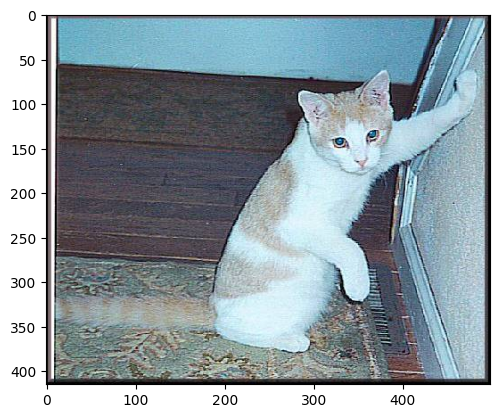

1/1 [==============================] - 1s 827ms/step
Predicted class: cats


In [45]:
plot("/content/cat.4001.jpg")
print("Predicted class:", predict_image("/content/cat.4001.jpg"))

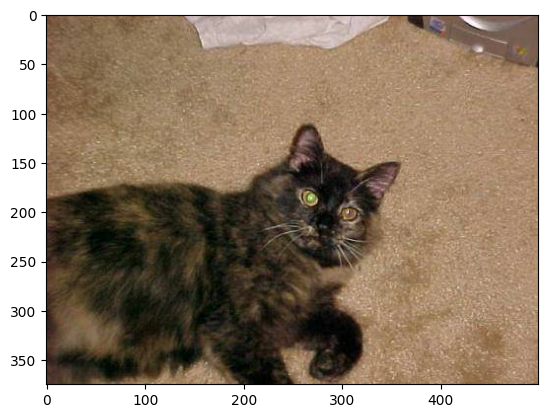

1/1 [==============================] - 1s 1s/step
Predicted class: cats


In [46]:
plot("/content/cat.4004.jpg")

print("Predicted class:", predict_image("/content/cat.4001.jpg"))

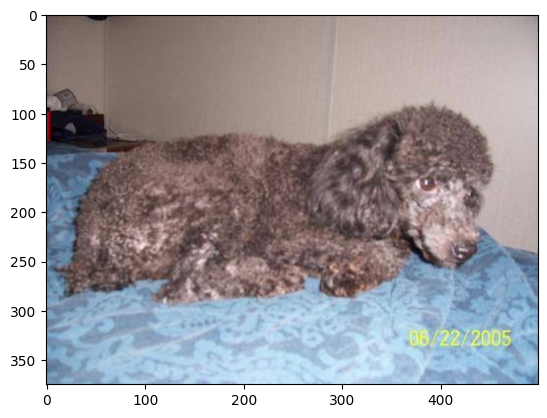

1/1 [==============================] - 1s 934ms/step
Predicted class: dogs


In [48]:
plot("/content/dog.4043.jpg")

print("Predicted class:", predict_image("/content/dog.4043.jpg"))

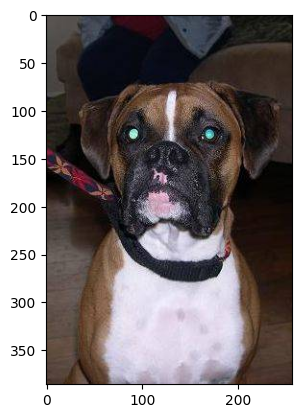

1/1 [==============================] - 1s 590ms/step
Predicted class: dogs


In [49]:
plot("/content/dog.4050.jpg")

print("Predicted class:", predict_image("/content/dog.4050.jpg"))